## Importazione librerie e caricamento dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

In [2]:
df_cyclists = pd.read_csv('dataset/df_cyclists_no_missing.csv')
df_races = pd.read_csv('dataset/df_races_no_missing.csv')

## Cyclists

In [3]:
df_cyclists.head()

_url                  name  birth_year     weight  \
0           bruno-surra          Bruno  Surra      1964.0  70.057068   
1            gerard-rue           Gérard  Rué      1965.0  74.000000   
2              jan-maas             Jan  Maas      1996.0  69.000000   
3  nathan-van-hooydonck  Nathan Van Hooydonck      1995.0  78.000000   
4      jose-felix-parra     José Félix  Parra      1997.0  55.000000   

       height  nationality  
0  187.223027        Italy  
1  182.000000       France  
2  189.000000  Netherlands  
3  192.000000      Belgium  
4  171.000000        Spain

In [4]:
df_cyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6133 entries, 0 to 6132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6133 non-null   object 
 1   name         6133 non-null   object 
 2   birth_year   6133 non-null   float64
 3   weight       6133 non-null   float64
 4   height       6133 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.6+ KB


### Informazioni statistiche di base

In [5]:
df_cyclists.describe()

birth_year       weight       height
count  6133.000000  6133.000000  6133.000000
mean   1974.071884    68.672356   179.835239
std      15.520626     6.378611     6.443253
min    1933.000000    40.851488   154.000000
25%    1962.000000    64.192663   175.456425
50%    1974.071884    68.711270   180.000000
75%    1987.000000    73.000000   184.000000
max    2004.000000    94.000000   204.000000

### Checking for duplicates

In [6]:
num_duplicates = df_cyclists.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


## Data Distribution - Cylists

### Birth Year

In [7]:

df_cyclists['birth_year'].value_counts()

birth_year
1964.0    145
1962.0    141
1970.0    140
1974.0    138
1980.0    133
         ... 
1937.0      4
1938.0      2
1934.0      2
1933.0      1
1936.0      1
Name: count, Length: 72, dtype: int64

In [8]:
df_cyclists['birth_year'].describe()

count    6133.000000
mean     1974.071884
std        15.520626
min      1933.000000
25%      1962.000000
50%      1974.071884
75%      1987.000000
max      2004.000000
Name: birth_year, dtype: float64

In [9]:
def sturges_bin_count(df):
    """Calculate optimal number of bins based on Sturges' rule"""
    return int(np.ceil(np.log2(len(df)) + 1))

In [10]:
bins = sturges_bin_count(df_cyclists["birth_year"])
print(f"Recommended number of bins: {bins}")

Recommended number of bins: 14


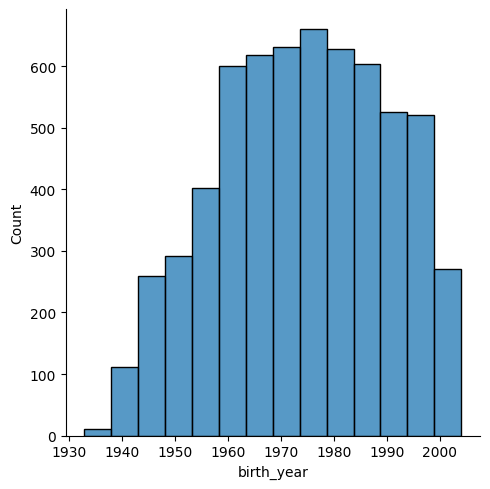

In [11]:
sns.displot(df_cyclists, x="birth_year", kind="hist", row_order="desc", bins=bins)

La maggior parte dei ciclisti nel dataset sembra essere nata tra gli anni 1960 e 1990, con il picco di frequenza attorno agli anni '70 e '80.
La distribuzione presenta una forma quasi a campana (distribuzione normale), suggerendo che c'è un numero maggiore di ciclisti nati durante quel periodo, con una diminuzione graduale nel numero di ciclisti più giovani (anni 2000) e in quelle più anziani (prima degli anni '60).


<Axes: xlabel='birth_year'>

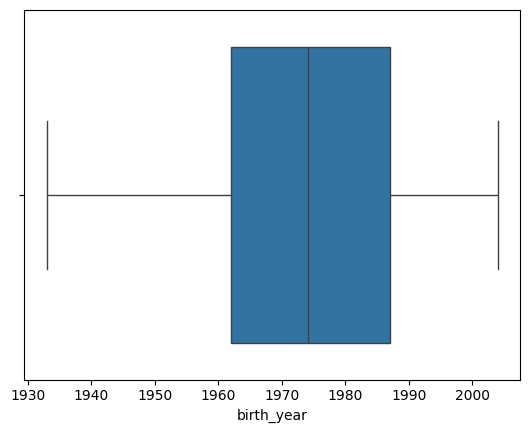

In [12]:
sns.boxplot(x='birth_year', data=df_cyclists)

Il box plot conferma che la maggior parte dei valori di birth_year è concentrata tra gli anni 1960 e 1990, con la mediana vicina al 1970.
Il rettangolo centrale (intervallo interquartile, tra il 25° e il 75° percentile) mostra dove si trova il 50% dei valori centrali. Gli "whiskers" (linee che si estendono dai lati del rettangolo) rappresentano il range che copre la maggior parte dei dati, senza osservazioni particolarmente estreme o valori outlier evidenti.

Questa distribuzione suggerisce che il tuo dataset contiene una popolazione principale di ciclisti più attiva o rappresentata in quel range di anni di nascita. Potrebbe indicare un'epoca particolare di attività ciclistica più prominente o dati maggiormente raccolti in quegli anni.

### Weight

In [13]:
df_cyclists['weight'].value_counts()

weight
70.000000    272
68.000000    219
65.000000    193
67.000000    177
72.000000    169
            ... 
82.048159      1
80.663930      1
63.850159      1
80.664834      1
58.906714      1
Name: count, Length: 3114, dtype: int64

In [14]:
df_cyclists['weight'].describe()

count    6133.000000
mean       68.672356
std         6.378611
min        40.851488
25%        64.192663
50%        68.711270
75%        73.000000
max        94.000000
Name: weight, dtype: float64

In [15]:
bins = sturges_bin_count(df_cyclists["weight"])
print(f"Recommended number of bins: {bins}")

Recommended number of bins: 14


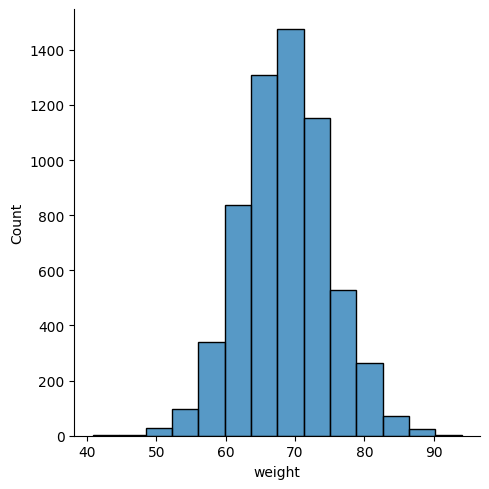

In [16]:
sns.displot(df_cyclists, x="weight", kind="hist", row_order="desc", bins=bins)

La distribuzione del peso è approssimativamente simmetrica, con un picco nella fascia dei 65-70 kg.
La maggior parte dei ciclisti ha un peso che si concentra attorno a questo valore, indicando che il peso medio dei ciclisti nel dataset è generalmente vicino a questa fascia.
C'è una distribuzione a forma di campana, che suggerisce una distribuzione normale o quasi normale per il peso.

<Axes: xlabel='weight'>

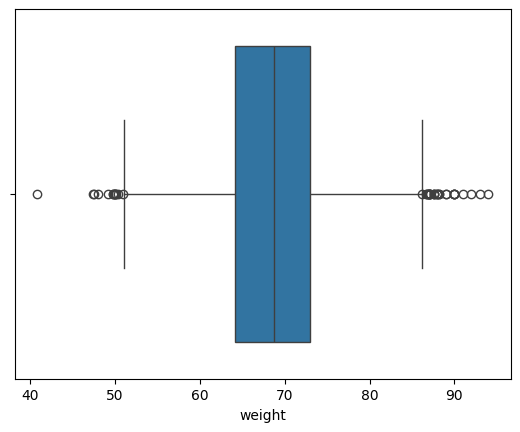

In [17]:
sns.boxplot(x='weight', data=df_cyclists)

Il box plot mostra il range interquartile (la zona rettangolare centrale) che include il 50% dei valori dei pesi, evidenziando come i valori siano distribuiti tra circa 64 kg e 73 kg, con una mediana vicina ai 70 kg.
I "whiskers" si estendono fino ai valori che rappresentano i limiti più estremi non considerati outlier. Tuttavia, ci sono diversi outlier visibili al di sotto di 50 kg e al di sopra di 80-90 kg. Questi valori rappresentano pesi estremamente bassi o alti rispetto al resto dei ciclisti nel dataset.

La distribuzione suggerisce che la maggior parte dei ciclisti ha un peso compreso in un range relativamente ristretto attorno alla media. Gli outlier presenti possono rappresentare individui con caratteristiche particolari (ad esempio, specialisti di certe discipline come scalatori o velocisti che tendono a pesare di meno o di più).

### Height

In [18]:
df_cyclists['height'].value_counts()

height
180.000000    277
178.000000    226
183.000000    193
181.000000    181
175.000000    169
             ... 
183.369111      1
180.417227      1
171.487803      1
182.388967      1
167.861711      1
Name: count, Length: 3038, dtype: int64

In [19]:
df_cyclists['height'].describe()

count    6133.000000
mean      179.835239
std         6.443253
min       154.000000
25%       175.456425
50%       180.000000
75%       184.000000
max       204.000000
Name: height, dtype: float64

In [20]:
bins = sturges_bin_count(df_cyclists["height"])
print(f"Recommended number of bins: {bins}")

Recommended number of bins: 14


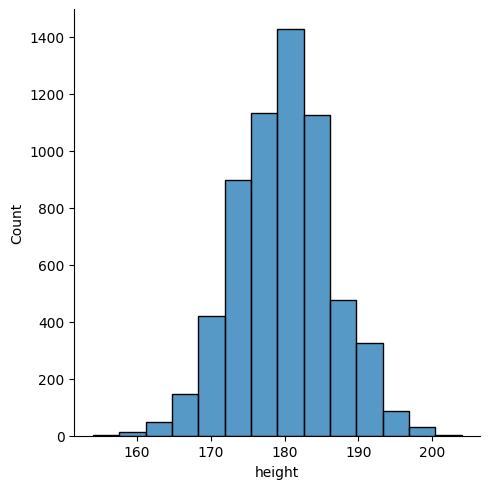

In [21]:
sns.displot(df_cyclists, x="height", kind="hist", row_order="desc", bins=bins)

L'istogramma mostra che la distribuzione dell'altezza dei ciclisti è centrata attorno ai 180 cm, con un picco ben definito vicino a questa misura.
La forma della distribuzione appare simmetrica, suggerendo che la maggior parte dei ciclisti nel dataset ha un'altezza vicina alla media, che si trova tra 175 cm e 185 cm, con un calo graduale verso altezze estremamente alte o basse.

<Axes: xlabel='height'>

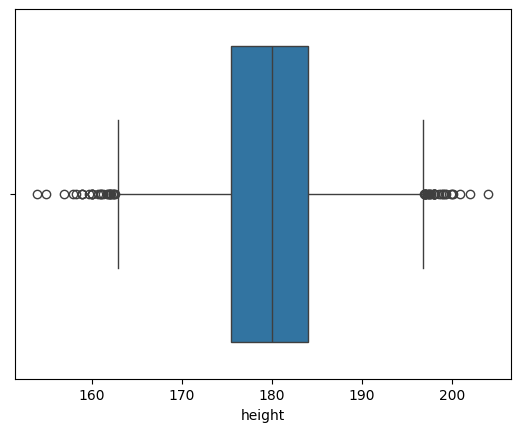

In [22]:
sns.boxplot(x='height', data=df_cyclists)

Il box plot conferma che il 50% delle altezze si trova all'interno del range compreso tra circa 175 cm e 185 cm, con una mediana attorno ai 180 cm.
Gli "whiskers" si estendono fino ai limiti che rappresentano il range di valori accettabili, mentre i punti esterni rappresentano valori considerati outlier.
Sono presenti outlier sia nella parte bassa (altezze inferiori a 160 cm) sia nella parte alta (superiori a 200 cm), suggerendo la presenza di ciclisti con misure al di fuori della distribuzione centrale.

La distribuzione suggerisce che la maggior parte dei ciclisti nel dataset ha un'altezza compresa in un range ristretto vicino alla media di 180 cm, il che potrebbe essere indicativo del tipo di ciclisti rappresentati (ad esempio, quelli specializzati in certi tipi di gare).
Gli outlier possono rappresentare ciclisti con caratteristiche fisiche uniche o discipline particolari che influenzano le loro misure corporee.

### Nationality

In [23]:
df_cyclists['nationality'].value_counts()

nationality
Italy                 1029
Spain                  872
Belgium                869
France                 741
Netherlands            380
                      ... 
Dominican Republic       1
Liechtenstein            1
Zimbabwe                 1
Puerto Rico              1
Hongkong                 1
Name: count, Length: 72, dtype: int64

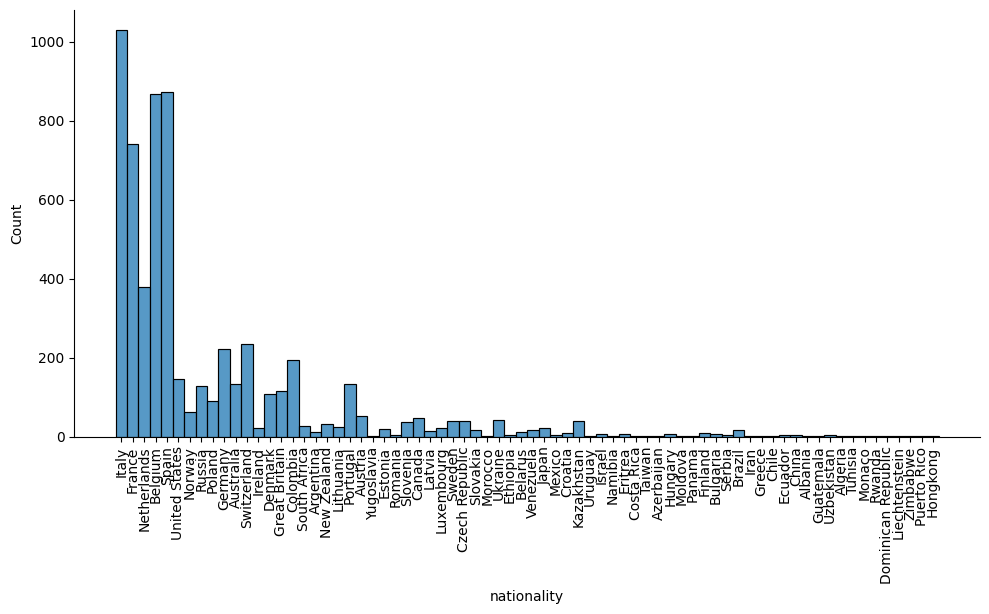

In [24]:
sns.displot(df_cyclists, x="nationality", kind="hist", row_order="desc", bins=len(df_cyclists['nationality'].unique()), aspect=2)
plt.xticks(rotation=90);

L'Italia è chiaramente il Paese con il maggior numero di ciclisti rappresentati, superando le 1000 unità. Questo potrebbe indicare una predominanza di dati relativi a ciclisti italiani o una tradizione ciclistica forte in Italia, che è riflessa nel dataset.
Altri Paesi con una buona rappresentanza includono Francia, Paesi Bassi, Belgio e Spagna, il che è coerente con il forte interesse per il ciclismo e la presenza storica di competizioni ciclistiche di rilievo in questi Paesi.
Il grafico mostra una lunga coda con molte nazionalità che hanno una rappresentanza molto minore (spesso inferiore a 100 unità). Questo indica che il dataset è sbilanciato verso poche nazioni dominanti, con una presenza molto minore di ciclisti da altri Paesi.
Questo tipo di distribuzione potrebbe influenzare eventuali analisi sulle nazionalità. Potresti voler tenere conto del fatto che i ciclisti di nazionalità meno rappresentate potrebbero avere caratteristiche diverse e, in termini di analisi, essere soggetti a bias se la rappresentanza non è bilanciata.

### Height distribution by nationality

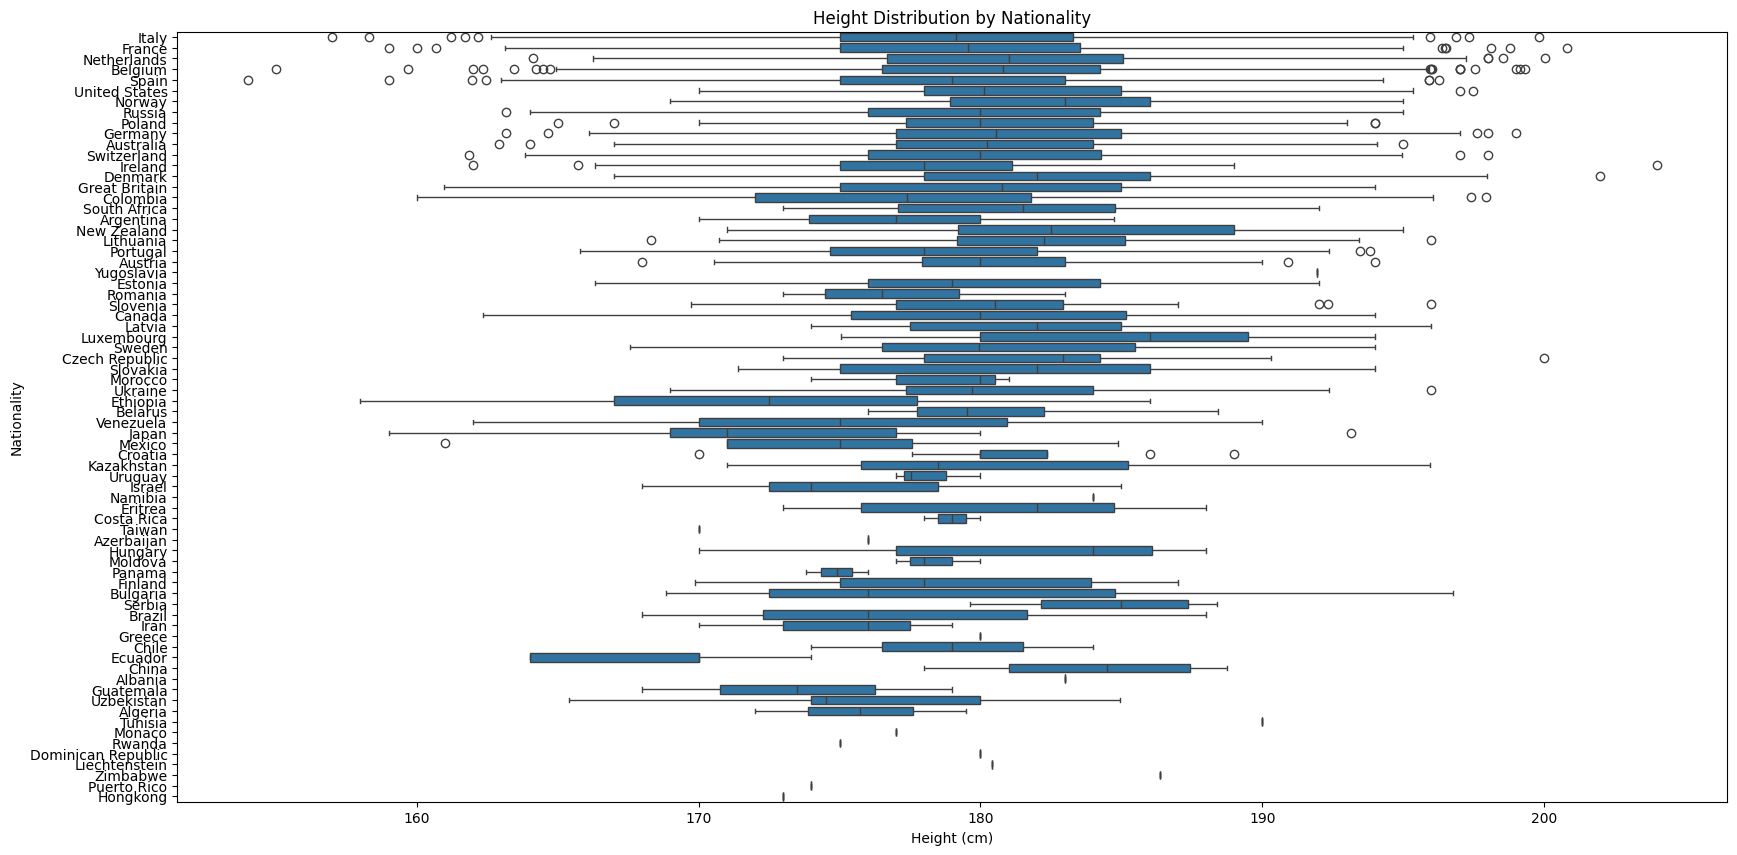

In [25]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_cyclists, x='height', y='nationality')
plt.title('Height Distribution by Nationality')
plt.xlabel('Height (cm)')
plt.ylabel('Nationality')
plt.show()

Questo grafico rappresenta la distribuzione dell'altezza dei ciclisti suddivisa per nazionalità.
Si osserva una variazione significativa nelle altezze tra le nazionalità, anche se la maggior parte dei gruppi nazionali mostra una concentrazione intorno a un'altezza media di circa 180 cm.
Sono presenti numerosi outlier, rappresentati da punti al di fuori del range normale. Alcune nazionalità mostrano una maggiore presenza di outlier, il che suggerisce ciclisti con caratteristiche fisiche diverse rispetto al gruppo principale.
Alcuni Paesi, come l'Italia e i Paesi Bassi, sembrano avere una gamma più ampia di distribuzione dell'altezza rispetto ad altri Paesi. Questo potrebbe essere dovuto a una rappresentanza maggiore nel dataset o a una diversità fisica più pronunciata all'interno di quella popolazione di ciclisti.

### Height Vs. Weight (By Nationality)

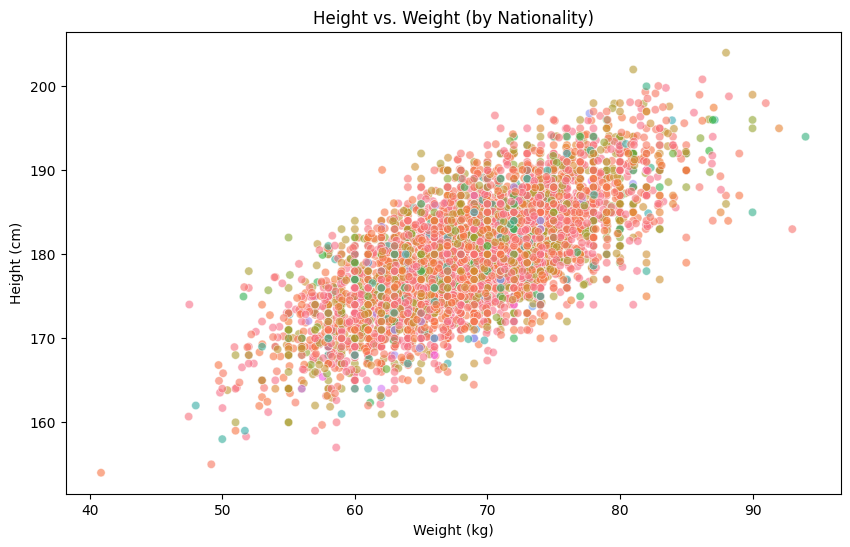

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cyclists, x='weight', y='height', hue='nationality', alpha=0.6, legend=False)
plt.title('Height vs. Weight (by Nationality)')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.show()

Questo grafico a dispersione mostra la relazione tra weight (peso) e height (altezza) dei ciclisti, con i punti colorati in base alla nazionalità.
Il grafico mostra una chiara tendenza positiva: al crescere dell'altezza, tende a crescere anche il peso. Questo comportamento è coerente con le aspettative fisiologiche, poiché individui più alti tendono ad avere un peso maggiore.
La distribuzione sembra piuttosto uniforme, con nazionalità che coprono l'intero range di altezza e peso. Non ci sono chiari raggruppamenti distinti per nazionalità nel grafico.
La densità maggiore di punti si trova nella fascia di altezza di circa 175-185 cm e di peso di circa 65-75 kg, che corrisponde alle statistiche medie rilevate per i ciclisti nel dataset.


### Height trends by decade

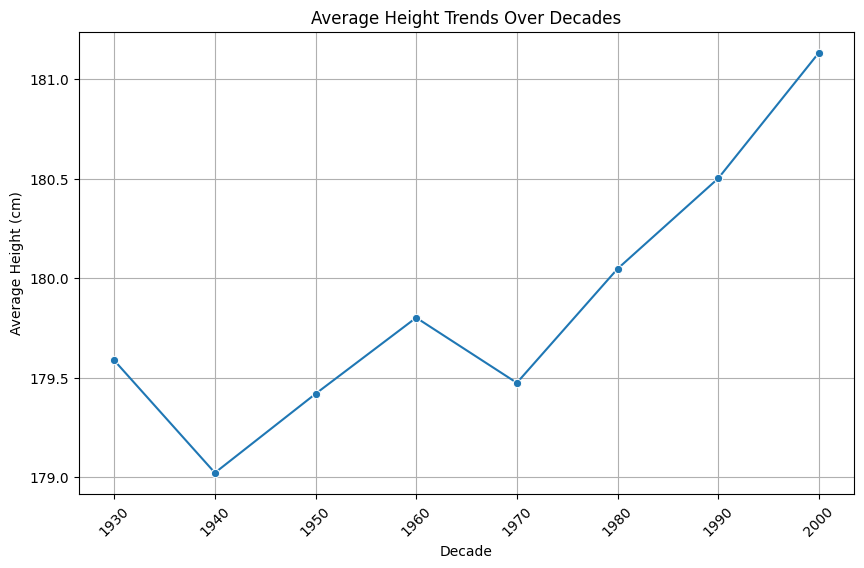

decade      height
0  1930.0  179.586210
1  1940.0  179.021589
2  1950.0  179.418471
3  1960.0  179.800911
4  1970.0  179.473429
5  1980.0  180.046330
6  1990.0  180.500464
7  2000.0  181.131689

In [27]:
df_cyclists['decade'] = (df_cyclists['birth_year'] // 10) * 10

height_trends = df_cyclists.groupby('decade')['height'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=height_trends, x='decade', y='height', marker='o')
plt.title('Average Height Trends Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Height (cm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

height_trends

Il grafico rappresenta la tendenza dell'altezza media dei ciclisti raggruppata per decenni di nascita.
Il grafico mostra un andamento generale di crescita dell'altezza media dei ciclisti nel corso delle decadi. Questo trend suggerisce che i ciclisti più recenti tendono a essere più alti rispetto ai ciclisti delle generazioni precedenti.
L'incremento dell'altezza media potrebbe riflettere fattori legati al miglioramento delle condizioni nutrizionali, selezione atletica e cambiamenti nello sport, dove caratteristiche fisiche diverse possono essere state preferite nel tempo.
La maggiore altezza può anche riflettere una migliore selezione di atleti con una corporatura adatta a determinati tipi di gare o competizioni.

### Weight trends by decade

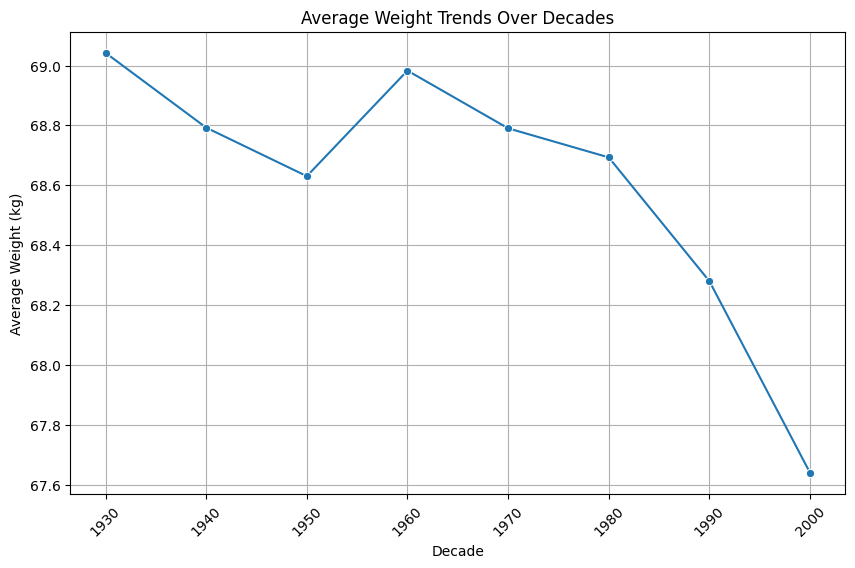

decade     weight
0  1930.0  69.042704
1  1940.0  68.792778
2  1950.0  68.630535
3  1960.0  68.983197
4  1970.0  68.790510
5  1980.0  68.693231
6  1990.0  68.279682
7  2000.0  67.639528

In [28]:
weight_trends = df_cyclists.groupby('decade')['weight'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=weight_trends, x='decade', y='weight', marker='o')
plt.title('Average Weight Trends Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Weight (kg)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

weight_trends

Il grafico mostra l'andamento del peso medio dei ciclisti raggruppato per decadi di nascita.
Il grafico evidenzia un calo complessivo del peso medio dei ciclisti nel tempo. Il peso medio decresce in modo significativo a partire dagli anni '70 fino ai ciclisti nati nel 2000, suggerendo una tendenza verso una corporatura più leggera.
Questa tendenza al ribasso potrebbe riflettere cambiamenti nello stile di corsa, nelle strategie di selezione degli atleti e nelle esigenze di competizione. Potrebbe indicare una maggiore enfasi su ciclisti più leggeri, che possono essere avvantaggiati in alcune gare, specialmente in salita.
Il cambiamento potrebbe essere dovuto a fattori legati all'evoluzione dello sport e delle tecniche di allenamento. La crescente specializzazione nelle diverse tipologie di gare ciclistiche potrebbe favorire ciclisti con corporature più leggere e aerodinamiche.


## Races

In [29]:
df_races.head()

_url            name  points  uci_points    length  \
0  tour-de-france/1978/stage-6  Tour de France   100.0        16.0  162000.0   
1  tour-de-france/1978/stage-6  Tour de France   100.0        16.0  162000.0   
2  tour-de-france/1978/stage-6  Tour de France   100.0        16.0  162000.0   
3  tour-de-france/1978/stage-6  Tour de France   100.0        16.0  162000.0   
4  tour-de-france/1978/stage-6  Tour de France   100.0        16.0  162000.0   

   climb_total  profile  startlist_quality                 date  position  \
0       1101.0      1.0             1241.0  1978-07-05 04:02:24       0.0   
1       1101.0      1.0             1241.0  1978-07-05 04:02:24       1.0   
2       1101.0      1.0             1241.0  1978-07-05 04:02:24       2.0   
3       1101.0      1.0             1241.0  1978-07-05 04:02:24       3.0   
4       1101.0      1.0             1241.0  1978-07-05 04:02:24       4.0   

            cyclist  cyclist_age  is_tarmac  is_cobbled  is_gravel  \
0        sean-kelly         22.0       True       False      False   
1  gerrie-knetemann         27.0       True       False      False   
2    rene-bittinger         24.0       True       False      False   
3    joseph-bruyere         30.0       True       False      False   
4  sven-ake-nilsson         27.0       True       False      False   

                           cyclist_team  delta  
0  vini-ricordi-pinarello-sidermec-1986    0.0  
1                           norway-1987    0.0  
2                        australia-1983    0.0  
3              navigare-blue-storm-1993    0.0  
4                            spain-1991    0.0

### Preprocessing

In [30]:
# Calcola il numero di righe totali prima del filtraggio
total_rows = len(df_races)

# Filtra solo le righe che corrispondono alla regex
filtered_df_races = df_races[df_races['_url'].str.contains(r'([^/]+)/(\d{4})/stage-(\d+)', regex=True)]

# Calcola il numero di righe escluse
excluded_rows = total_rows - len(filtered_df_races)

# Stampare il conteggio delle righe escluse
print(f"Righe escluse: {excluded_rows}")
print(df_races.isnull().sum())

# Estrazione di nome gara, anno e tappa
# Extracting 'race_name', 'year', and 'stage' from '_url', allowing 'stage' to be any string after 'stage-'
df_races[['race_name', 'year', 'stage']] = df_races['_url'].str.extract(r'([^/]+)/(\d{4})/stage-(.+)')

# Display rows where extraction might have failed (resulting in NaN values)
problematic_rows = df_races[df_races[['race_name', 'year', 'stage']].isna().any(axis=1)]
if not problematic_rows.empty:
    print("Rows with potential extraction issues:")
    print(problematic_rows)

# Converting 'year' to integer where possible
df_races['year'] = pd.to_numeric(df_races['year'], errors='coerce')  # Convert 'year' to int, setting errors as NaN

# Displaying the cleaned data (showing first few rows)
print(df_races[['race_name', 'year', 'stage']].head())

/tmp/ipykernel_13330/3334711536.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df_races = df_races[df_races['_url'].str.contains(r'([^/]+)/(\d{4})/stage-(\d+)', regex=True)]


Righe escluse: 71543
_url                 0
name                 0
points               0
uci_points           0
length               0
climb_total          0
profile              0
startlist_quality    0
date                 0
position             0
cyclist              0
cyclist_age          0
is_tarmac            0
is_cobbled           0
is_gravel            0
cyclist_team         0
delta                0
dtype: int64
Rows with potential extraction issues:
                                   _url                        name  points  \
426     volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
427     volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
428     volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
429     volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
430     volta-a-catalunya/1999/prologue  Volta Ciclista a Catalunya    50.0   
...                                 ...                       

In [31]:
df_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589813 entries, 0 to 589812
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   _url               589813 non-null  object 
 1   name               589813 non-null  object 
 2   points             589813 non-null  float64
 3   uci_points         589813 non-null  float64
 4   length             589813 non-null  float64
 5   climb_total        589813 non-null  float64
 6   profile            589813 non-null  float64
 7   startlist_quality  589813 non-null  float64
 8   date               589813 non-null  object 
 9   position           589813 non-null  float64
 10  cyclist            589813 non-null  object 
 11  cyclist_age        589813 non-null  float64
 12  is_tarmac          589813 non-null  bool   
 13  is_cobbled         589813 non-null  bool   
 14  is_gravel          589813 non-null  bool   
 15  cyclist_team       589813 non-null  object 
 16  de

### Informazioni statistiche di base

In [32]:
df_races.describe()

points     uci_points         length    climb_total  \
count  589813.000000  589813.000000  589813.000000  589813.000000   
mean       90.015262      90.743174  166776.292588    2298.614790   
std        61.129940     125.034842   64546.251640    1365.431706   
min        18.000000       6.000000    1000.000000       2.000000   
25%        50.000000      16.000000  152500.000000    1280.000000   
50%        80.000000      60.000000  178200.000000    2240.000000   
75%       100.000000     100.000000  203500.000000    3263.000000   
max      1069.089861     800.000000  338000.000000    6974.000000   

             profile  startlist_quality       position    cyclist_age  \
count  589813.000000      589813.000000  589813.000000  589813.000000   
mean        2.555159        1101.181919      74.217672      28.484552   
std         1.468140         380.594833      48.404528       3.859066   
min         1.000000         115.000000       0.000000      11.000000   
25%         1.000000         844.000000      32.000000      26.000000   
50%         2.000000         988.000000      70.000000      28.000000   
75%         4.000000        1309.000000     112.000000      31.000000   
max         5.000000        2047.000000     209.000000      56.000000   

               delta           year  
count  589813.000000  518270.000000  
mean      418.264796    2006.603311  
std       842.971505      11.223386  
min     -6906.000000    1970.000000  
25%        10.000000    2000.000000  
50%       156.000000    2008.000000  
75%       624.000000    2016.000000  
max     61547.000000    2023.000000

### Checking for duplicates

In [33]:
num_duplicates = df_races.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


## Data Distribution - Races

In [34]:
numeric_columns = df_races.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_races.select_dtypes(include=['object', 'category', 'bool']).columns


### Numerical columns

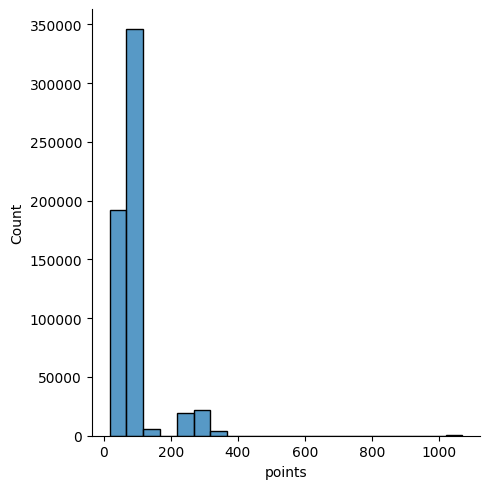

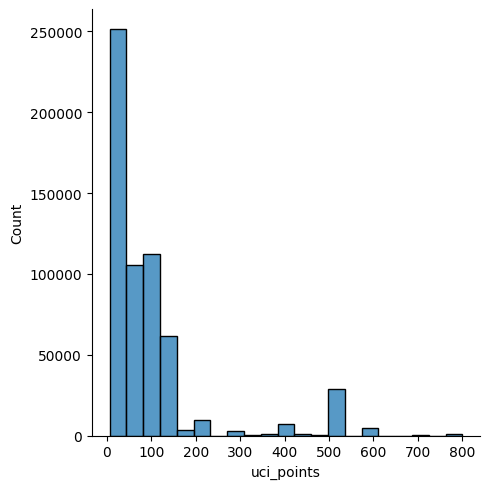

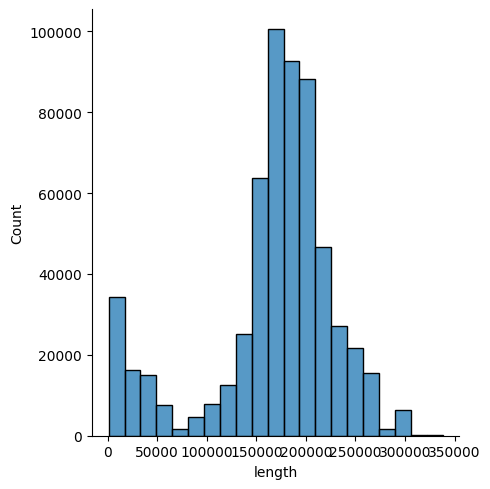

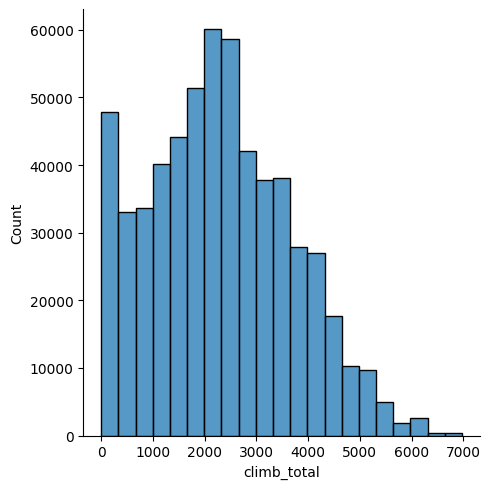

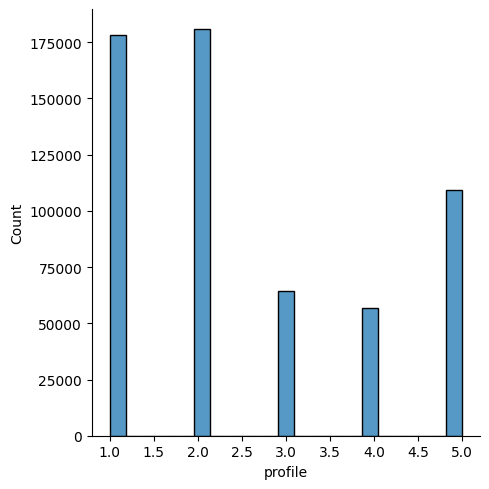

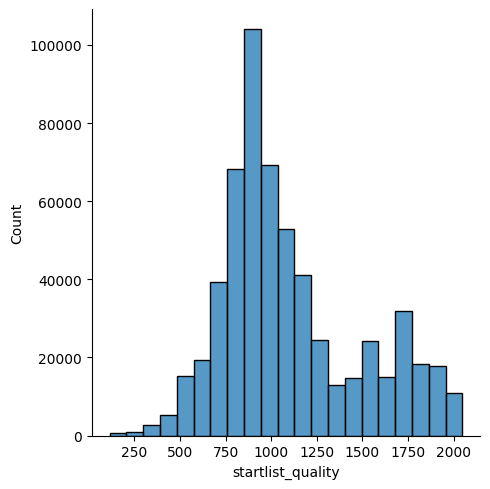

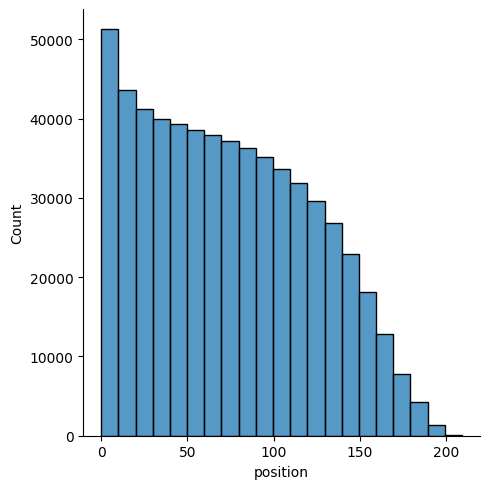

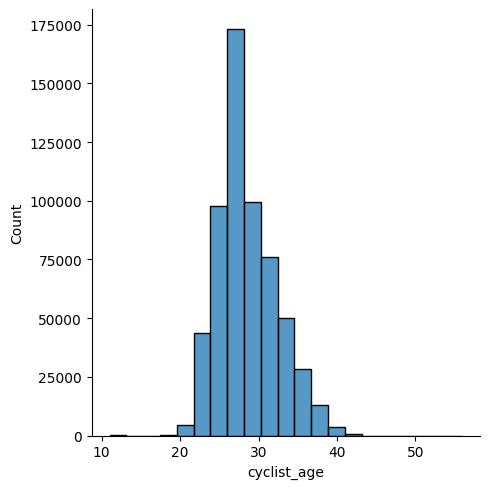

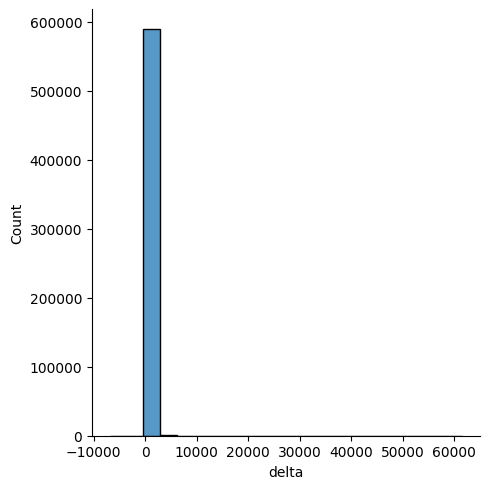

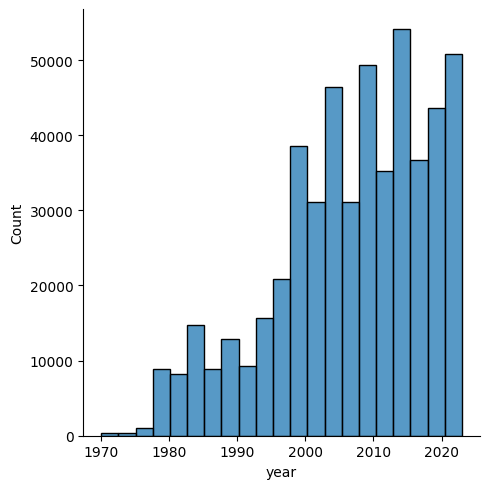

In [35]:
for col in numeric_columns:
    bins = sturges_bin_count(df_races[col])
    sns.displot(df_races, x=col, kind="hist", row_order="desc", bins=bins)

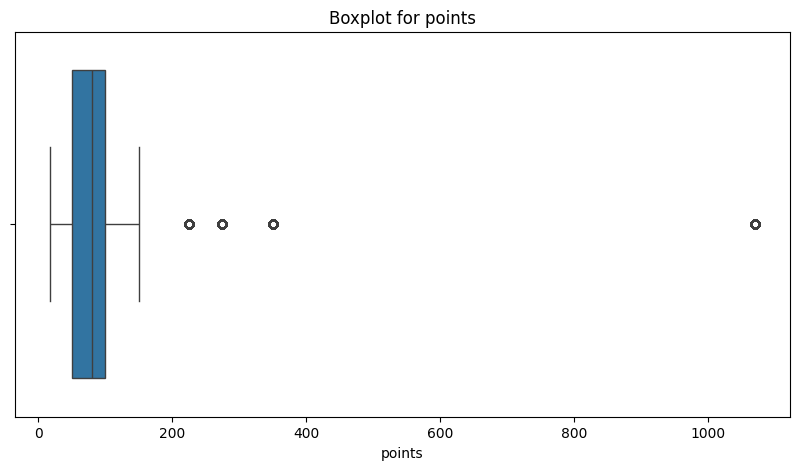

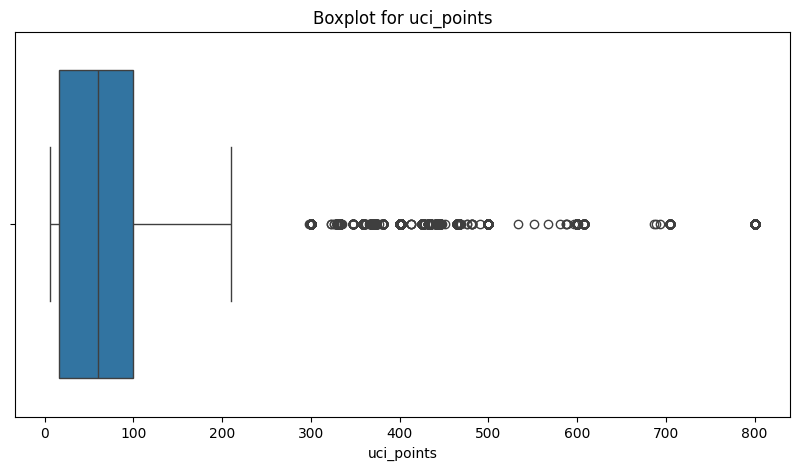

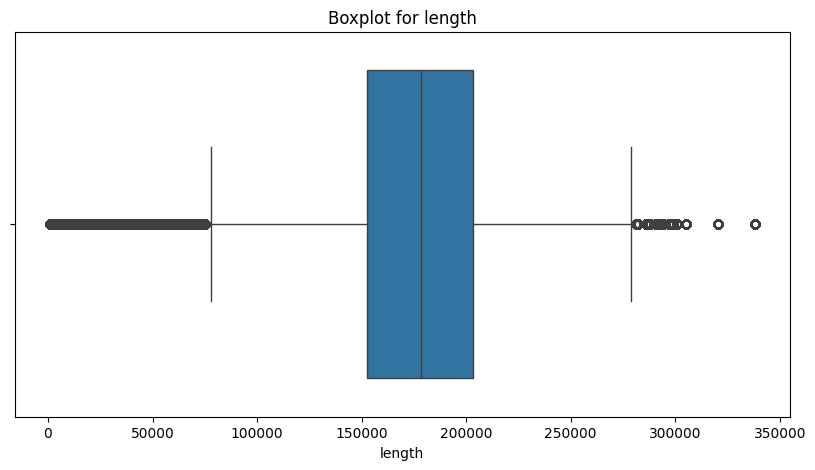

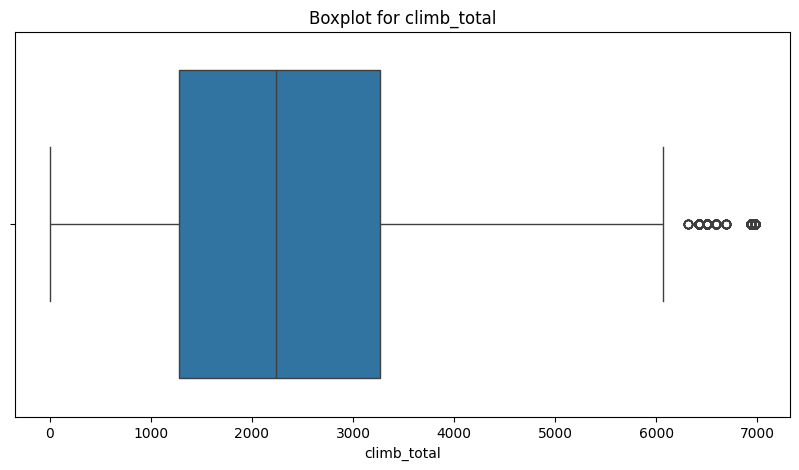

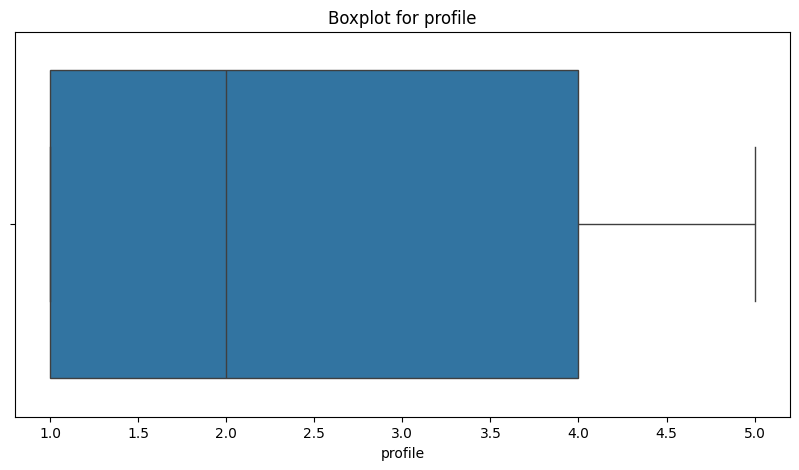

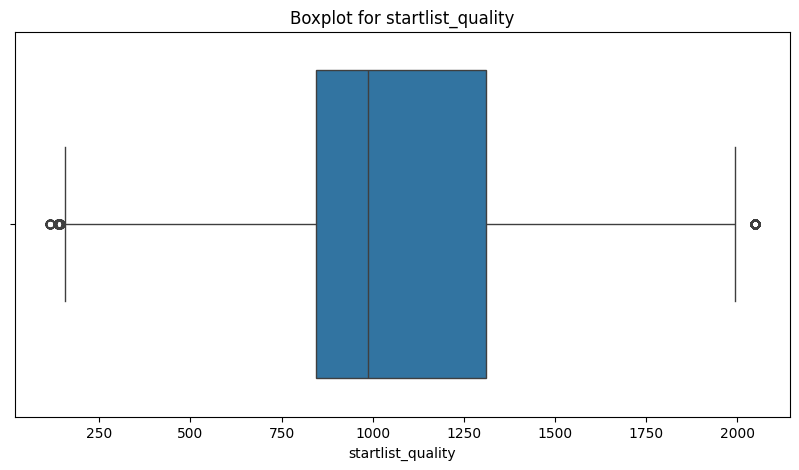

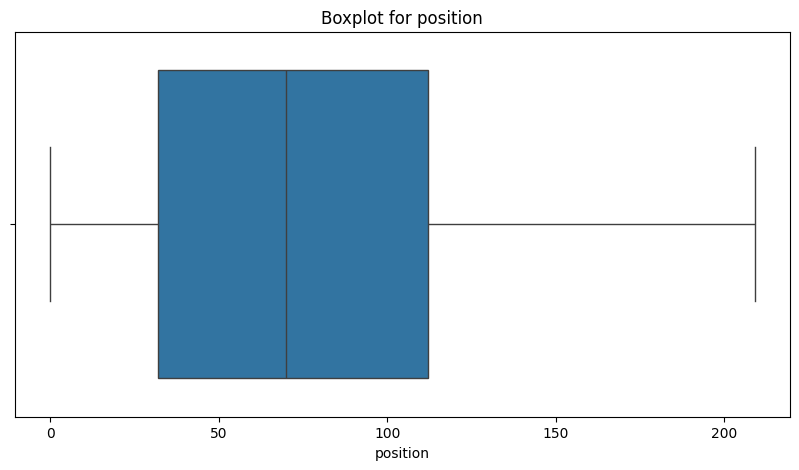

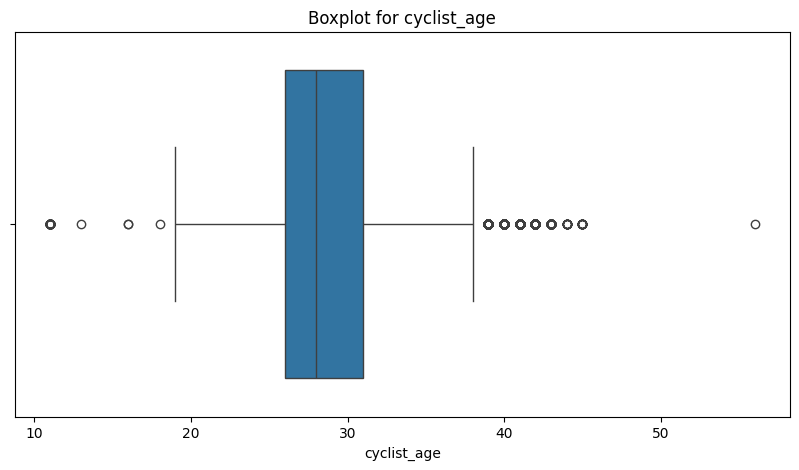

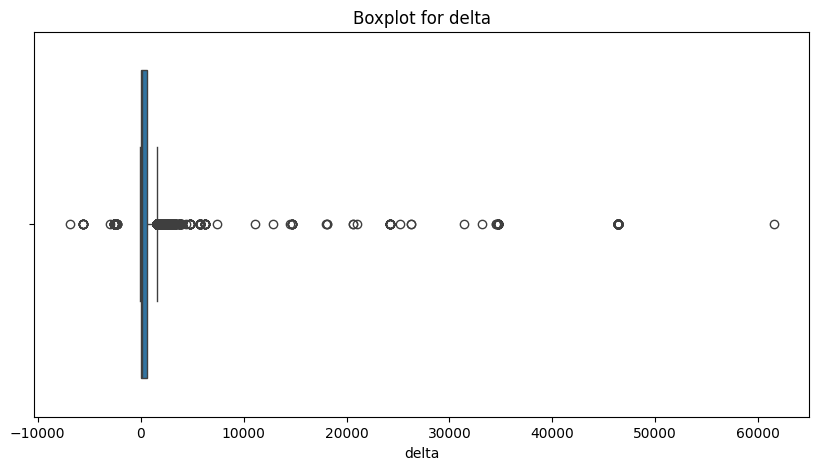

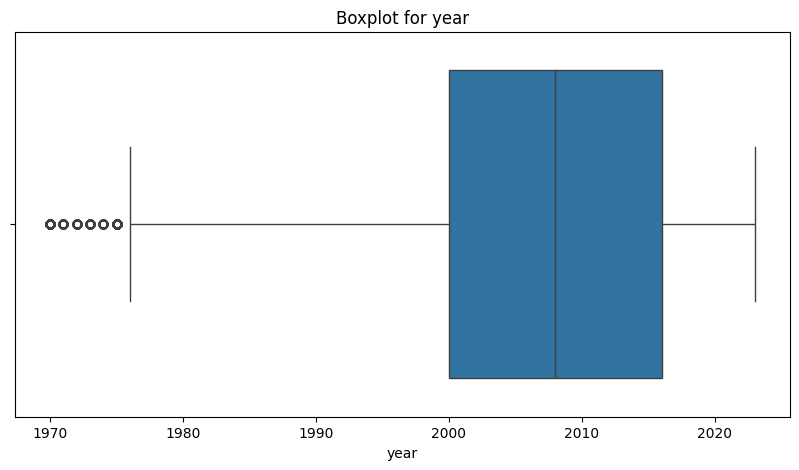

In [36]:
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_races, x=col)
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()

- Points: L'istogramma mostra una distribuzione molto sbilanciata, con la maggior parte dei dati concentrati in una fascia di valori bassi (vicino a 0). Questo suggerisce che la maggior parte delle corse ha ciclisti che guadagnano un numero relativamente basso di punti. Solo un numero molto piccolo di corse presenta ciclisti con punteggi significativamente più alti, con una coda lunga a destra che evidenzia valori molto elevati in alcuni casi.Il box plot mostra una distribuzione fortemente asimmetrica con un numero significativo di outlier. La maggior parte dei dati è concentrata vicino al limite inferiore del range, con pochissimi casi che si discostano notevolmente, rappresentati come punti isolati. La distribuzione dei punti suggerisce che poche corse o ciclisti si distinguono in modo eccezionale con punteggi molto alti, mentre la maggior parte rimane in una fascia più modesta.
Questo tipo di distribuzione potrebbe riflettere la natura competitiva di alcune corse o eventi in cui solo i vincitori o i migliori performer ottengono una quantità rilevante di punti.

- Uci_points: La distribuzione è simile a quella dei punti precedenti, con la maggior parte dei valori concentrati a un livello basso (vicino a 0), mostrando che molti ciclisti o eventi guadagnano pochi punti UCI. C'è una coda lunga verso destra, che evidenzia un piccolo numero di casi con un punteggio UCI significativamente più alto rispetto al resto. Il box plot evidenzia che la maggior parte dei dati è concentrata nella parte inferiore del range, con molti valori considerati outlier. Gli "whiskers" mostrano il range interquartile, e al di fuori di questo ci sono numerosi punti (outlier) che rappresentano ciclisti o eventi con punteggi UCI molto più alti rispetto alla mediana. Questi outlier sono evidenti come punti separati e rappresentano performance eccezionali o ciclisti con risultati fuori dall'ordinario rispetto alla maggior parte. La distribuzione degli uci_points suggerisce che solo un ristretto gruppo di ciclisti o eventi è eccezionalmente performante in termini di punteggio UCI, mentre la maggior parte si colloca in fasce molto più basse.
Questo potrebbe riflettere l'alto livello di competizione e il fatto che i punteggi UCI sono distribuiti in modo altamente selettivo, premiando solo i migliori.

- Lenght: La distribuzione mostra che la maggior parte delle corse ha una lunghezza compresa tra 100.000 e 200.000 unità (presumibilmente metri o chilometri convertiti in base a come è stato rappresentato). C'è una concentrazione significativa di valori in questa fascia, mentre le corse molto corte (vicine a 0) e quelle estremamente lunghe sono meno comuni. La distribuzione ha un picco centrale e presenta una coda verso l'estrema destra, che include le corse con lunghezze molto elevate. Il box plot mostra che la maggior parte dei valori è compresa tra il primo e il terzo quartile, con una mediana visibile vicino al centro del range interquartile. La distribuzione suggerisce che la maggior parte delle corse ha una lunghezza standard o media, con alcuni eventi eccezionalmente lunghi o corti. Questi eventi fuori dal comune potrebbero essere legati a gare specifiche come cronometro, tappe particolari o gare con regole speciali.

- Climb_total: L'istogramma mostra una distribuzione con un picco intorno ai 2.000-3.000 metri, indicando che la maggior parte delle corse ha un dislivello totale di salita in questa fascia. La distribuzione è asimmetrica verso destra, con una coda che si estende verso valori più alti di salita totale. Ci sono quindi corse con salite significativamente più lunghe, ma sono meno comuni. La distribuzione è moderatamente concentrata, il che suggerisce che c'è un'ampia gamma di dislivelli totali tra le corse, ma con una prevalenza di valori medi. La distribuzione suggerisce che la maggior parte delle corse include un dislivello di salita moderato, con alcune corse che sono eccezionalmente impegnative per quanto riguarda la pendenza totale. Le corse con salite più estreme potrebbero riflettere gare specifiche come tappe di montagna in competizioni come il Tour de France o altre competizioni in terreni montuosi.

- Profile: La distribuzione mostra che le categorie 1.0 e 2.0 sono le più comuni nel dataset, seguite dalla categoria 5.0. Le categorie 3.0 e 4.0 hanno una presenza inferiore. Questo potrebbe indicare che la maggior parte delle corse nel dataset rientra in profili specifici (ad esempio, profili di gara con determinate caratteristiche o difficoltà), con una distribuzione non uniforme tra le categorie. Il box plot mostra che la mediana dei valori è attorno a 2.0 e che i valori si estendono fino alla categoria 5.0 senza outlier visibili. Questo suggerisce che i profili seguono un range limitato, con una distribuzione principalmente concentrata nelle categorie più basse (da 1.0 a 2.0). La distribuzione si sposta gradualmente verso valori più alti, con la categoria 5.0 che rappresenta il limite superiore.
La presenza predominante di corse con profili 1.0 e 2.0 potrebbe riflettere un focus su corse di tipo pianeggiante o meno difficoltose rispetto a profili di gara più impegnativi. La distribuzione non uniforme potrebbe essere il risultato di un maggiore numero di competizioni o eventi per determinati tipi di terreno o difficoltà.

- Startlist_quality: L'istogramma mostra una distribuzione che si concentra principalmente attorno al valore di 1000, suggerendo che la maggior parte delle corse ha una qualità di lista di partenza vicina a questo valore. La distribuzione ha una forma quasi normale, con un picco pronunciato intorno a 1000 e una graduale riduzione del numero di corse con valori più alti o più bassi. Tuttavia, ci sono alcuni casi con qualità molto alta (vicina a 2000) e alcuni con qualità bassa. Il box plot mostra che la maggior parte dei valori è compresa in un intervallo interquartile che va da circa 750 a 1250. La mediana è vicino a 1000, indicando che la metà delle corse ha una qualità della lista di partenza attorno a questo valore. Gli "whiskers" si estendono fino ai limiti superiori e inferiori senza una presenza significativa di outlier estremi. Ci sono alcuni outlier visibili, rappresentati come punti al di fuori dei whiskers, che indicano corse con una qualità particolarmente bassa o alta. La distribuzione relativamente normale suggerisce che la qualità della lista di partenza è ragionevolmente consistente nella maggior parte delle corse, ma con alcune eccezioni. I valori più alti di qualità potrebbero indicare eventi più prestigiosi con una partecipazione di atleti di alto livello, mentre quelli più bassi potrebbero rappresentare corse di livello inferiore o con partecipanti meno noti.

- Position: L'istogramma mostra una distribuzione che decresce gradualmente al crescere del valore della posizione. Ciò significa che ci sono più ciclisti classificati nelle prime posizioni rispetto a quelli classificati nelle posizioni più alte (verso 200). La distribuzione ha una forma decrescente, che riflette l'ovvia struttura delle competizioni: ci sono meno atleti che raggiungono i primi posti rispetto a quelli che completano la gara nelle posizioni successive. Il box plot mostra che il 50% dei valori (range interquartile) si trova tra circa 50 e 150, con una mediana vicina a 100. Questo indica che la metà dei ciclisti si colloca entro le prime 100-150 posizioni, con una distribuzione più ampia nelle posizioni successive. Gli "whiskers" si estendono fino a includere il range di valori senza outlier evidenti, il che suggerisce che i dati non contengono posizioni anomale rispetto al loro contesto. La distribuzione mostra una concentrazione nelle prime posizioni, il che potrebbe riflettere la natura competitiva delle corse e la struttura dei risultati registrati. Questo tipo di distribuzione è normale per classifiche dove molti partecipanti competono, ma solo pochi si classificano ai primi posti.

- Cyclist_age: L'istogramma mostra una distribuzione con un picco ben definito intorno ai 30 anni, suggerendo che la maggior parte dei ciclisti nel dataset si colloca in questa fascia di età. La distribuzione è concentrata e leggermente asimmetrica verso destra, con una coda che si estende verso le età più avanzate. Questo riflette una minoranza di ciclisti con età più alta, mentre le età più giovani sono meno comuni rispetto al picco. L'età media dei ciclisti nel dataset sembra concentrarsi nella fascia dei 25-35 anni, che potrebbe rappresentare il periodo di massima prestazione fisica per un ciclista. Gli outlier più giovani e più anziani indicano la partecipazione di ciclisti al di fuori della fascia di età tipica, il che potrebbe essere legato a discipline specifiche o a competizioni con diverse esigenze fisiche. Il box plot mostra che la maggior parte dei ciclisti si trova in un intervallo di età compreso tra circa 25 e 35 anni, con la mediana intorno ai 30 anni. Gli "whiskers" si estendono fino ai limiti che rappresentano l'intervallo accettabile di età, mentre ci sono alcuni outlier, sia giovani che più anziani, rispetto alla distribuzione principale. Questo suggerisce la presenza di ciclisti con età particolarmente bassa o alta rispetto alla maggioranza. I punti oltre i whiskers rappresentano outlier, probabilmente ciclisti giovanissimi o veterani che competono in determinate gare.

- Delta: L'istogramma mostra che la maggior parte dei valori di delta è concentrata vicino a 0, con una densità estremamente alta attorno a questa zona e una coda molto lunga verso destra. La distribuzione evidenzia un numero significativo di valori prossimi allo 0 e un numero molto ridotto di casi con valori di delta più grandi. Il box plot evidenzia che la maggior parte dei valori è fortemente concentrata vicino alla mediana (vicino a 0), con un intervallo interquartile ristretto. Gli "whiskers" si estendono per includere valori ancora moderatamente vicini al range centrale, mentre ci sono un gran numero di outlier visibili come punti isolati. Questi outlier rappresentano valori di delta significativamente più grandi rispetto alla maggior parte della distribuzione. La presenza di molti outlier suggerisce una forte variabilità nei valori di delta, con alcuni casi che si discostano notevolmente dalla distribuzione principale. La distribuzione fortemente concentrata attorno a 0 potrebbe indicare che la maggior parte delle osservazioni ha un valore di delta molto piccolo, mentre alcuni eventi straordinari hanno valori molto più elevati, rappresentando la coda della distribuzione. Gli outlier potrebbero essere di interesse per ulteriori analisi, in quanto rappresentano eventi con differenze notevoli rispetto alla media. 

- yaer: L'istogramma mostra un aumento graduale del numero di osservazioni negli anni, con un picco più recente a partire dal 2010. Questo suggerisce che il dataset ha una maggiore concentrazione di dati relativi agli anni più recenti. La distribuzione evidenzia una crescita del numero di eventi o dati registrati a partire dagli anni '90, con un aumento considerevole dopo il 2000. Il box plot mostra che la maggior parte dei dati è concentrata nel range tra il 2000 e il 2020, con il range interquartile che va dalla metà degli anni 2000 fino al 2020. La mediana è vicina al 2010. Gli "whiskers" si estendono verso il 1970, indicando che ci sono dati raccolti a partire da quel periodo. Gli outlier visibili rappresentano anni precedenti al 1980. L'aumento della concentrazione di dati negli anni più recenti potrebbe riflettere una maggiore disponibilità di dati raccolti o una crescita di interesse e monitoraggio del fenomeno specifico che rappresenta il dataset. Gli outlier precedenti al 1980 potrebbero rappresentare eventi storici o dati più scarsi relativi al periodo iniziale.


### Non numerical columns (only the most important ones)

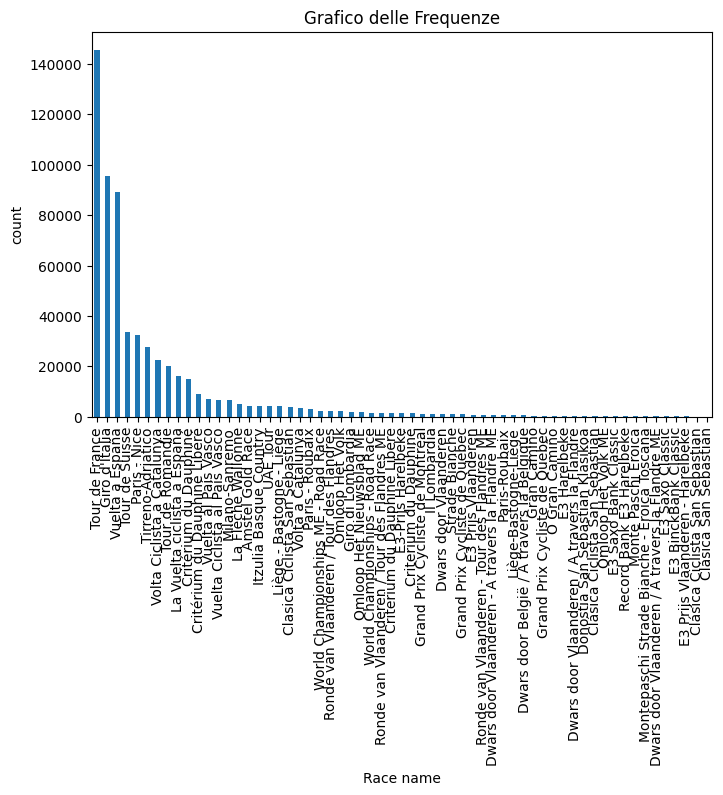

In [38]:
frequences = df_races['name'].value_counts()

plt.figure(figsize=(8, 5))
frequences.plot(kind='bar')
plt.title('Grafico delle Frequenze')
plt.xlabel('Race name')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

Il grafico evidenzia che alcune corse, come il "Tour de France", "Giro d'Italia", e "Vuelta a España", hanno una frequenza nettamente superiore rispetto alle altre. Questo è coerente con l'importanza storica e la popolarità di queste competizioni a livello globale.
Dopo i grandi eventi, la frequenza diminuisce rapidamente, con una lunga coda di corse che si presentano con una frequenza molto inferiore. Questo suggerisce che molte corse nel dataset hanno una presenza limitata o una minore rappresentatività rispetto alle grandi gare.
La distribuzione è fortemente sbilanciata, con poche corse che dominano il dataset e una lunga coda di eventi minori o con una minore rappresentanza.
La natura di questa distribuzione riflette probabilmente l'importanza e la quantità di dati disponibili per i grandi eventi rispetto alle corse meno note o meno documentate. L'analisi delle corse più frequenti può essere utile per identificare le competizioni chiave e per capire come queste influenzino l'analisi complessiva del dataset. La lunga coda di corse minori può rappresentare una grande variabilità, ma con un peso complessivo minore rispetto agli eventi principali. 

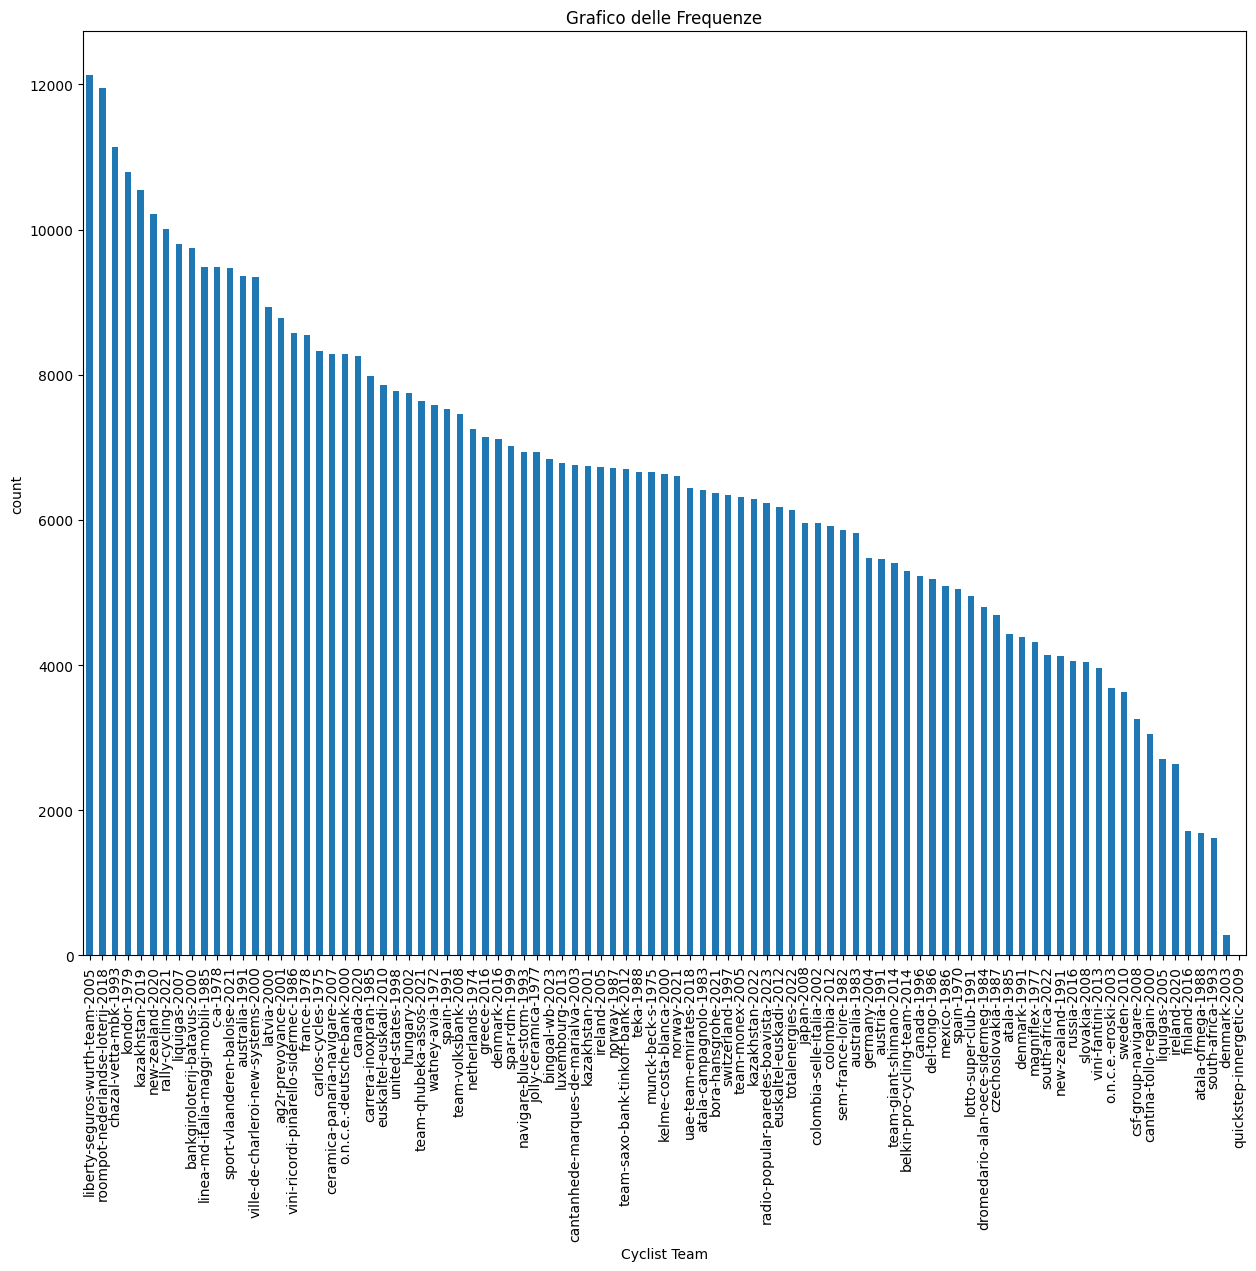

In [39]:
frequences = df_races['cyclist_team'].value_counts()

plt.figure(figsize=(15, 12))
frequences.plot(kind='bar')
plt.title('Grafico delle Frequenze')
plt.xlabel('Cyclist Team')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

Il grafico mostra una distribuzione in cui pochi team ciclistici hanno una rappresentanza molto elevata rispetto al resto. Il team più rappresentato supera i 12.000 conteggi, seguito da altri team con numeri inferiori, ma ancora significativi.
La distribuzione decresce rapidamente, con una lunga coda di team che hanno una rappresentanza molto più bassa. Questo suggerisce che il dataset è dominato da un numero limitato di team di grande rilevanza o con una partecipazione più estesa alle corse. Dopo i team con rappresentanza maggiore, la frequenza diminuisce progressivamente, con una lunga coda di team che hanno una presenza minore. Questo può riflettere la partecipazione sporadica o limitata di team meno noti o con meno successo rispetto ai principali. La predominanza di alcuni team può riflettere la loro importanza o successo nelle competizioni ciclistiche e la loro presenza nei principali eventi. La lunga coda di team meno rappresentati potrebbe rappresentare formazioni locali, minori o specializzate, che non hanno la stessa visibilità o partecipazione dei team dominanti.

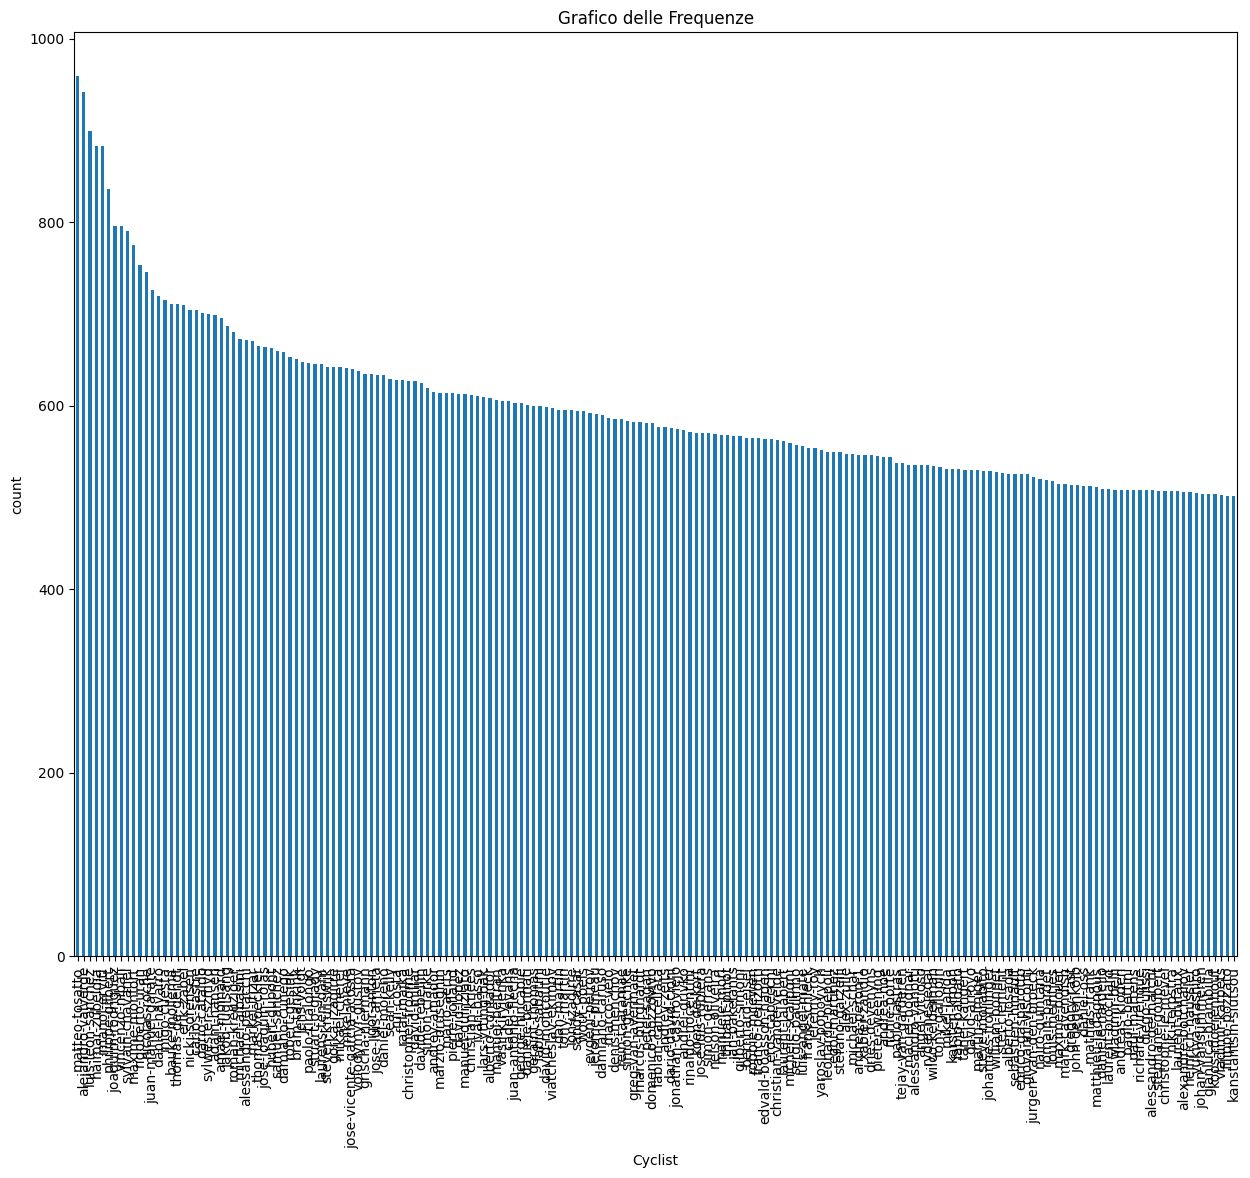

In [40]:
frequences = df_races['cyclist'].value_counts()
filtered_frequences = frequences[frequences > 500]

plt.figure(figsize=(15, 12))
filtered_frequences.plot(kind='bar')
plt.title('Grafico delle Frequenze')
plt.xlabel('Cyclist')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

Il grafico mostra che la distribuzione dei ciclisti è dominata da pochi individui con una frequenza di apparizione elevata, vicino al valore massimo di 1.000 conteggi, mentre la maggior parte dei ciclisti ha una presenza molto più bassa. La distribuzione presenta una lunga coda verso destra, con una diminuzione graduale della frequenza, evidenziando che la maggior parte dei ciclisti appare nel dataset con una frequenza relativamente bassa. La presenza di una lunga coda suggerisce che ci sono molti ciclisti che competono in un numero limitato di eventi o che non sono così rappresentati nel dataset rispetto ai ciclisti più frequenti. Il graduale declino della frequenza mostra una partecipazione decrescente ma stabile di molti ciclisti che non raggiungono il livello di apparizione dei pochi ciclisti principali. La concentrazione dei conteggi sui ciclisti più rappresentati potrebbe riflettere la presenza di atleti di alto livello o con una carriera di lunga durata e grande successo nelle competizioni. I ciclisti con conteggi più bassi potrebbero rappresentare nuovi talenti, ciclisti occasionali, o atleti con meno presenze in eventi chiave.

### Lenght vs climb_total (by profile)

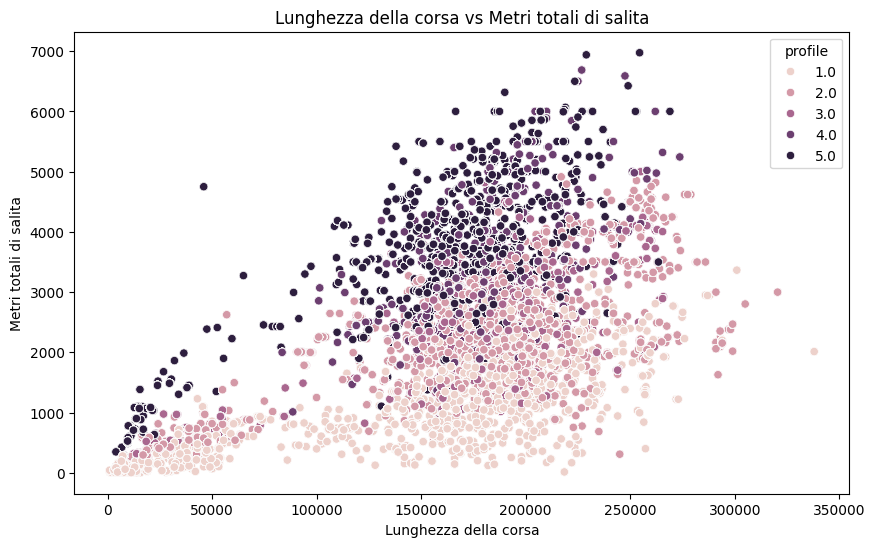

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_races, x='length', y='climb_total', hue='profile')
plt.title('Lunghezza della corsa vs Metri totali di salita')
plt.xlabel('Lunghezza della corsa')
plt.ylabel('Metri totali di salita')
plt.show()

Il grafico a dispersione mostra la relazione tra la lunghezza della corsa (length) e i metri totali di salita (climb_total), con i punti colorati in base al profilo (profile) della corsa. C'è una relazione generale positiva tra la lunghezza della corsa e i metri totali di salita: corse più lunghe tendono ad avere un dislivello maggiore. Tuttavia, il grado di variabilità è significativo, con alcune corse lunghe che presentano un dislivello relativamente basso. Questo indica che non tutte le corse lunghe sono necessariamente impegnative in termini di salita, ma molte tendono a esserlo. I colori dei punti, che rappresentano i diversi profili, mostrano che le corse con i profili più elevati (ad esempio, 5.0, rappresentato con colori scuri) tendono a concentrarsi nella parte superiore del grafico, indicando maggiori metri di salita. Al contrario, le corse con profili più bassi (1.0 o 2.0, rappresentati con colori chiari) tendono a essere distribuite in aree con lunghezza minore e minor dislivello. Le corse più impegnative, con profili 4.0 e 5.0, sono più comuni nelle aree con elevata lunghezza e dislivello, mentre le corse meno impegnative (profili bassi) si trovano in una gamma più ampia di lunghezze, ma con un dislivello generalmente più basso. Il grafico fornisce una chiara indicazione della relazione tra la difficoltà del percorso (in termini di metri di salita) e la lunghezza della corsa, con una colorazione che aiuta a identificare il tipo di corsa. Questo tipo di visualizzazione è utile per identificare corse che, pur avendo lunghezze simili, variano significativamente in termini di difficoltà (ad esempio, confrontando corse con diverso profilo).

### Profile vs Position/Delta

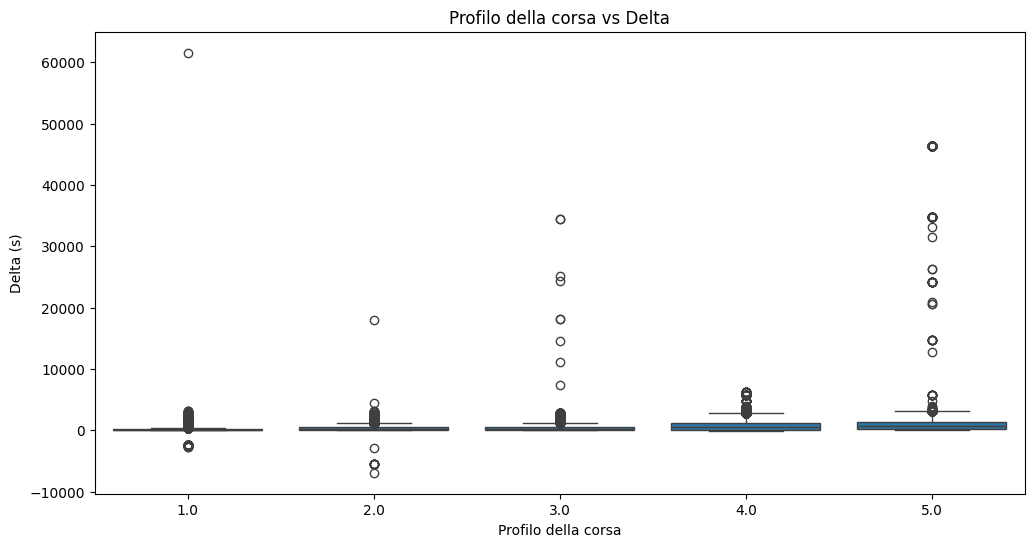

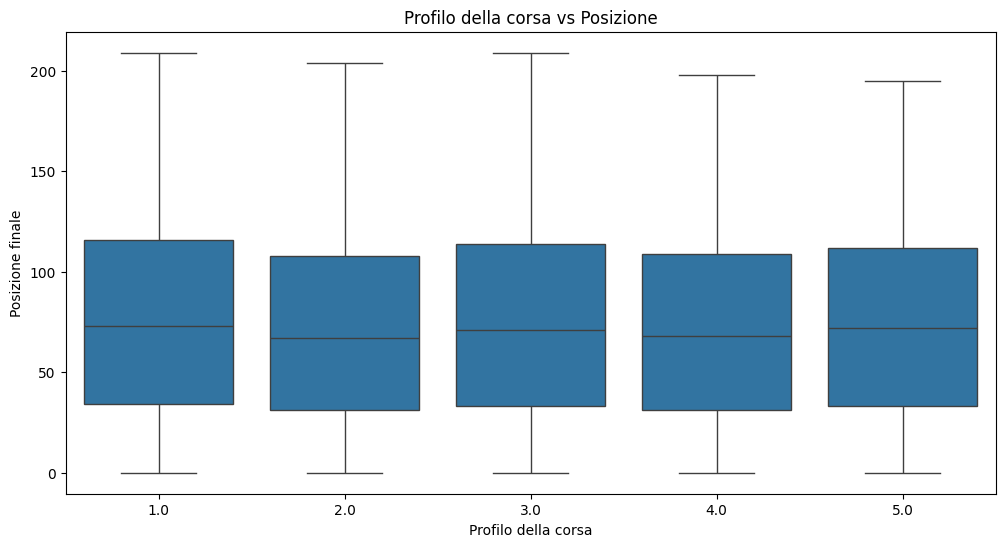

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_races, x='profile', y='delta')
plt.title('Profilo della corsa vs Delta')
plt.xlabel('Profilo della corsa')
plt.ylabel('Delta (s)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_races, x='profile', y='position')
plt.title('Profilo della corsa vs Posizione')
plt.xlabel('Profilo della corsa')
plt.ylabel('Posizione finale')
plt.show()

I box plot mostrano come la distribuzione del delta (che potrebbe rappresentare una differenza o un cambiamento misurato) varia in base al profilo della corsa. C'è una maggiore concentrazione di delta vicino allo zero per tutti i profili, con alcuni outlier significativi, in particolare per i profili più elevati (ad esempio, 4.0 e 5.0). Questo indica che le corse con profili più alti possono avere una maggiore variabilità nel valore di delta, con alcuni eventi particolarmente estremi. I valori di delta sembrano essere più concentrati vicino alla mediana per i profili più bassi, suggerendo una minore variabilità rispetto ai profili di gara più alti. I box plot mostrano la distribuzione delle posizioni finali in base al profilo della corsa. La mediana delle posizioni tende a essere leggermente più bassa (cioè migliore) per i profili più bassi (1.0 e 2.0), mentre i profili più alti mostrano una leggera dispersione più ampia. Non ci sono grandi differenze nelle distribuzioni delle posizioni finali tra i profili, suggerendo che il livello di difficoltà della corsa (rappresentato dal profilo) non influenza in modo drastico la distribuzione complessiva delle posizioni. Gli "whiskers" si estendono in modo abbastanza simile per tutte le categorie di profilo, con alcune piccole variazioni nella dispersione. Il delta sembra essere più variabile per le corse con profili elevati, il che potrebbe riflettere differenze significative in termini di condizioni o prestazioni. Le posizioni finali non variano drasticamente con il cambiamento del profilo della corsa, suggerendo una distribuzione abbastanza uniforme delle prestazioni rispetto alla difficoltà delle gare.

### Surfaces analysis

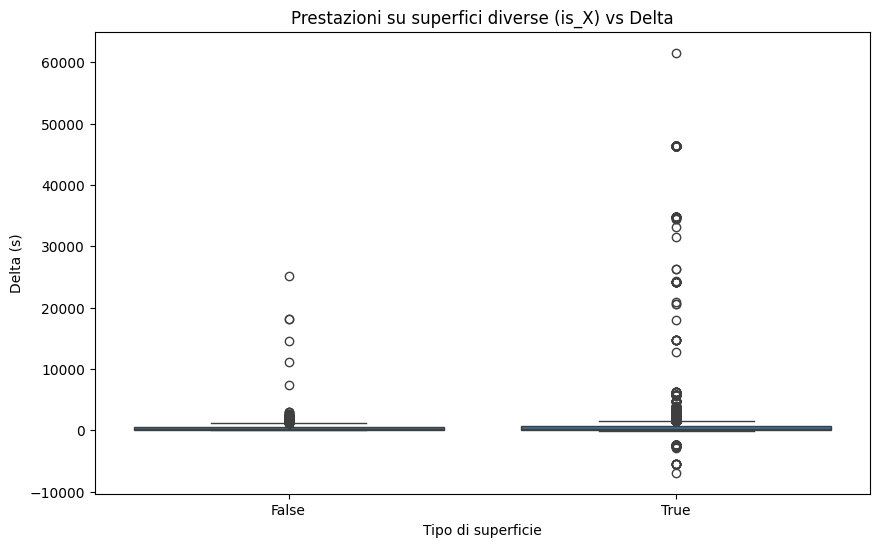

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_races, x='is_tarmac', y='delta')
plt.title('Prestazioni su superfici diverse (is_X) vs Delta')
plt.xlabel('Tipo di superficie')
plt.ylabel('Delta (s)')
plt.show()

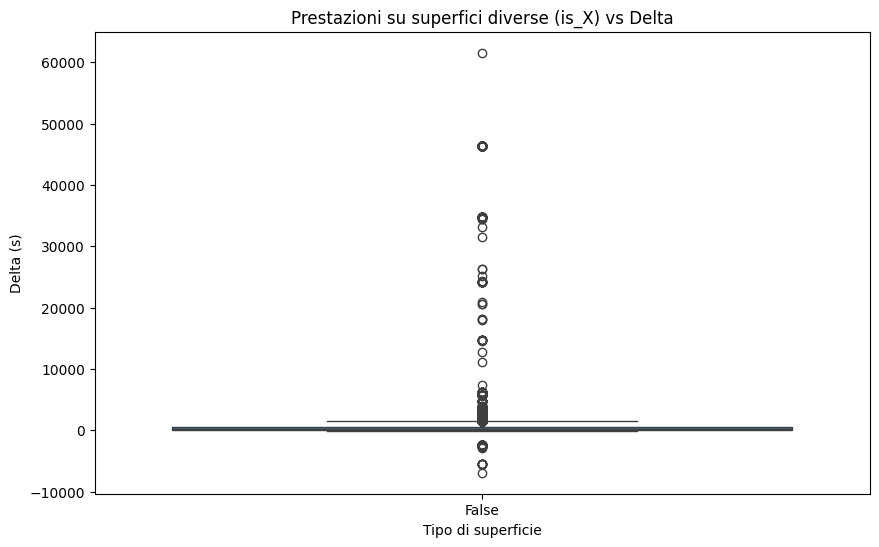

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_races, x='is_cobbled', y='delta')
plt.title('Prestazioni su superfici diverse (is_X) vs Delta')
plt.xlabel('Tipo di superficie')
plt.ylabel('Delta (s)')
plt.show()

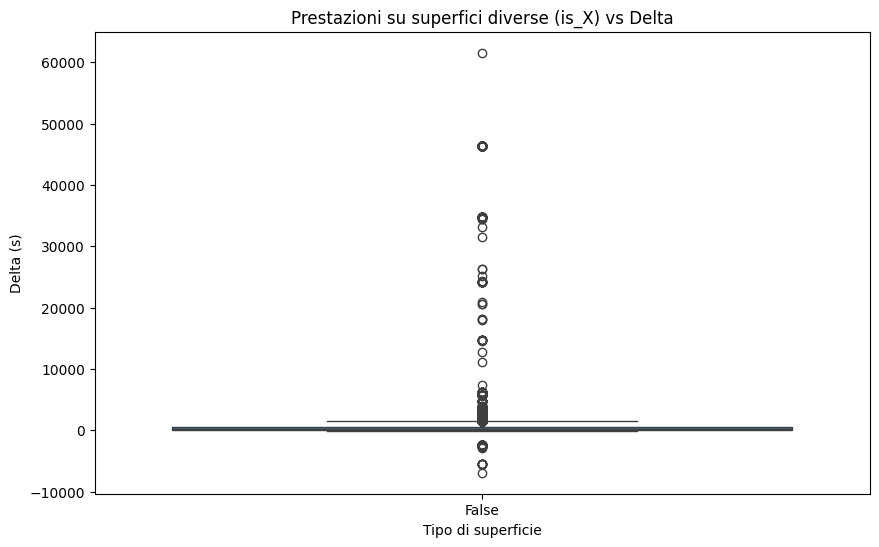

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_races, x='is_gravel', y='delta')
plt.title('Prestazioni su superfici diverse (is_X) vs Delta')
plt.xlabel('Tipo di superficie')
plt.ylabel('Delta (s)')
plt.show()

I box plot mostrano come la distribuzione di delta varia in base alla presenza di asfalto (True) o non asfalto (False).
In entrambi i casi, la distribuzione di delta è fortemente concentrata vicino allo zero, con numerosi outlier che rappresentano valori di delta molto elevati. Gli outlier sono più evidenti nel caso in cui is_tarmac sia False, indicando che su superfici diverse dall'asfalto possono verificarsi variazioni più significative rispetto alla media. Questo suggerisce che condizioni non asfaltate possano portare a una maggiore variabilità nelle prestazioni o nei valori misurati di delta. La posizione della mediana per entrambi i gruppi è vicina, suggerendo che, nella maggior parte dei casi, la differenza nei valori medi di delta tra superfici diverse non è particolarmente marcata. Tuttavia, la presenza di outlier nelle corse non asfaltate suggerisce un impatto potenziale su alcune competizioni o situazioni specifiche. La distribuzione di delta su superfici diverse può riflettere differenze di prestazione legate al tipo di terreno o condizioni di gara. L'ampia gamma di outlier nelle corse non asfaltate potrebbe rappresentare gare con condizioni particolari che influenzano significativamente le prestazioni dei partecipanti.

## Combination of the two - Data Distribution

In [47]:
df_merged = pd.merge(df_races, df_cyclists, left_on='cyclist', right_on='_url', how='inner')

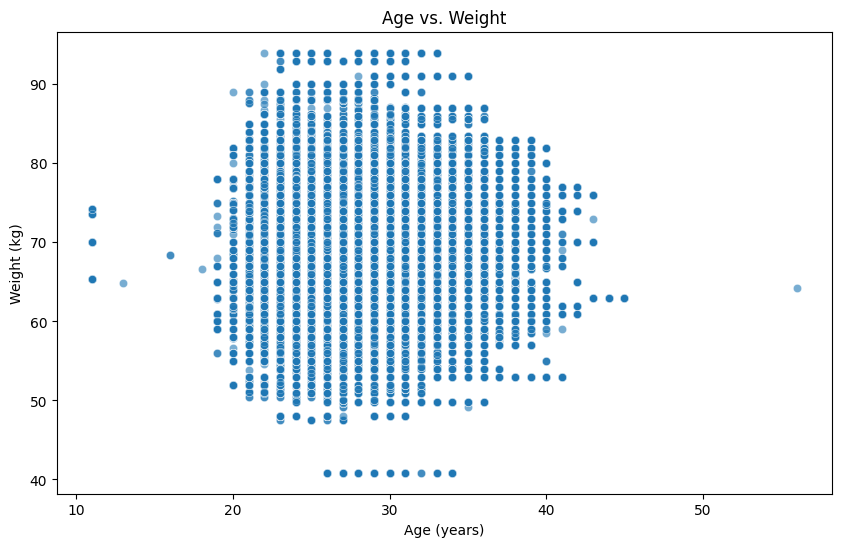

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='cyclist_age', y='weight', alpha=0.6)
plt.title('Age vs. Weight')
plt.xlabel('Age (years)')
plt.ylabel('Weight (kg)')
plt.show()

Il grafico mostra una distribuzione abbastanza densa tra i ciclisti di età compresa tra i 20 e i 35 anni, con la maggior parte dei punti concentrati in questa fascia. Ciò suggerisce che la maggior parte dei ciclisti nel dataset si colloca in questa fascia di età.
Il peso dei ciclisti è distribuito principalmente tra 60 e 80 kg, con pochi individui che si discostano significativamente da questo range. Non c'è una relazione chiara o un trend evidente tra età e peso nel dataset. I ciclisti di tutte le età sembrano avere un range di peso relativamente simile.
Questo potrebbe indicare che il peso non è direttamente correlato con l'età per questa popolazione di ciclisti, probabilmente a causa di una selezione di atleti con caratteristiche fisiche relativamente simili in base alle esigenze dello sport. Ci sono alcuni outlier visibili con pesi estremamente bassi o alti rispetto alla media della popolazione rappresentata. Potrebbero rappresentare ciclisti con specializzazioni particolari o differenze significative rispetto alla popolazione generale. Il grafico fornisce una visione chiara della distribuzione dell'età e del peso, senza una relazione lineare apparente. È possibile che ci siano altri fattori (come il tipo di gara o la specialità del ciclista) che influenzano il peso più dell'età.

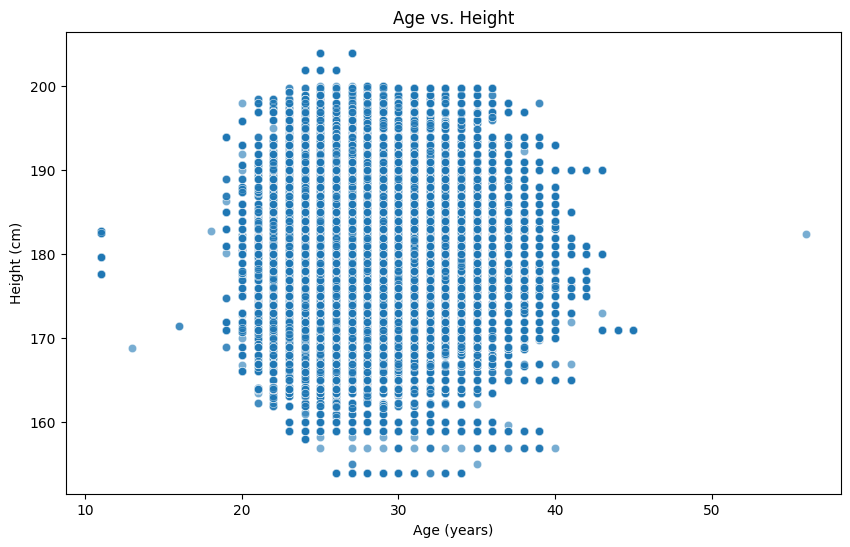

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='cyclist_age', y='height', alpha=0.6)
plt.title('Age vs. Height')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')
plt.show()

La maggior parte dei punti si concentra tra i ciclisti di età compresa tra 20 e 35 anni, simile al grafico precedente sul peso. Anche l'altezza è distribuita principalmente tra 170 cm e 190 cm, con alcuni ciclisti che si discostano da questa fascia.
Il range di altezza dei ciclisti è relativamente uniforme in questa fascia di età, con pochi individui che hanno un'altezza significativamente inferiore o superiore. Non emerge una relazione chiara o un trend visibile tra età e altezza. I ciclisti di età diverse sembrano avere un range di altezza simile, il che riflette probabilmente un certo livello di uniformità nelle caratteristiche fisiche dei ciclisti a livello competitivo.
Non ci sono evidenze che l'età influenzi l'altezza dei ciclisti nel dataset, il che è atteso, dato che l'altezza non varia nel tempo per un individuo adulto. Alcuni punti rappresentano ciclisti con altezze molto più alte (oltre i 200 cm) o molto più basse (sotto i 160 cm), ma sono rari rispetto alla distribuzione complessiva.
La distribuzione omogenea dell'altezza tra diverse età potrebbe riflettere i criteri di selezione atletica, che tendono a favorire ciclisti con caratteristiche fisiche simili, indipendentemente dall'età.
Gli outlier possono rappresentare ciclisti con particolari specializzazioni o ruoli nel team (ad esempio, sprinter, scalatori o gregari).

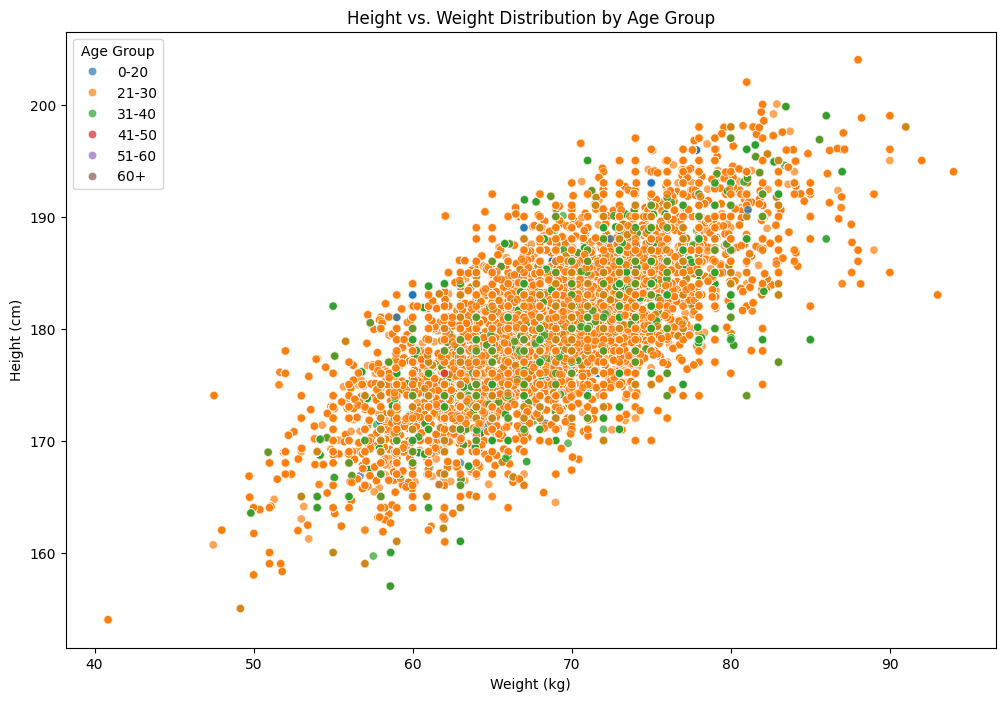

In [50]:
df_merged['age_group'] = pd.cut(df_merged['cyclist_age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_merged, x='weight', y='height', hue='age_group', alpha=0.7)
plt.title('Height vs. Weight Distribution by Age Group')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.legend(title='Age Group')
plt.show()

Il grafico mostra una correlazione positiva tra peso e altezza: in generale, ciclisti più alti tendono a pesare di più. Questa relazione è attesa e coerente con le caratteristiche fisiche tipiche. I punti sono colorati per indicare il gruppo di età e mostrano una distribuzione che copre un ampio intervallo di valori di altezza e peso, con la maggior parte dei dati concentrati tra i 170-190 cm di altezza e 60-80 kg di peso. I ciclisti appartenenti al gruppo di età 21-30 e 31-40 (colori predominanti nel grafico) rappresentano la maggior parte dei dati, suggerendo che queste fasce d'età sono le più rappresentate o dominano nelle competizioni. I gruppi di età 41-50, 51-60 e 60+ sono meno rappresentati, con una distribuzione leggermente più dispersa e pochi punti al di fuori del range tipico di altezza e peso. Il gruppo 0-20 è presente ma in numero limitato rispetto ai gruppi più adulti. Non sembra esserci una differenza significativa nella relazione tra altezza e peso in base al gruppo di età. La distribuzione è abbastanza uniforme, suggerendo che, indipendentemente dall'età, i ciclisti tendono a rientrare in un range simile di altezza e peso per competere. La predominanza dei ciclisti nei gruppi di età 21-30 e 31-40 riflette probabilmente i periodi di picco delle prestazioni fisiche. Il grafico mostra chiaramente come l'altezza e il peso si distribuiscano per età, ma non indica una variazione drastica della relazione in base all'età. 

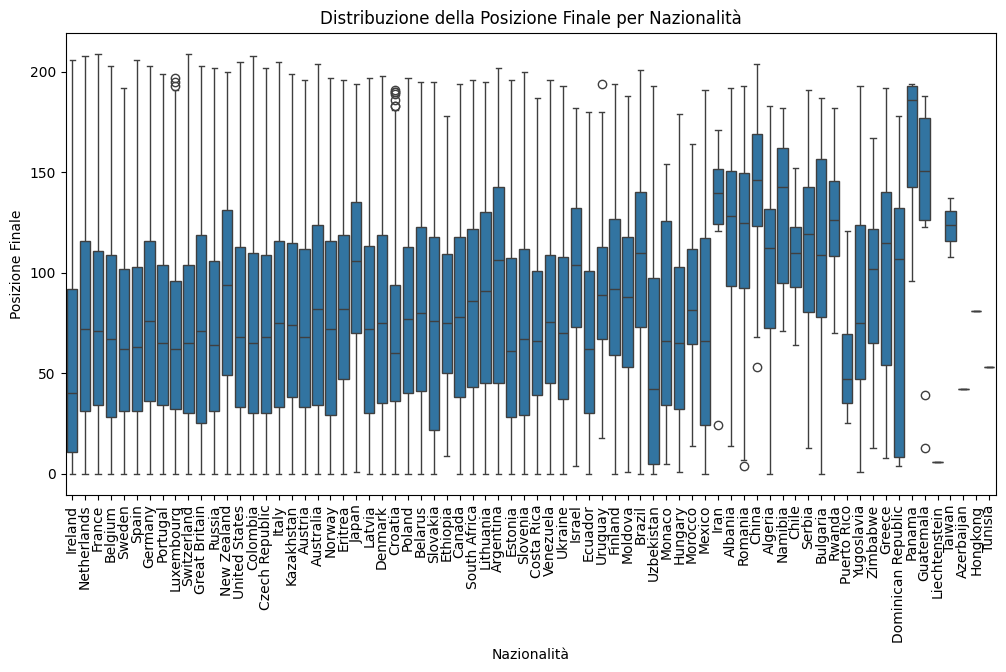

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='nationality', y='position')
plt.title('Distribuzione della Posizione Finale per Nazionalità')
plt.xlabel('Nazionalità')
plt.ylabel('Posizione Finale')
plt.xticks(rotation=90)
plt.show()

Il box plot mostra la variazione delle posizioni finali raggiunte dai ciclisti di diverse nazionalità. Ogni box rappresenta l'intervallo interquartile per le posizioni dei ciclisti di una determinata nazione, con la linea centrale che rappresenta la mediana. Le nazionalità con un intervallo interquartile più ristretto e una mediana bassa (posizioni migliori) suggeriscono che i ciclisti di questi paesi tendono a ottenere posizioni migliori nelle gare. Al contrario, nazionalità con una distribuzione più ampia o una mediana elevata indicano prestazioni mediamente inferiori. I "whiskers" che si estendono al di sopra e al di sotto dei box indicano la gamma di posizioni tipiche per ogni nazione. Gli outlier visibili oltre i "whiskers" rappresentano posizioni eccezionalmente alte o basse rispetto alla distribuzione normale per quella nazione. Alcune nazionalità mostrano una distribuzione molto ampia con molti outlier, indicando una maggiore variabilità nelle prestazioni. Alcune nazioni, come i Paesi Bassi e il Belgio, mostrano distribuzioni con mediane basse, suggerendo una buona performance complessiva nei risultati. Nazioni meno rappresentate tendono ad avere box plot con distribuzioni più ampie o meno definite, probabilmente a causa di un numero minore di ciclisti o di prestazioni molto variabili. Il grafico fornisce una panoramica delle prestazioni relative dei ciclisti di diverse nazionalità, con alcune nazioni che emergono chiaramente per la loro costanza o per il numero di ciclisti di alto livello.
Le differenze tra le distribuzioni possono riflettere differenze di livello tra i ciclisti, differenze di allenamento, supporto nazionale, o una maggiore specializzazione in determinati tipi di competizioni.

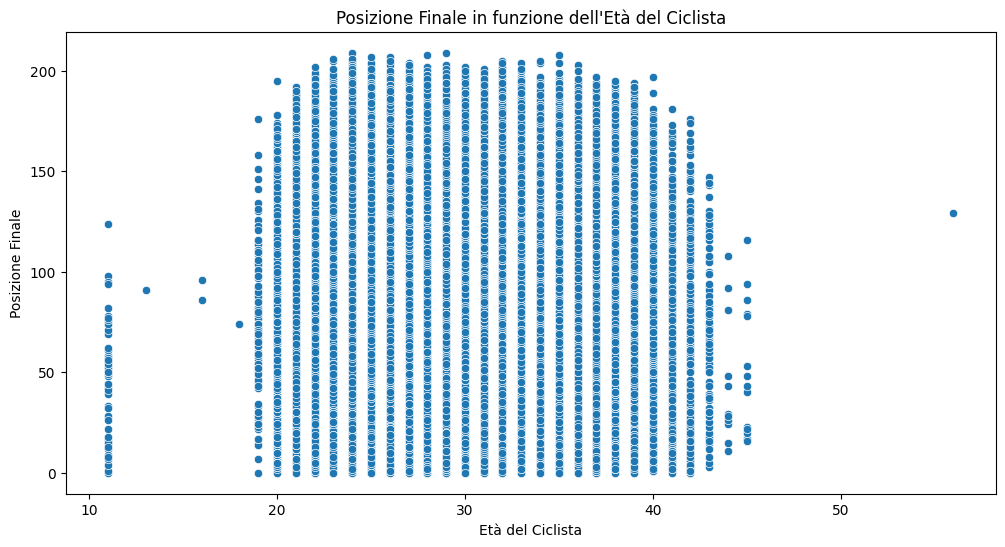

In [52]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='cyclist_age', y='position')
plt.title('Posizione Finale in funzione dell\'Età del Ciclista')
plt.xlabel('Età del Ciclista')
plt.ylabel('Posizione Finale')
plt.show()

Il grafico mostra che i ciclisti di età compresa tra circa 20 e 40 anni coprono un ampio range di posizioni, da molto alte (prossime al 200) a molto basse (vicino al primo posto). Ciò riflette la varietà delle prestazioni all'interno di questa fascia di età.
La maggior parte delle posizioni più alte è distribuita uniformemente tra questa fascia d'età, suggerendo che i ciclisti tra i 20 e i 40 anni rappresentano la maggior parte dei partecipanti. Si nota una densità relativamente alta di punti nella parte superiore del grafico (verso posizioni elevate), che suggerisce che la maggior parte dei ciclisti in questa fascia d'età finisce in posizioni più alte (cioè meno competitive).
I ciclisti giovani (sotto i 20 anni) e più anziani (sopra i 40 anni) hanno meno punti e sono distribuiti su un range più limitato, con pochi che raggiungono posizioni particolarmente alte o basse. Ci sono pochi ciclisti in età molto giovane o molto avanzata (oltre i 50 anni) che competono, e le loro posizioni tendono a essere distribuite verso l'estremità superiore (posizioni più alte). Questo potrebbe indicare un calo della competitività con l'aumentare dell'età o una minor partecipazione. Il grafico suggerisce che i ciclisti più competitivi e rappresentati si trovano nella fascia di età tra i 20 e i 40 anni, con un'ampia distribuzione di prestazioni. I ciclisti fuori da questa fascia possono comunque competere, ma sono meno rappresentati e tendono a ottenere posizioni più elevate (meno favorevoli).


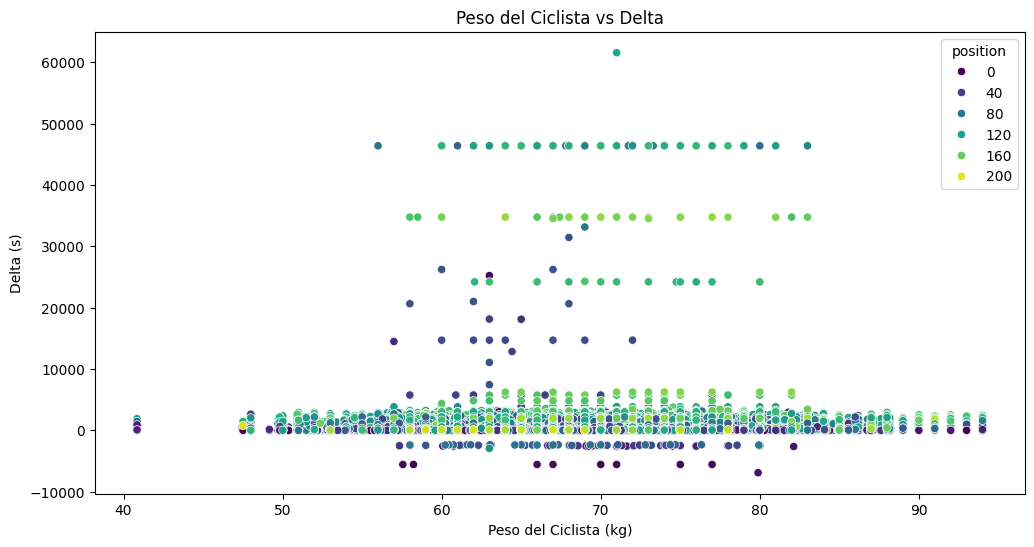

In [53]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='weight', y='delta', hue='position', palette='viridis')
plt.title('Peso del Ciclista vs Delta')
plt.xlabel('Peso del Ciclista (kg)')
plt.ylabel('Delta (s)')
plt.show()

La maggior parte dei dati è concentrata vicino al valore 0 per delta, suggerendo che la maggior parte dei ciclisti ha una variazione relativamente piccola. Ciò è coerente con una distribuzione centrata senza deviazioni eccessive. I valori di delta più elevati (sia positivi che negativi) sono rari e rappresentati da pochi ciclisti. Non sembra esserci una relazione chiara o forte tra il peso del ciclista e il valore di delta. I ciclisti con pesi diversi sono distribuiti su un ampio range di valori di delta, con una densità maggiore di ciclisti con peso tra 60 e 80 kg. I valori estremi di delta (punti distanti dalla linea centrale) sono distribuiti in modo sparso, senza una chiara concentrazione per un peso specifico. I punti sono colorati in base alla posizione del ciclista, con colori scuri che rappresentano posizioni migliori e colori più chiari per le posizioni peggiori. Non si nota una chiara correlazione tra il colore dei punti e il valore di delta. Questo suggerisce che il delta non è fortemente influenzato dalla posizione in gara o viceversa. La mancanza di una relazione evidente tra peso e delta può suggerire che altri fattori (come il tipo di corsa, le condizioni ambientali o il profilo della gara) influenzano maggiormente la prestazione o la variazione del valore di delta.
Il colore basato sulla posizione non mostra una chiara separazione o cluster, indicando che delta e posizione non sono strettamente correlati al peso del ciclista.

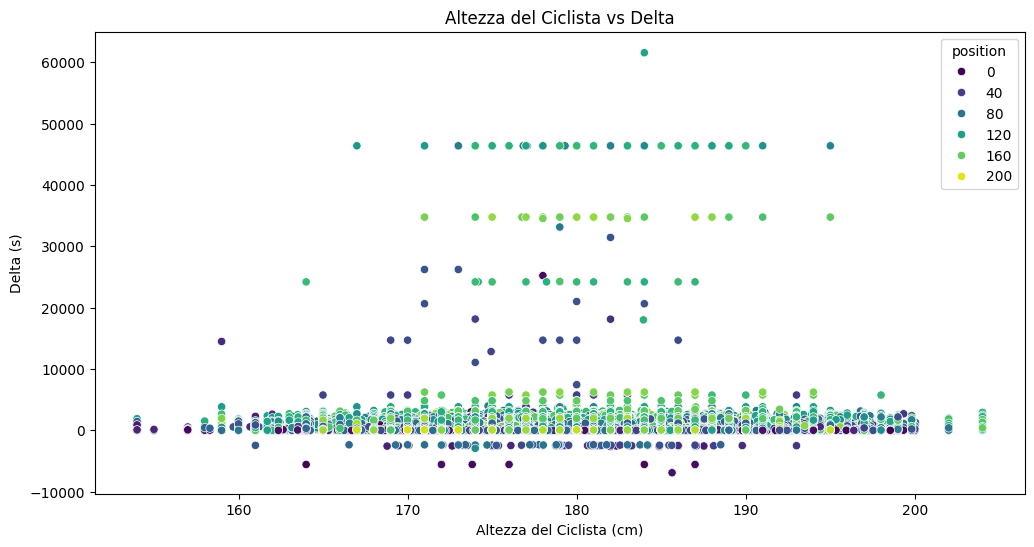

In [54]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='height', y='delta', hue='position', palette='viridis')
plt.title('Altezza del Ciclista vs Delta')
plt.xlabel('Altezza del Ciclista (cm)')
plt.ylabel('Delta (s)')
plt.show()

Il grafico mostra una distribuzione densa di valori di delta vicini allo zero per la maggior parte dei ciclisti, indipendentemente dall'altezza. La maggior parte dei dati si trova tra 160 cm e 200 cm di altezza.
Ci sono alcuni valori di delta estremamente alti (positivi e negativi) che rappresentano outlier, ma sono relativamente rari rispetto al resto dei dati. Non sembra esserci una relazione chiara tra l'altezza del ciclista e il valore di delta. I valori di delta sono distribuiti in modo uniforme per tutte le altezze, indicando che l'altezza del ciclista non è un fattore predominante per il valore di delta.
Il range di valori di delta non varia molto in base all'altezza, suggerendo che le variazioni di prestazione o di risultato rappresentate da delta non sono direttamente correlate all'altezza. I punti sono colorati in base alla posizione del ciclista, con colori scuri che rappresentano posizioni migliori e colori più chiari per le posizioni peggiori. Non c'è una chiara correlazione visibile tra il colore dei punti (cioè la posizione) e l'altezza o delta.
Ciò suggerisce che il delta non ha una relazione diretta o forte con la posizione finale in base all'altezza del ciclista. La mancanza di una relazione evidente tra altezza e delta indica che altri fattori possono essere più importanti per determinare la performance o il valore del delta.
La distribuzione uniforme dei colori suggerisce che l'altezza non è un fattore determinante per la posizione finale nelle competizioni.

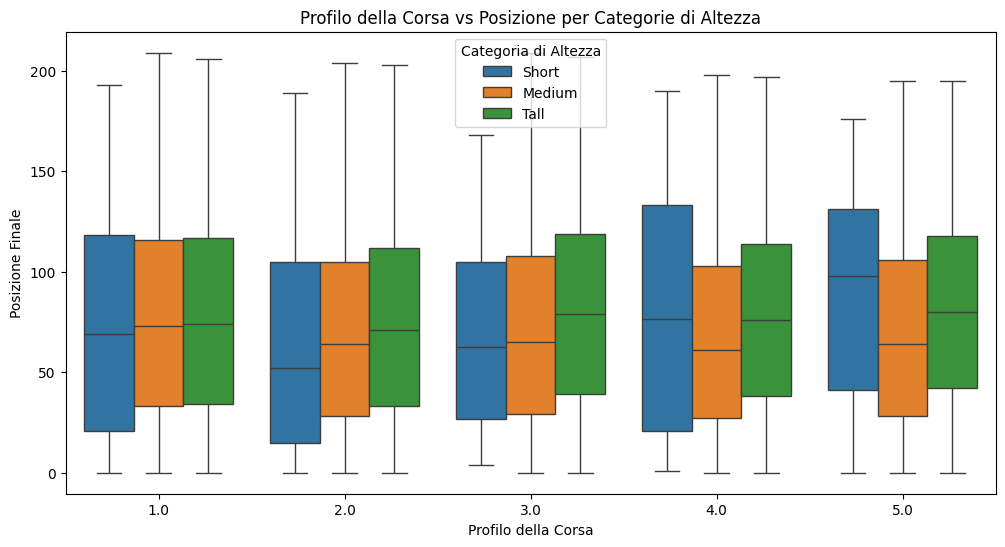

In [55]:
df_merged['height_category'] = pd.cut(df_merged['height'], bins=[140, 160, 180, 200], labels=['Short', 'Medium', 'Tall'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='profile', y='position', hue='height_category')
plt.title('Profilo della Corsa vs Posizione per Categorie di Altezza')
plt.xlabel('Profilo della Corsa')
plt.ylabel('Posizione Finale')
plt.legend(title='Categoria di Altezza')
plt.show()

Le categorie di altezza sono suddivise in tre gruppi: Short, Medium e Tall, e i ciclisti sono rappresentati con colori diversi nel grafico.
Ogni box plot mostra la distribuzione delle posizioni finali per ciascun profilo della corsa (da 1 a 5) con una suddivisione basata sulla categoria di altezza. 
Per ogni profilo della corsa, le categorie di altezza mostrano una distribuzione relativamente ampia delle posizioni finali, con mediane che possono variare leggermente tra le categorie.
Le categorie Short, Medium e Tall sembrano sovrapporsi ampiamente, indicando che l'altezza del ciclista non ha un impatto determinante o molto significativo sulla distribuzione delle posizioni finali per un dato profilo di corsa.
Non ci sono differenze molto marcate nelle mediane o negli intervalli interquartili tra le categorie di altezza per ciascun profilo della corsa. Questo suggerisce che, a parità di profilo della corsa, l'altezza non influisce in modo significativo sulla posizione finale raggiunta.
Le distribuzioni sono abbastanza simili tra le categorie, con alcune piccole variazioni nel range di valori per le posizioni peggiori o migliori, ma nulla di molto consistente.
Il grafico suggerisce che, indipendentemente dal profilo della corsa, la categoria di altezza del ciclista non ha un impatto determinante sulle posizioni finali.
Altri fattori, come la specializzazione del ciclista, la strategia di gara o le condizioni della corsa, potrebbero avere un impatto maggiore rispetto all'altezza.

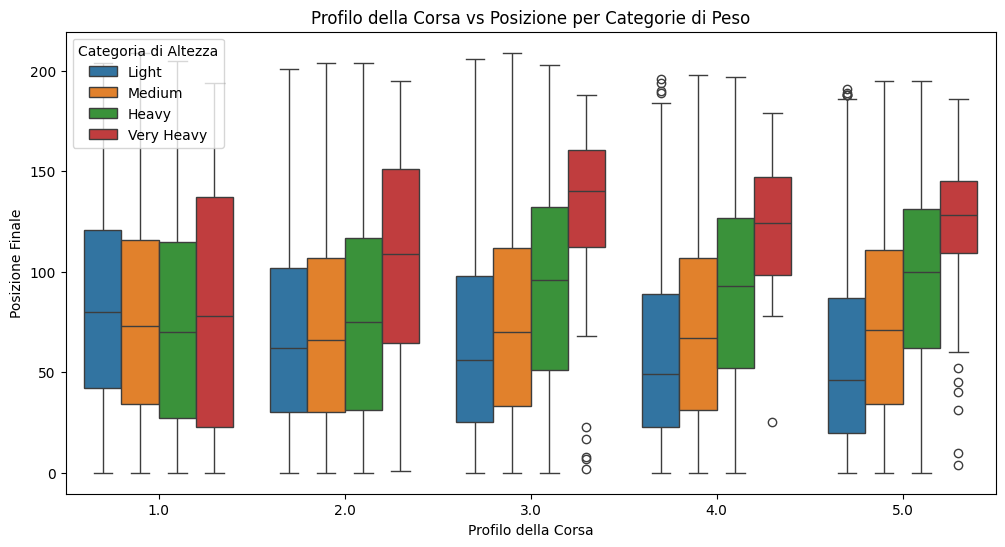

In [56]:
df_merged['weight_category'] = pd.cut(df_merged['weight'], bins=[0, 60, 75, 90, 120], labels=['Light', 'Medium', 'Heavy', 'Very Heavy'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='profile', y='position', hue='weight_category')
plt.title('Profilo della Corsa vs Posizione per Categorie di Peso')
plt.xlabel('Profilo della Corsa')
plt.ylabel('Posizione Finale')
plt.legend(title='Categoria di Altezza')
plt.show()

Le categorie di peso sono suddivise in quattro gruppi: Light, Medium, Heavy e Very Heavy. I box plot colorati rappresentano ciascuna categoria di peso per i diversi profili di corsa.
Ogni box mostra la distribuzione delle posizioni finali dei ciclisti con un determinato profilo di corsa, suddivisi in base alla categoria di peso.
I profili della corsa mostrano distribuzioni di posizione che variano in base alla categoria di peso, ma non in modo marcato o sistematico. Le mediane delle posizioni possono variare tra le categorie di peso, ma non vi è una chiara tendenza che indichi un vantaggio evidente di una determinata categoria di peso.
Ad esempio, in alcuni profili, le categorie di peso Light e Medium sembrano avere distribuzioni leggermente migliori (mediana più bassa), ma questa non è una regola costante per tutti i profili. Le distribuzioni sono generalmente ampie, con la presenza di outlier che rappresentano ciclisti che hanno ottenuto posizioni significativamente migliori o peggiori rispetto alla media del loro gruppo.
Non ci sono differenze estremamente significative o uniche tra le categorie di peso in termini di distribuzione delle posizioni. Questo suggerisce che il peso potrebbe influenzare le prestazioni in misura limitata e che altre variabili (come la specializzazione del ciclista o la strategia di gara) potrebbero avere un impatto maggiore.
L'assenza di un chiaro trend tra categorie di peso e posizioni finali nei diversi profili di corsa potrebbe indicare che il peso non è un fattore determinante per la performance in gara.
Altri fattori, come il tipo di gara (ad esempio, gara di montagna o gara su strada piatta) o le condizioni, potrebbero influenzare maggiormente la relazione tra peso e risultato finale.

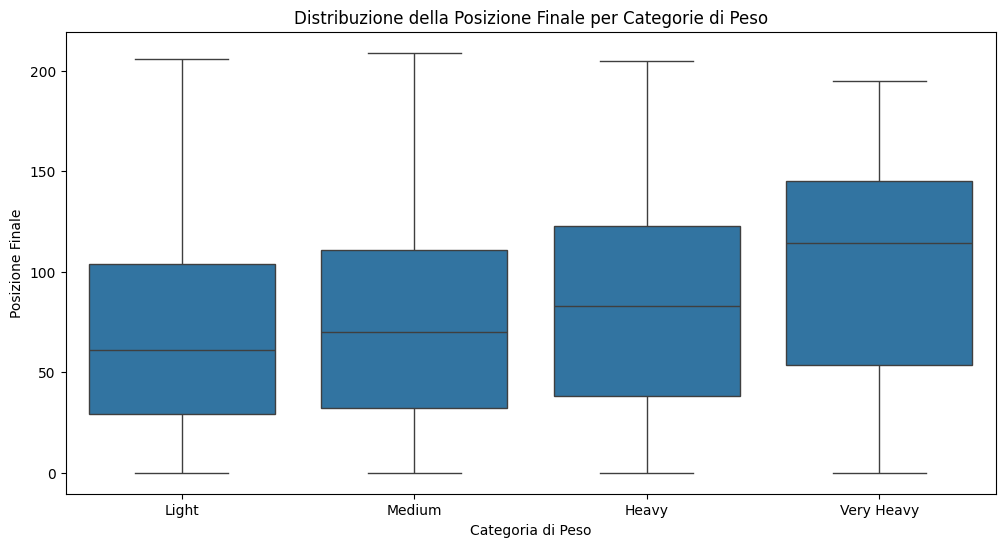

In [57]:
df_merged['weight_category'] = pd.cut(df_merged['weight'], bins=[0, 60, 75, 90, 120], labels=['Light', 'Medium', 'Heavy', 'Very Heavy'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='weight_category', y='position')
plt.title('Distribuzione della Posizione Finale per Categorie di Peso')
plt.xlabel('Categoria di Peso')
plt.ylabel('Posizione Finale')
plt.show()

Le categorie di peso sono suddivise in quattro gruppi: Light, Medium, Heavy e Very Heavy. Il box plot mostra la distribuzione delle posizioni finali per ciascuna categoria.
In generale, si osserva una distribuzione abbastanza ampia delle posizioni per tutte le categorie di peso, con mediane che non variano in modo particolarmente significativo tra le categorie. 
La categoria Light tende ad avere una mediana leggermente più bassa rispetto alle altre categorie, il che potrebbe indicare una migliore performance media rispetto ai gruppi più pesanti. Tuttavia, questa differenza non è molto marcata.
La categoria Very Heavy mostra una mediana più alta (posizione peggiore) e una distribuzione più ampia, con un numero maggiore di posizioni elevate rispetto alle altre categorie di peso. Questo suggerisce che i ciclisti più pesanti tendono a finire in posizioni meno competitive più spesso.
Tutte le categorie mostrano distribuzioni ampie, con presenza di outlier che indicano ciclisti che hanno raggiunto posizioni significativamente migliori o peggiori rispetto alla distribuzione centrale.
Le categorie Medium e Heavy mostrano una distribuzione simile, senza particolari differenze visibili nella mediana o nell'intervallo interquartile.
La distribuzione suggerisce che il peso può influire moderatamente sulle posizioni finali, con i ciclisti più leggeri che tendono a ottenere posizioni leggermente migliori rispetto ai più pesanti. Tuttavia, l'effetto non è particolarmente forte o determinante.
Altri fattori, come la preparazione, le condizioni di gara e la strategia, potrebbero avere un impatto maggiore rispetto al peso.

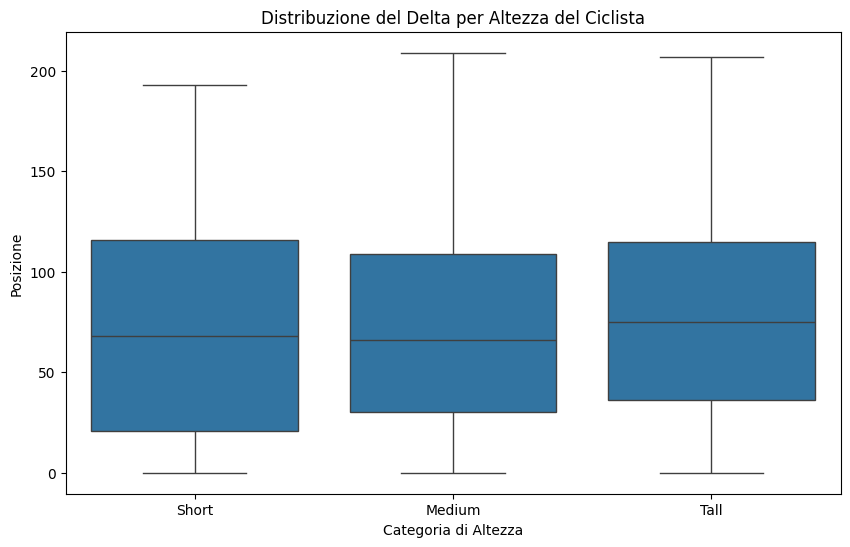

In [58]:
df_merged['height_category'] = pd.cut(df_merged['height'], bins=[140, 160, 180, 200], labels=['Short', 'Medium', 'Tall'])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged, x='height_category', y='position')
plt.title('Distribuzione del Delta per Altezza del Ciclista')
plt.xlabel('Categoria di Altezza')
plt.ylabel('Posizione')
plt.show()

Le categorie sono suddivise in tre gruppi: Short (bassa), Medium (media) e Tall (alta).
Il grafico mostra la distribuzione della posizione per ciascuna categoria di altezza, con la mediana indicata dalla linea all'interno di ciascun box.
Le mediane delle posizioni finali per le categorie di altezza Short, Medium e Tall sono simili, suggerendo che l'altezza non influisce in modo significativo sulla posizione finale.
Le distribuzioni sono simili in termini di range (distanza tra i quartili superiori e inferiori), indicando che non c'è un cambiamento drastico nella performance media in base alla categoria di altezza.
La distribuzione delle posizioni copre un ampio range per tutte le categorie di altezza, con la presenza di alcuni outlier che rappresentano risultati eccezionalmente buoni o cattivi.
L'ampiezza della distribuzione suggerisce che ci sono altri fattori oltre l'altezza che influenzano il risultato finale.
Questo grafico supporta l'idea che l'altezza del ciclista non sia un fattore determinante per la posizione finale. Le distribuzioni molto simili tra le categorie di altezza indicano che l'influenza dell'altezza sulla posizione finale è limitata.
Altri fattori, come la resistenza, l'abilità e la strategia di gara, probabilmente giocano un ruolo più significativo rispetto all'altezza.


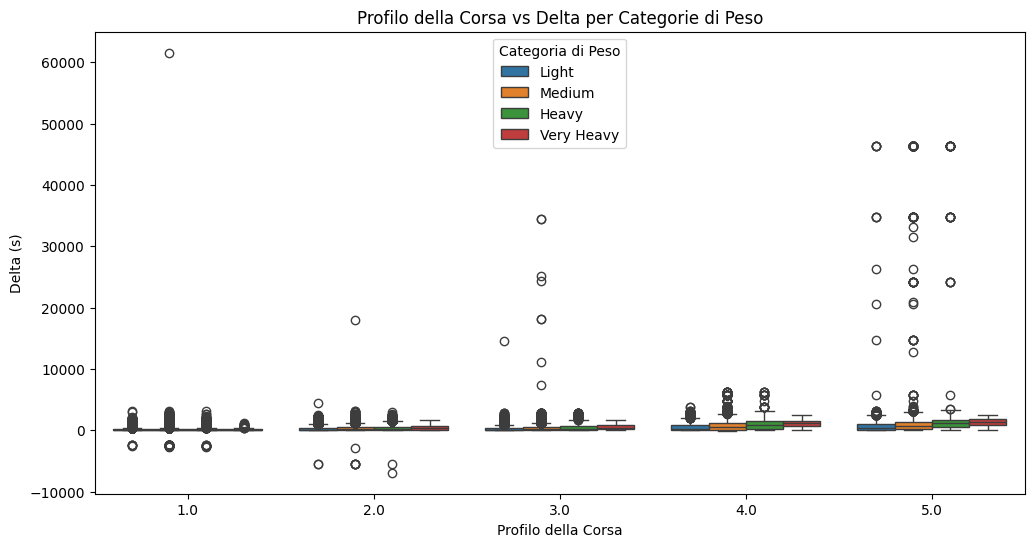

In [59]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='profile', y='delta', hue='weight_category')
plt.title('Profilo della Corsa vs Delta per Categorie di Peso')
plt.xlabel('Profilo della Corsa')
plt.ylabel('Delta (s)')
plt.legend(title='Categoria di Peso')
plt.show()

I profili di corsa vanno da 1 a 5 e ciascun profilo ha distribuzioni diverse del delta.
Le categorie di peso più leggere sembrano avere distribuzioni di delta più compatte, con meno outlier estremi, rispetto alle categorie più pesanti. Questo potrebbe indicare prestazioni più consistenti per ciclisti più leggeri rispetto a quelli più pesanti. Per i profili di corsa 4 e 5, si osserva una maggiore presenza di outlier con delta più elevati, soprattutto per le categorie di peso più pesanti, suggerendo che questi profili di gara potrebbero essere più impegnativi per i ciclisti più pesanti. In generale, le categorie di peso più leggere (Light e Medium) mostrano distribuzioni di delta più vicine tra loro e con meno dispersione rispetto alle categorie Heavy e Very Heavy. Questo potrebbe indicare che il peso ha un impatto maggiore su gare con profili di corsa più impegnativi (come evidenziato dai profili 4 e 5).
I ciclisti con peso più leggero potrebbero essere avvantaggiati in alcune gare con determinati profili di corsa, evidenziando una correlazione tra il peso e la difficoltà del percorso.
La presenza di outlier per le categorie di peso più pesanti suggerisce che alcuni ciclisti possono comunque competere bene, ma rappresentano eccezioni rispetto alla tendenza generale.

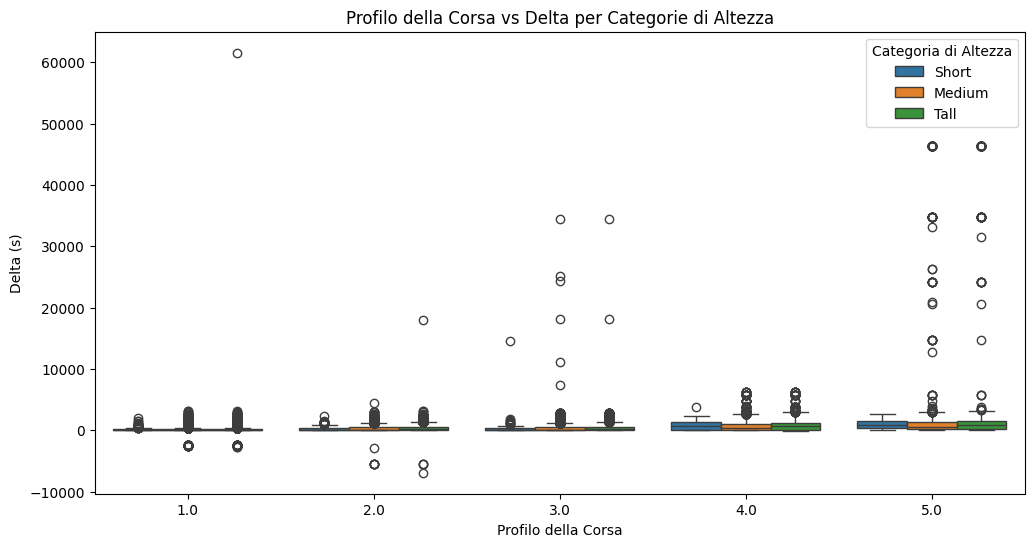

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='profile', y='delta', hue='height_category')
plt.title('Profilo della Corsa vs Delta per Categorie di Altezza')
plt.xlabel('Profilo della Corsa')
plt.ylabel('Delta (s)')
plt.legend(title='Categoria di Altezza')
plt.show()

Osserviamo che i profili di corsa da 1 a 5 mostrano distribuzioni di delta diverse per ciascuna categoria di altezza.
In generale, le categorie di altezza tendono a mostrare distribuzioni simili di delta, con alcune differenze visibili nei valori estremi (outlier). Per i profili di corsa 4 e 5, notiamo una maggiore dispersione e la presenza di più outlier, suggerendo che queste gare potrebbero essere più impegnative e causare maggiore variabilità nelle prestazioni.
Le categorie di altezza Tall mostrano una leggera tendenza a distribuzioni più compatte rispetto a Short e Medium, anche se la differenza non è marcata.
Non sembra esserci una differenza significativa nella distribuzione del delta tra le categorie di altezza all'interno di ciascun profilo di corsa. Questo potrebbe indicare che l'altezza non ha un impatto determinante sul delta in funzione del profilo della corsa.
Tuttavia, la presenza di outlier nei profili più impegnativi potrebbe essere un'indicazione di gare che favoriscono determinate caratteristiche fisiche o strategie.

/tmp/ipykernel_13330/1918595807.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df_merged.groupby('nationality', group_keys=False).apply(lambda x: x.sample(min(len(x), 50)))


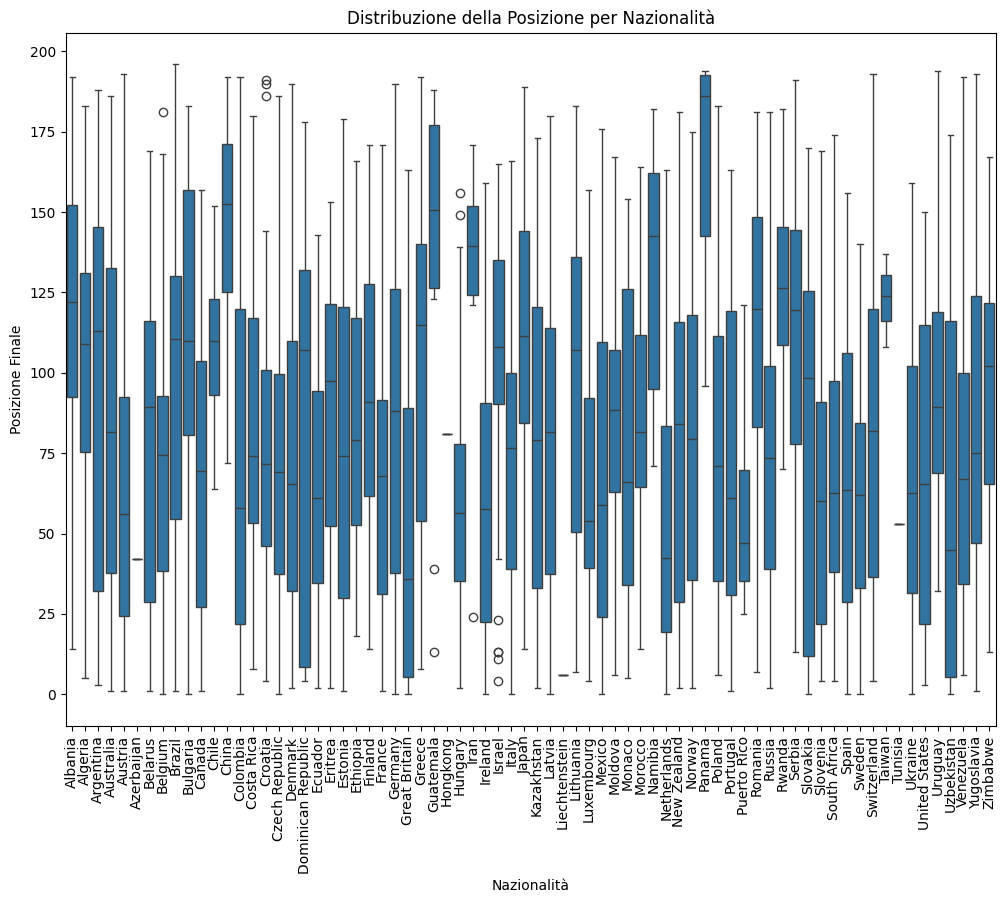

In [61]:
stratified_sample = df_merged.groupby('nationality', group_keys=False).apply(lambda x: x.sample(min(len(x), 50))) 
plt.figure(figsize=(12, 9))
sns.boxplot(data=stratified_sample, x='nationality', y='position')
plt.title('Distribuzione della Posizione per Nazionalità')
plt.xlabel('Nazionalità')
plt.ylabel('Posizione Finale')
plt.xticks(rotation=90)
plt.show()

Alcune nazionalità mostrano una distribuzione più compatta, il che suggerisce una prestazione più consistente dei ciclisti di quella nazionalità.
Altre nazionalità presentano una distribuzione molto ampia, indicando un'ampia variabilità nei risultati. 
Non sembra esserci un chiaro trend che mostra una nazionalità con una dominanza assoluta nelle posizioni finali. Questo suggerisce che il successo può essere distribuito su ciclisti provenienti da varie nazioni, pur con alcune differenze nella mediana delle posizioni finali.Per diverse nazionalità, sono presenti outlier che potrebbero rappresentare ciclisti con prestazioni eccezionali o particolarmente scarse rispetto al resto del gruppo.

/tmp/ipykernel_13330/3818208454.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df_merged.groupby('profile', group_keys=False).apply(lambda x: x.sample(min(len(x), 30)))


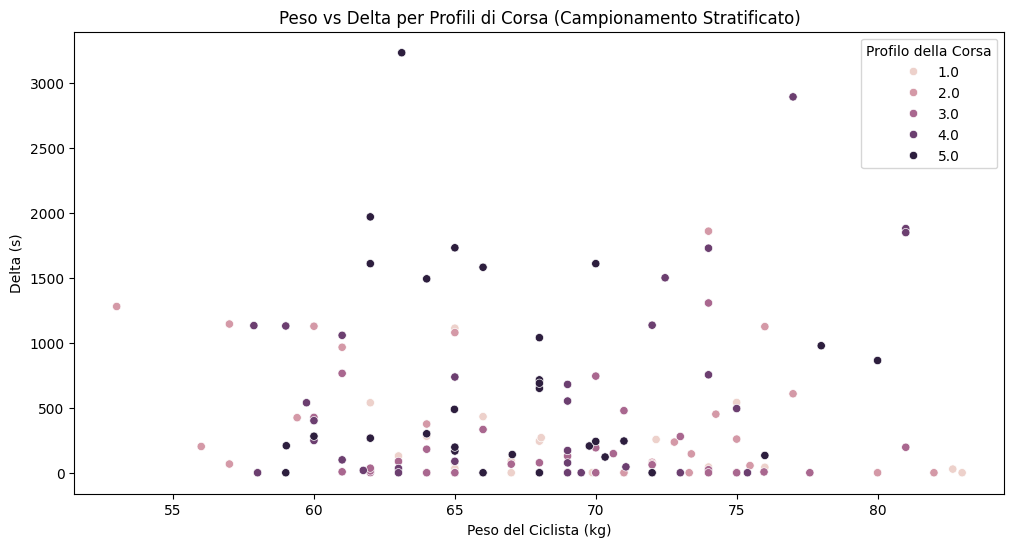

In [62]:
stratified_sample = df_merged.groupby('profile', group_keys=False).apply(lambda x: x.sample(min(len(x), 30)))
plt.figure(figsize=(12, 6))
sns.scatterplot(data=stratified_sample, x='weight', y='delta', hue='profile')
plt.title('Peso vs Delta per Profili di Corsa (Campionamento Stratificato)')
plt.xlabel('Peso del Ciclista (kg)')
plt.ylabel('Delta (s)')
plt.legend(title='Profilo della Corsa')
plt.show()

I ciclisti con pesi differenti mostrano una variabilità significativa nei delta.
Non sembra esserci una relazione chiara e lineare tra peso e delta; tuttavia, si possono notare concentrazioni di delta per alcune fasce di peso. Il grafico utilizza un campionamento stratificato per ciascun profilo, il che significa che i dati mostrati sono rappresentativi di campioni bilanciati per ciascun profilo. I ciclisti con profili di corsa diversi sembrano avere distribuzioni differenti per i valori di delta, evidenziando possibili impatti della tipologia di corsa sulle prestazioni.

/tmp/ipykernel_13330/955768006.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df_merged.groupby('profile', group_keys=False).apply(lambda x: x.sample(min(len(x), 30)))


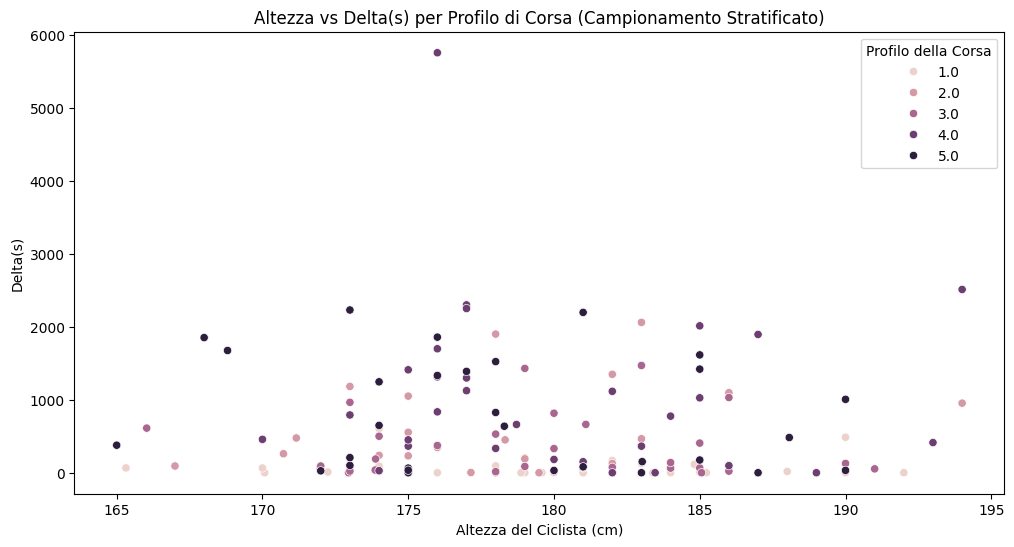

In [63]:
stratified_sample = df_merged.groupby('profile', group_keys=False).apply(lambda x: x.sample(min(len(x), 30)))
plt.figure(figsize=(12, 6))
sns.scatterplot(data=stratified_sample, x='height', y='delta', hue='profile')
plt.title('Altezza vs Delta(s) per Profilo di Corsa (Campionamento Stratificato)')
plt.xlabel('Altezza del Ciclista (cm)')
plt.ylabel('Delta(s)')
plt.legend(title='Profilo della Corsa')
plt.show()

Non sembra esserci una relazione lineare evidente tra altezza e delta; tuttavia, alcune concentrazioni di punti per determinate altezze potrebbero suggerire che certi intervalli di altezza abbiano comportamenti leggermente distinti in termini di delta rispetto ai profili di corsa. Alcuni profili (colori distinti) presentano una distribuzione più densa in determinate fasce di altezza, indicando che certi tipi di corsa potrebbero avere un impatto particolare su ciclisti con caratteristiche specifiche. Il campionamento stratificato consente di visualizzare una rappresentazione più equilibrata dei dati per ciascun profilo, offrendo una visione equa delle relazioni tra altezza, delta e tipologia di corsa.

/tmp/ipykernel_13330/2803237396.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample_age = df_merged.groupby('cyclist_age', group_keys=False).apply(lambda x: x.sample(min(len(x), 30)))


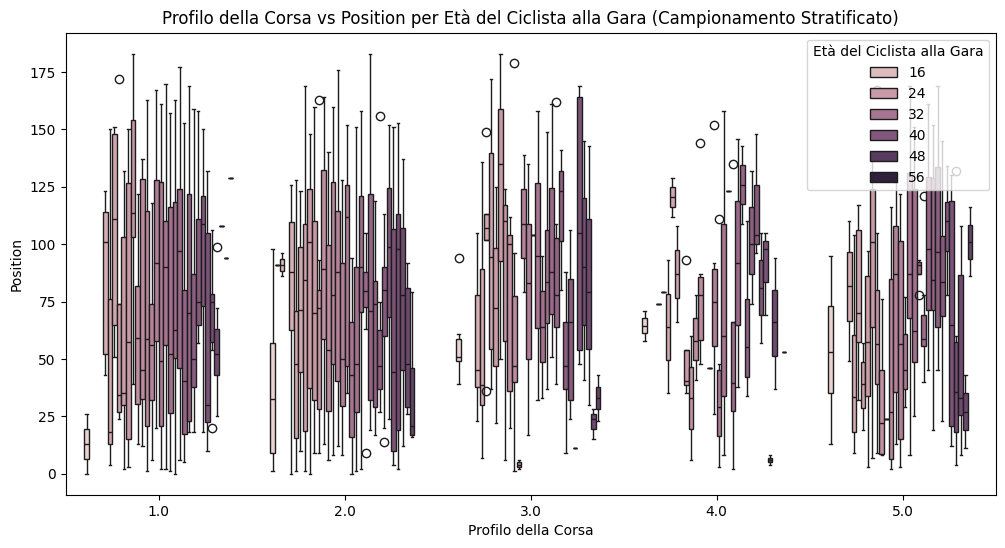

In [64]:
stratified_sample_age = df_merged.groupby('cyclist_age', group_keys=False).apply(lambda x: x.sample(min(len(x), 30)))
plt.figure(figsize=(12, 6))
sns.boxplot(data=stratified_sample_age, x='profile', y='position', hue='cyclist_age')
plt.title('Profilo della Corsa vs Position per Età del Ciclista alla Gara (Campionamento Stratificato)')
plt.xlabel('Profilo della Corsa')
plt.ylabel('Position')
plt.legend(title='Età del Ciclista alla Gara')
plt.show()


Per ciascun profilo di corsa (da 1.0 a 5.0), è possibile osservare variazioni nella mediana e nella distribuzione delle posizioni.
Le barre di variazione e i punti fuori scala (outliers) suggeriscono che certi gruppi di età possono avere prestazioni migliori o peggiori per particolari tipi di gara. Questo campionamento stratificato offre una rappresentazione bilanciata per mostrare come l'età dei ciclisti influisca sulla loro posizione finale in diverse gare, evitando di essere dominato da gruppi d'età più presenti.

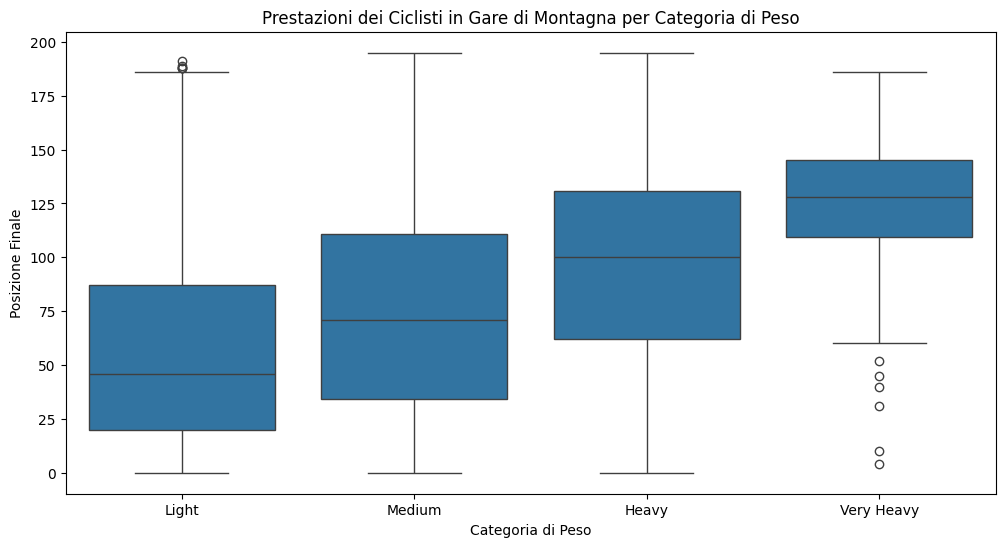

In [65]:
mountain_races = df_merged[df_merged['profile'] == 4 | 5]
plt.figure(figsize=(12, 6))
sns.boxplot(data=mountain_races, x='weight_category', y='position')
plt.title('Prestazioni dei Ciclisti in Gare di Montagna per Categoria di Peso')
plt.xlabel('Categoria di Peso')
plt.ylabel('Posizione Finale')
plt.show()

La categoria "Light" (leggero) tende a presentare prestazioni migliori rispetto alle altre categorie, con una mediana più bassa, indicando posizioni migliori.
La categoria "Medium" mostra un incremento nelle posizioni medie rispetto alla categoria "Light", suggerendo una performance leggermente inferiore.
Le categorie "Heavy" (pesante) e "Very Heavy" (molto pesante) hanno distribuzioni che mostrano medie e mediane peggiori, suggerendo che il peso può influenzare negativamente la performance in gare di montagna. 
La distribuzione delle posizioni nella categoria "Light" è meno dispersa rispetto alle categorie più pesanti, con una minore presenza di outlier.
Le categorie più pesanti mostrano una maggiore variabilità, indicando che i risultati per ciclisti di queste categorie possono essere molto diversi tra loro.
Si notano alcuni valori anomali (outlier) specialmente nella categoria "Very Heavy", evidenziando che alcuni ciclisti possono ottenere risultati migliori o peggiori in modo estremo rispetto alla tendenza generale.

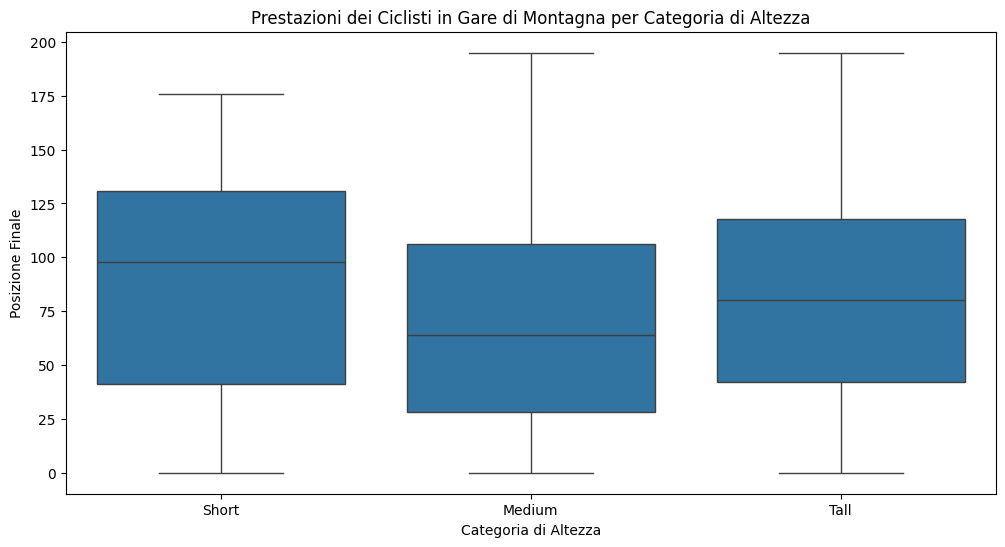

In [66]:

mountain_races = df_merged[df_merged['profile'] == 4 | 5]
plt.figure(figsize=(12, 6))
sns.boxplot(data=mountain_races, x='height_category', y='position')
plt.title('Prestazioni dei Ciclisti in Gare di Montagna per Categoria di Altezza')
plt.xlabel('Categoria di Altezza')
plt.ylabel('Posizione Finale')
plt.show()

I ciclisti nella categoria "Medium" tendono a ottenere risultati leggermente migliori, con una mediana più bassa rispetto a "Short" e "Tall".
I ciclisti "Short" (bassa statura) e "Tall" (alta statura) mostrano distribuzioni simili, con mediane e quartili interni che suggeriscono una leggera riduzione della performance rispetto alla categoria "Medium". Tutte le categorie mostrano una significativa variabilità nelle posizioni finali, ma la categoria "Medium" ha una distribuzione leggermente più compatta, suggerendo una performance più costante rispetto alle altre categorie.
Non ci sono outlier estremi rilevati per nessuna delle categorie, suggerendo una distribuzione piuttosto uniforme per ciascuna altezza.  

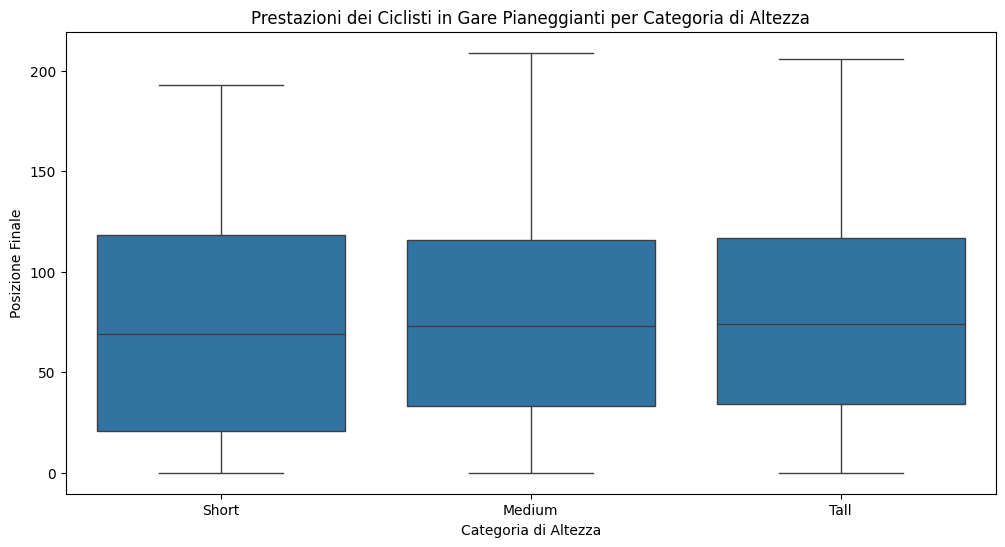

In [67]:
flat_races = df_merged[df_merged['profile'] == 1]
plt.figure(figsize=(12, 6))
sns.boxplot(data=flat_races, x='height_category', y='position')
plt.title('Prestazioni dei Ciclisti in Gare Pianeggianti per Categoria di Altezza')
plt.xlabel('Categoria di Altezza')
plt.ylabel('Posizione Finale')
plt.show()

Le mediane delle posizioni finali per ciascuna categoria di altezza sono simili, indicando che non c'è una differenza sostanziale nelle prestazioni tra ciclisti di diversa altezza nelle gare pianeggianti.
La posizione finale media sembra essere attorno ai 70-100 per tutte le categorie, suggerendo che tutti i ciclisti, indipendentemente dall'altezza, si posizionano in modo simile in queste gare.
La variabilità delle posizioni finali è simile tra le categorie Short e Medium, ma leggermente più ampia per i ciclisti Tall, come indicato dalla lunghezza dei baffi delle scatole.
Nessuna delle categorie mostra outlier estremi significativi, il che suggerisce che le posizioni finali sono relativamente consistenti per tutti i ciclisti in gare pianeggianti.
Il fatto che le categorie di altezza non mostrino grandi differenze nei risultati potrebbe indicare che, nelle gare pianeggianti, fattori come la strategia di corsa, l'allenamento e la tecnica possano avere un ruolo maggiore rispetto all'altezza fisica.

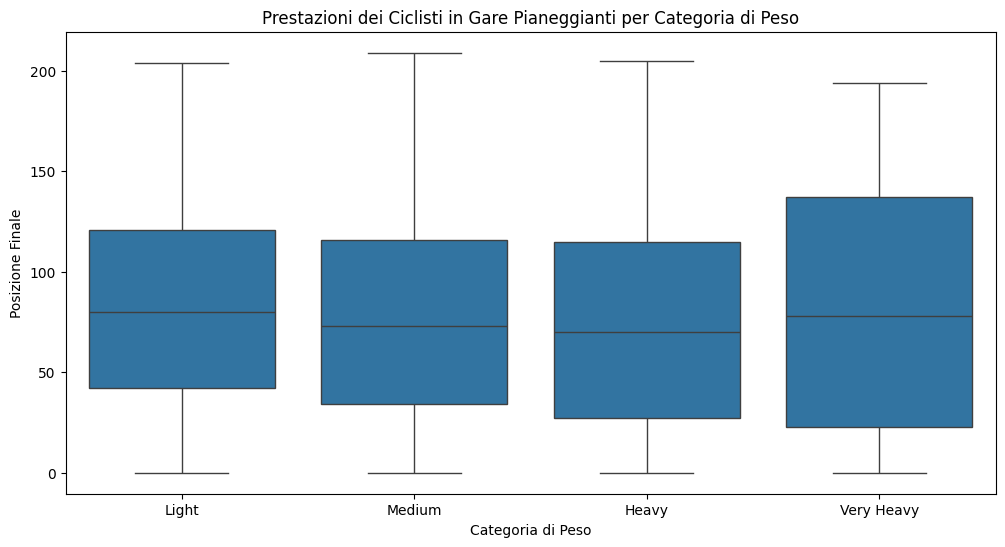

In [68]:
flat_races = df_merged[df_merged['profile'] == 1]
plt.figure(figsize=(12, 6))
sns.boxplot(data=flat_races, x='weight_category', y='position')
plt.title('Prestazioni dei Ciclisti in Gare Pianeggianti per Categoria di Peso')
plt.xlabel('Categoria di Peso')
plt.ylabel('Posizione Finale')
plt.show()

Le posizioni finali medie per tutte le categorie di peso sono simili, con la categoria "Light" che sembra avere la mediana più bassa, indicando prestazioni relativamente migliori rispetto alle altre categorie.
Le categorie "Medium" e "Heavy" mostrano posizioni finali simili, mentre "Very Heavy" ha una mediana più alta, suggerendo che i ciclisti molto pesanti potrebbero avere prestazioni meno competitive nelle gare pianeggianti. Tutte le categorie mostrano una certa variabilità, ma la categoria "Very Heavy" ha un range più ampio di posizioni finali, con diversi outlier, il che può indicare che i ciclisti più pesanti possono avere prestazioni molto variabili.
Le categorie "Light" e "Medium" hanno una distribuzione più concentrata, suggerendo che la maggior parte dei ciclisti in queste categorie ha prestazioni più simili. Il fatto che le categorie di peso non mostrino differenze enormi nelle posizioni finali suggerisce che, nelle gare pianeggianti, i fattori come la forma fisica, l'allenamento e la strategia di gara potrebbero influenzare più delle caratteristiche fisiche come il peso.
È interessante notare che non ci sono differenze significative nelle prestazioni tra le categorie "Light" e "Medium", indicando che anche ciclisti di peso moderato possono competere efficacemente.


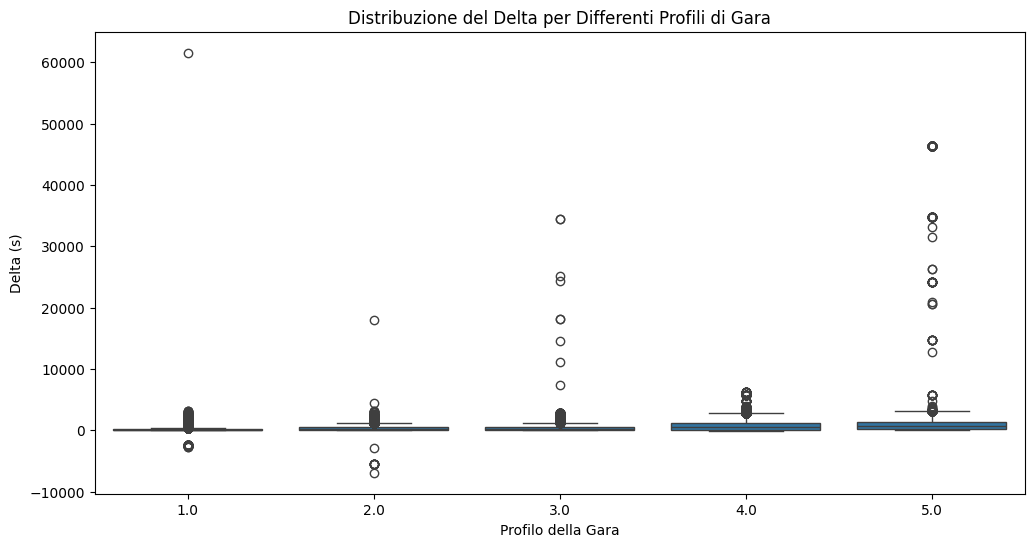

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='profile', y='delta')
plt.title('Distribuzione del Delta per Differenti Profili di Gara')
plt.xlabel('Profilo della Gara')
plt.ylabel('Delta (s)')
plt.show()

I profili di gara da 1 a 5 mostrano una distribuzione simile del delta, con valori di delta che variano da sotto zero a oltre 60.000 secondi. Questo suggerisce che ci sono ciclisti che hanno subito un ampio range di variazioni nei tempi, indipendentemente dal profilo della gara.
Le medie (linee nere all'interno delle scatole) per i profili 1 e 2 sembrano più elevate rispetto agli altri profili, indicando che, in media, le gare con questi profili hanno comportato delta più elevati, potenzialmente indicando un maggiore margine di tempo tra i ciclisti.
I profili 4 e 5 mostrano una mediana inferiore, suggerendo che queste gare potrebbero aver avuto risultati più omogenei o che i ciclisti siano stati più competitivi.
Tutti i profili mostrano la presenza di outliers, in particolare i profili 1 e 2, dove ci sono ciclisti con differenze di tempo estremamente elevate. Questi outliers possono rappresentare anomalie nei risultati, come incidenti o ritiri, che hanno impattato significativamente i loro tempi di gara. I profili 3 e 4 hanno meno outliers, il che suggerisce prestazioni più stabili tra i ciclisti.
La variazione del delta tra i diversi profili di gara suggerisce che le condizioni di corsa e il tipo di gara possono influenzare notevolmente le prestazioni dei ciclisti. È interessante notare che anche all'interno di profili di gara simili, ci possono essere ampie variazioni nelle prestazioni, il che può essere dovuto a fattori individuali, strategie di gara, o variazioni nelle condizioni ambientali.


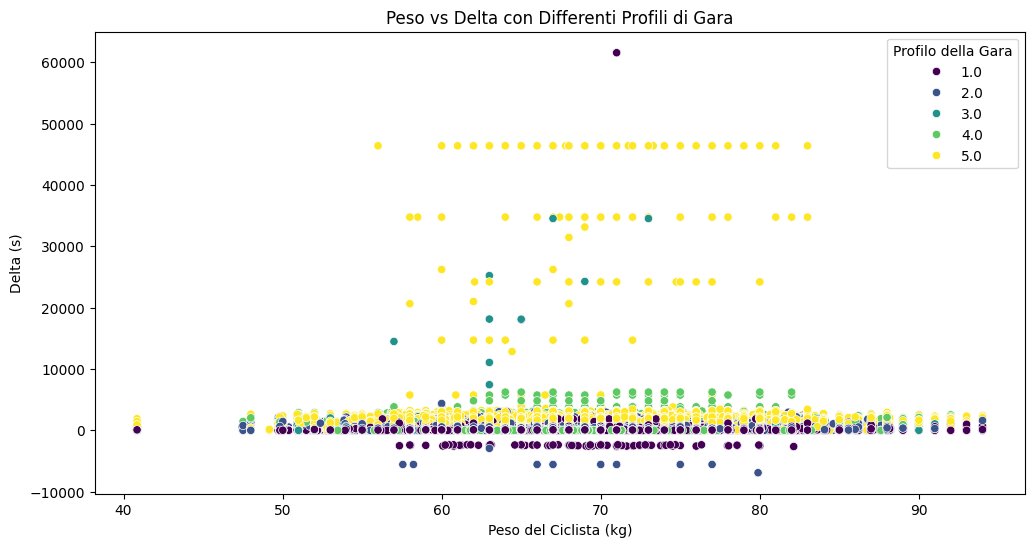

In [70]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='weight', y='delta', hue='profile', palette='viridis')
plt.title('Peso vs Delta con Differenti Profili di Gara')
plt.xlabel('Peso del Ciclista (kg)')
plt.ylabel('Delta (s)')
plt.legend(title='Profilo della Gara')
plt.show()

La maggior parte dei punti è concentrata in un range di peso compreso tra 60 kg e 80 kg, suggerendo che la maggior parte dei ciclisti partecipanti a queste gare si colloca in questo intervallo di peso.
C'è una minore densità di ciclisti al di fuori di questo intervallo, indicando che i ciclisti molto leggeri (sotto i 60 kg) o molto pesanti (sopra gli 80 kg) sono meno comuni.
La variabilità del delta (tempo di differenza) sembra essere più contenuta per ciclisti che pesano tra i 70 kg e gli 80 kg. Questo potrebbe suggerire che i ciclisti in questo intervallo di peso tendono ad avere prestazioni più simili rispetto ad altri.
Per i ciclisti più leggeri e più pesanti, il delta varia significativamente, suggerendo che il peso potrebbe influenzare in modo diverso le prestazioni a seconda del profilo della gara. I ciclisti nei profili 1 e 2 (individuati dai colori più scuri) tendono ad avere una maggiore variabilità nei tempi di delta rispetto a quelli nei profili 4 e 5, che sembrano avere prestazioni più stabili (colori più chiari).
I ciclisti di profili diversi presentano delle differenze nei tempi, il che potrebbe indicare che le caratteristiche della gara influiscono sulle prestazioni basate sul peso del ciclista. Il grafico suggerisce che mentre il peso del ciclista è un fattore importante, ci sono altri elementi che influenzano il delta, come il profilo della gara. Alcuni profili potrebbero avvantaggiare ciclisti con determinati pesi rispetto ad altri.
Ulteriori analisi potrebbero essere necessarie per esplorare come altre variabili (come l'altezza, l'età o la categoria di esperienza) interagiscano con il peso e influenzino le prestazioni.

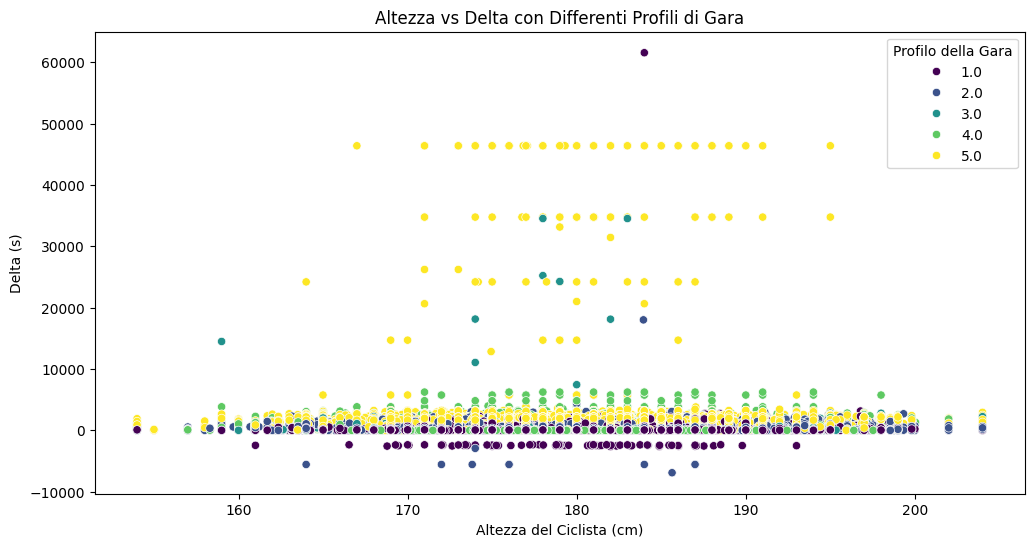

In [90]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='height', y='delta', hue='profile', palette='viridis')
plt.title('Altezza vs Delta con Differenti Profili di Gara')
plt.xlabel('Altezza del Ciclista (cm)')
plt.ylabel('Delta (s)')
plt.legend(title='Profilo della Gara')
plt.show()

La maggior parte dei ciclisti ha un delta compreso tra 0 e circa 10.000 secondi, indicando che la maggior parte dei ciclisti tende a mantenere un certo livello di prestazioni costante durante le gare.
Ci sono alcuni ciclisti che mostrano un delta significativamente più alto, che può indicare anomalie nelle prestazioni o condizioni particolarmente sfavorevoli durante la gara. I ciclisti di altezza compresa tra 160 cm e 200 cm sembrano avere prestazioni simili in termini di delta, il che suggerisce che non c'è una forte correlazione tra l'altezza e le variazioni di prestazione (delta) nei vari profili di gara.
Tuttavia, si può notare che alcuni profili (ad esempio, il profilo 2.0) sembrano avere una concentrazione di ciclisti in una gamma di delta più bassa. Il grafico mostra chiaramente le diverse categorie di profilo di gara, evidenziando come i ciclisti in ciascun profilo possano avere prestazioni diverse.
È interessante notare come i profili di gara con valori più elevati (5.0) abbiano ciclisti che, in generale, presentano delta più elevati, il che potrebbe suggerire gare più difficili o competitive.


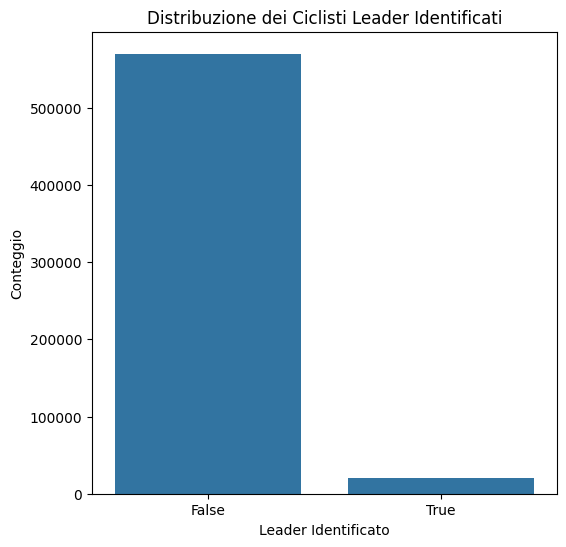

In [71]:
# Identificazione dei leader basata su posizioni medie e delta
df_merged['leader_candidate'] = (df_merged['position'] <= 5) & (df_merged['delta'] < df_merged['delta'].quantile(0.25))

# Visualizza il conteggio dei leader identificati
plt.figure(figsize=(6, 6))
sns.countplot(data=df_merged, x='leader_candidate')
plt.title('Distribuzione dei Ciclisti Leader Identificati')
plt.xlabel('Leader Identificato')
plt.ylabel('Conteggio')
plt.show()

La maggior parte dei ciclisti è contrassegnata come "False" nella categoria dei leader identificati, il che significa che solo una piccola frazione di ciclisti soddisfa i criteri per essere considerati leader (ovvero avere una posizione di arrivo nei primi 5 e un delta inferiore al 25° percentile).
Questo risultato suggerisce che i leader nel contesto delle gare rappresentano un gruppo ristretto rispetto al totale dei ciclisti analizzati. È probabile che i ciclisti che hanno prestazioni eccezionali (basse posizioni e delta inferiori alla media) siano rari. Potrebbe essere utile approfondire ulteriormente quali caratteristiche distintive possiedono questi ciclisti leader (ad esempio, età, peso, altezza) rispetto agli altri. Analisi aggiuntive potrebbero includere l'identificazione di fattori predittivi per diventare un leader in una gara.


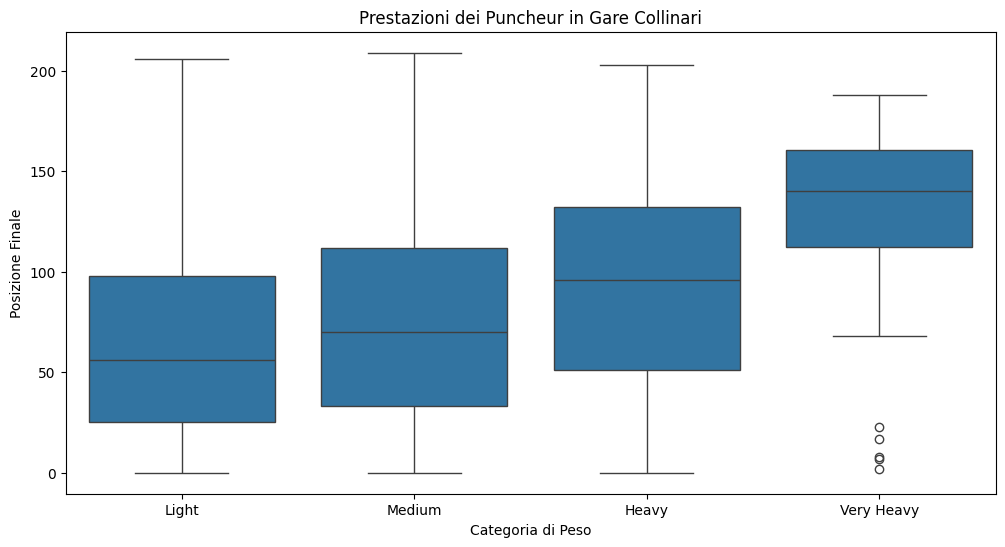

In [72]:
puncheur_races = df_merged[df_merged['profile'] == 3 | 2]
plt.figure(figsize=(12, 6))
sns.boxplot(data=puncheur_races, x='weight_category', y='position')
plt.title('Prestazioni dei Puncheur in Gare Collinari')
plt.xlabel('Categoria di Peso')
plt.ylabel('Posizione Finale')
plt.show()

La posizione finale dei ciclisti "puncheur" varia notevolmente tra le diverse categorie di peso. I ciclisti con categoria di peso "Very Heavy" tendono ad avere una posizione finale mediamente più alta rispetto alle altre categorie, indicando che potrebbero avere maggiori difficoltà nelle gare collinari.
Le categorie "Light" e "Medium" mostrano distribuzioni simili, con le posizioni finali concentrate intorno a valori più bassi, suggerendo che i ciclisti in queste categorie tendono a performare meglio. L'intervallo interquartile (IQR) è più ampio per i puncheur nella categoria "Heavy", il che significa che c'è una maggiore variabilità nelle loro prestazioni rispetto alle altre categorie.
La mediana per la categoria "Very Heavy" è spostata verso il centro superiore della scala, suggerendo che, mentre ci sono puncheur più pesanti che riescono a ottenere buoni risultati, la maggior parte di loro tende a posizionarsi più in alto. Si possono osservare diversi outliers (punti isolati) nella categoria "Very Heavy", indicando che ci sono ciclisti con prestazioni eccezionalmente elevate rispetto alla loro categoria di peso. Questo potrebbe essere un indicativo di talenti eccezionali o ciclisti che eccellono nonostante il loro peso.

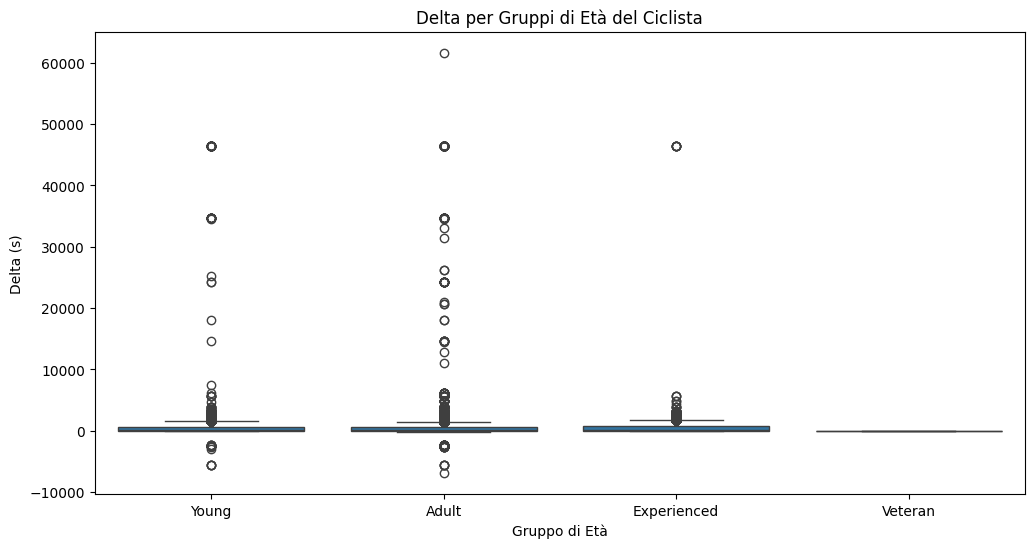

In [73]:
df_merged['age_group'] = pd.cut(df_merged['cyclist_age'], bins=[15, 25, 35, 45, 60], labels=['Young', 'Adult', 'Experienced', 'Veteran'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, x='age_group', y='delta')
plt.title('Delta per Gruppi di Età del Ciclista')
plt.xlabel('Gruppo di Età')
plt.ylabel('Delta (s)')
plt.show()


Ogni gruppo di età (Young, Adult, Experienced, Veteran) presenta una certa variabilità nel delta, ma sembra che i gruppi "Young" e "Adult" abbiano un delta mediano più alto rispetto agli altri gruppi, indicando che i ciclisti più giovani e quelli adulti tendono a avere prestazioni variabili, inclusi alcuni punteggi eccezionalmente buoni.
I gruppi "Experienced" e "Veteran" mostrano mediane più basse, suggerendo che i ciclisti in questi gruppi hanno prestazioni più consistenti e inferiori nel delta. Sono visibili diversi outliers in tutti i gruppi, con particolare attenzione ai gruppi "Young" e "Adult". Questi outliers rappresentano ciclisti che hanno ottenuto risultati molto migliori o peggiori rispetto alla maggior parte dei loro coetanei.
L'assenza di outliers nei gruppi "Experienced" e "Veteran" può indicare prestazioni più stabili o la presenza di ciclisti che competono in modo più consistente. Questo grafico suggerisce che i ciclisti più giovani e adulti possono essere più variabili nelle loro prestazioni rispetto ai ciclisti più esperti e veterani. I ciclisti più giovani potrebbero essere più motivati o avere più potenziale da esprimere, mentre quelli più esperti potrebbero avere un approccio più strategico alle gare, portando a prestazioni più stabili.
Potrebbe essere utile esaminare ulteriormente le caratteristiche di questi ciclisti (come peso, altezza, tipo di gara) per comprendere meglio le ragioni di queste variazioni.

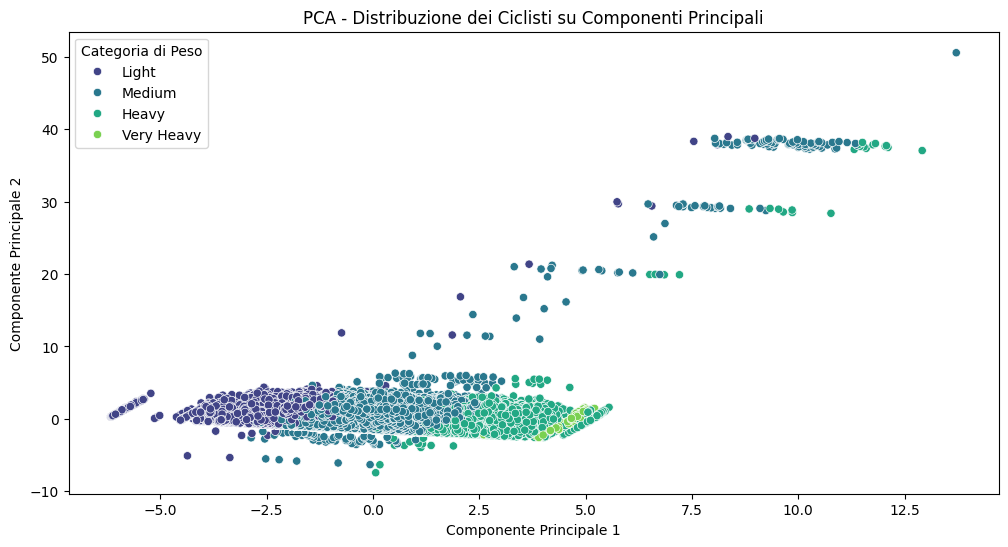

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Seleziona le caratteristiche rilevanti (esempio: peso, altezza, delta, posizione)
features = df_merged[['weight', 'height', 'delta', 'position']]
scaled_features = StandardScaler().fit_transform(features)
df_merged['weight_category'] = pd.cut(df_merged['weight'], bins=[0, 60, 75, 90, 120], labels=['Light', 'Medium', 'Heavy', 'Very Heavy'])

# Applica PCA
pca = PCA(n_components=2)  # Riduci a 2 componenti principali
principal_components = pca.fit_transform(scaled_features)
df_merged['PC1'] = principal_components[:, 0]
df_merged['PC2'] = principal_components[:, 1]

# Visualizza i risultati della PCA
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='PC1', y='PC2', hue='weight_category', palette='viridis')
plt.title('PCA - Distribuzione dei Ciclisti su Componenti Principali')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.legend(title='Categoria di Peso')
plt.show()



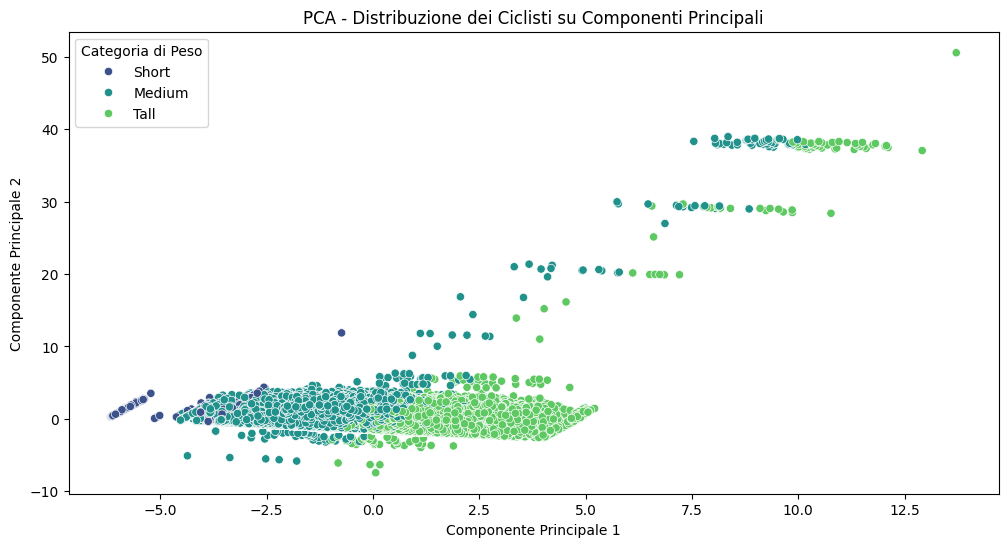

In [75]:
df_merged['height_category'] = pd.cut(df_merged['height'], bins=[140, 160, 180, 200], labels=['Short', 'Medium', 'Tall'])

# Applica PCA
pca = PCA(n_components=2)  # Riduci a 2 componenti principali
principal_components = pca.fit_transform(scaled_features)
df_merged['PC1'] = principal_components[:, 0]
df_merged['PC2'] = principal_components[:, 1]

# Visualizza i risultati della PCA
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='PC1', y='PC2', hue='height_category', palette='viridis')
plt.title('PCA - Distribuzione dei Ciclisti su Componenti Principali')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.legend(title='Categoria di Peso')
plt.show()

Le componenti principali sono combinazioni lineari delle variabili originali (peso, altezza, delta, posizione). Queste componenti cercano di spiegare la varianza nei dati in modo da mantenere il maggior numero possibile di informazioni.
Il primo asse (Componente Principale 1) spiega una gran parte della varianza dei dati, mentre il secondo asse (Componente Principale 2) cattura la varianza rimanente.
La distribuzione dei punti nel grafico mostra come i ciclisti si raggruppano in base alla loro categoria di peso. Puoi notare che i ciclisti di categoria "Light" si trovano principalmente nella parte bassa della Componente Principale 2, mentre i ciclisti "Heavy" e "Very Heavy" sembrano essere distribuiti in modo più ampio.
Ci sono dei gruppi evidenti, suggerendo che le caratteristiche fisiche (peso, altezza) e le performance (delta) hanno un impatto significativo sulla posizione nel grafico. I ciclisti classificati come "Medium" tendono a trovarsi in una posizione intermedia, mentre quelli "Light" sono concentrati in un'area che potrebbe indicare prestazioni migliori in gare di resistenza, mentre quelli "Heavy" e "Very Heavy" potrebbero avere prestazioni più variabili a causa del peso.

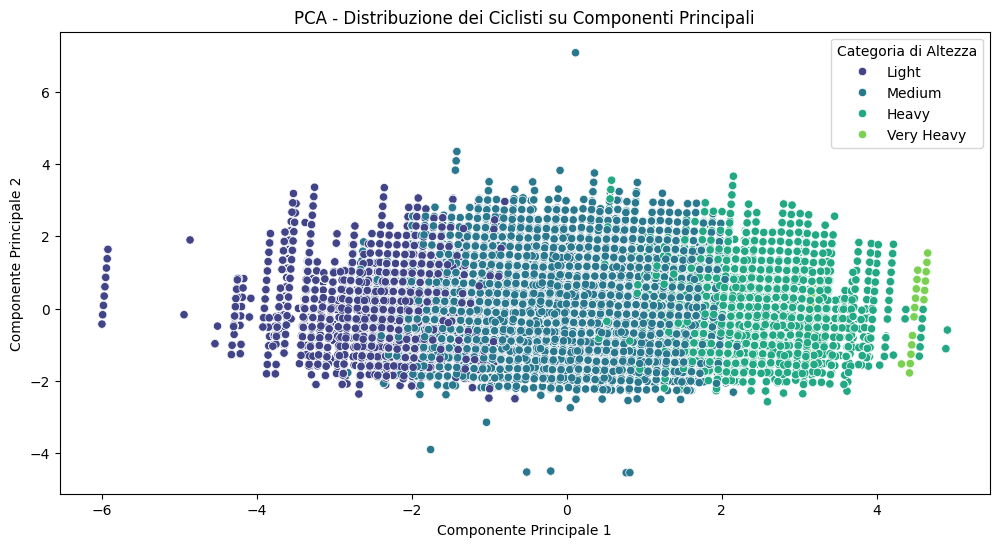

In [91]:
df_merged['weight_category'] = pd.cut(df_merged['weight'], bins=[0, 60, 75, 90, 120], labels=['Light', 'Medium', 'Heavy', 'Very Heavy'])
# Applica PCA
pca = PCA(n_components=2)  # Riduci a 2 componenti principali
principal_components = pca.fit_transform(scaled_features)
df_merged['PC1'] = principal_components[:, 0]
df_merged['PC2'] = principal_components[:, 1]

# Visualizza i risultati della PCA
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='PC1', y='PC2', hue='weight_category', palette='viridis')
plt.title('PCA - Distribuzione dei Ciclisti su Componenti Principali')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.legend(title='Categoria di Altezza')
plt.show()

Simile al grafico precedente, le componenti principali permettono di ridurre la dimensionalità dei dati mantenendo il massimo delle informazioni possibili. Il primo asse (Componente Principale 1) e il secondo asse (Componente Principale 2) catturano le varianze delle variabili originali. 
La disposizione dei punti mostra chiaramente i vari gruppi di peso. Puoi notare che i ciclisti "Light" tendono a trovarsi in una parte bassa della Componente Principale 2, mentre i ciclisti "Heavy" e "Very Heavy" si distribuiscono in modo più variegato lungo entrambe le componenti.
Questo suggerisce che il peso ha un impatto significativo sulle performance e potrebbe indicare tendenze nei risultati delle gare in base alla categoria di peso.  ciclisti classificati come "Medium" appaiono in un'area intermedia, mostrando prestazioni diverse rispetto a quelli "Light" e "Heavy". La separazione visibile tra i gruppi potrebbe riflettere differenze nelle caratteristiche fisiche che influenzano le loro performance.


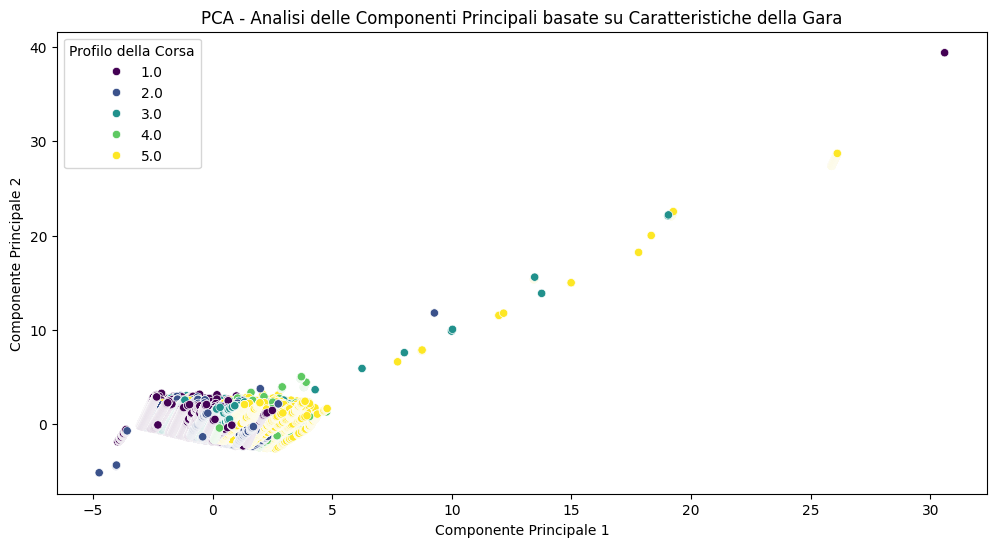

In [76]:
# Seleziona le caratteristiche di gara e di prestazione
features = df_merged[['length', 'climb_total', 'delta', 'position']].dropna()  # Rimuovi valori NaN
scaled_features = StandardScaler().fit_transform(features)

# Applica PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_merged['PC1'] = principal_components[:, 0]
df_merged['PC2'] = principal_components[:, 1]

# Visualizza i risultati della PCA
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='PC1', y='PC2', hue='profile', palette='viridis')
plt.title('PCA - Analisi delle Componenti Principali basate su Caratteristiche della Gara')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.legend(title='Profilo della Corsa')
plt.show()


La dispersione dei punti evidenzia chiaramente i diversi profili di corsa (1.0, 2.0, 3.0, 4.0, 5.0) in relazione alle due componenti principali.
Sembra esserci una certa separazione tra i profili più leggeri (come il profilo 1.0) e quelli più pesanti (come il profilo 5.0), suggerendo che le caratteristiche della gara influiscono sulle prestazioni e le posizioni dei ciclisti. Le componenti principali catturano le variazioni nei dati originali. La Componente Principale 1 potrebbe rappresentare una combinazione di caratteristiche che spiegano la maggior parte della varianza, mentre la Componente Principale 2 cattura ulteriori differenze.
La pendenza nella relazione tra le due componenti suggerisce che le caratteristiche delle gare possono influenzare le prestazioni dei ciclisti in modi che sono distribuiti lungo questo asse. L'analisi dei profili di corsa può anche rivelare tendenze interessanti su come le caratteristiche fisiche dei ciclisti influenzano la loro performance in diverse tipologie di gara.

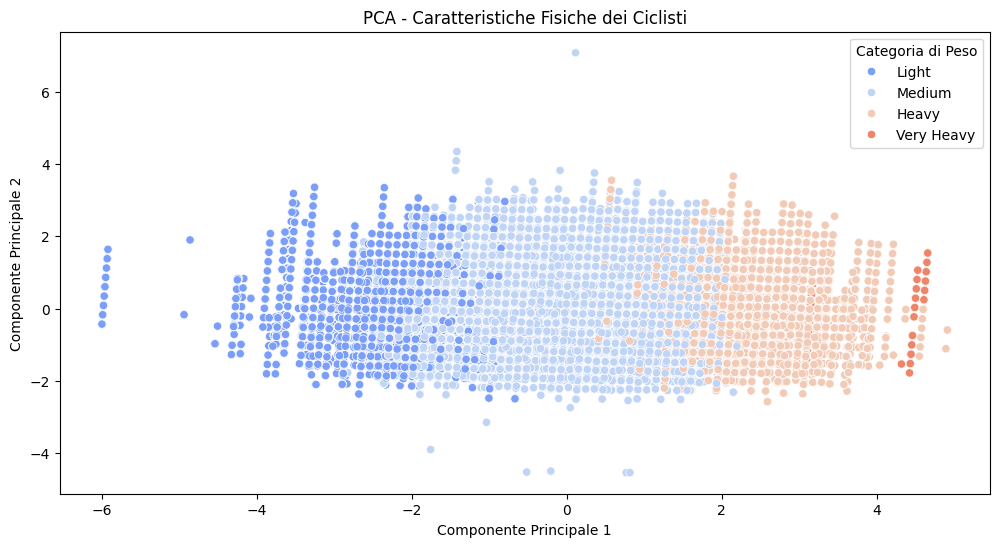

In [77]:
# PCA su caratteristiche fisiche
features = df_merged[['weight', 'height', 'cyclist_age']].dropna()  # Assumi che l'età sia già calcolata
scaled_features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_merged['PC1'] = principal_components[:, 0]
df_merged['PC2'] = principal_components[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='PC1', y='PC2', hue='weight_category', palette='coolwarm')
plt.title('PCA - Caratteristiche Fisiche dei Ciclisti')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.legend(title='Categoria di Peso')
plt.show()

La rappresentazione mostra una chiara separazione tra le categorie di peso. I ciclisti leggeri (Light) tendono a posizionarsi su valori più bassi delle componenti principali, mentre i ciclisti molto pesanti (Very Heavy) si trovano verso la parte alta del grafico.
Questa separazione suggerisce che le caratteristiche fisiche (peso e altezza) influiscono notevolmente sulle prestazioni dei ciclisti.
La Componente Principale 1 sembra catturare la variazione principale nei dati, mentre la Componente Principale 2 potrebbe rappresentare ulteriori differenze nei dati che non sono catturate dalla prima componente.
L'asse X (Componente Principale 1) sembra essere più rilevante per distinguere i ciclisti leggeri da quelli pesanti.

### To do magari dopo feature engineering

In [78]:
"""
features = df_merged[['delta', 'position', 'climb_total', 'length']].dropna()
scaled_features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_merged['PC1'] = principal_components[:, 0]
df_merged['PC2'] = principal_components[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_merged, x='PC1', y='PC2', hue='performance_category', palette='plasma')  # Assumi che performance_category sia già definita
plt.title('PCA - Analisi delle Prestazioni Complessive')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.legend(title='Categoria di Prestazione')
plt.show()



# PCA su caratteristiche fisiche e prestazionali
features = df_combined[['weight', 'height', 'delta', 'position', 'climb_total']].dropna()
scaled_features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_combined['PC1'] = principal_components[:, 0]
df_combined['PC2'] = principal_components[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_combined, x='PC1', y='PC2', hue='profile', style='weight_category')
plt.title('PCA - Combinazione di Caratteristiche Fisiche e Prestazioni')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.legend(title='Profilo della Corsa e Categoria di Peso')
plt.show()


# Supponiamo di avere prestazioni su diverse gare
features = df_combined[['race_1_delta', 'race_2_delta', 'race_3_delta']].dropna()  # Esempio con più gare
scaled_features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
df_combined['PC1'] = principal_components[:, 0]
df_combined['PC2'] = principal_components[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_combined, x='PC1', y='PC2', hue='cyclist_team', palette='Set1')
plt.title('PCA - Identificazione di Ciclisti con Prestazioni Simili in Gare Diverse')
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.legend(title='Squadra del Ciclista')
plt.show()

"""

"\nfeatures = df_merged[['delta', 'position', 'climb_total', 'length']].dropna()\nscaled_features = StandardScaler().fit_transform(features)\n\npca = PCA(n_components=2)\nprincipal_components = pca.fit_transform(scaled_features)\ndf_merged['PC1'] = principal_components[:, 0]\ndf_merged['PC2'] = principal_components[:, 1]\n\nplt.figure(figsize=(12, 6))\nsns.scatterplot(data=df_merged, x='PC1', y='PC2', hue='performance_category', palette='plasma')  # Assumi che performance_category sia già definita\nplt.title('PCA - Analisi delle Prestazioni Complessive')\nplt.xlabel('Componente Principale 1')\nplt.ylabel('Componente Principale 2')\nplt.legend(title='Categoria di Prestazione')\nplt.show()\n\n\n\n# PCA su caratteristiche fisiche e prestazionali\nfeatures = df_combined[['weight', 'height', 'delta', 'position', 'climb_total']].dropna()\nscaled_features = StandardScaler().fit_transform(features)\n\npca = PCA(n_components=2)\nprincipal_components = pca.fit_transform(scaled_features)\ndf_comb

## Correlation Analysis - Cyclists

In [4]:
from typing import Tuple, Dict, Any

def __transform_single_features(dataset: pd.DataFrame, transformation: str) -> Tuple[
    pd.DataFrame, Dict[str, Any]]:
    match transformation:
        case "standard":
            transformed_dataset = dataset.copy().select_dtypes(exclude=["object", "category", "bool", "datetime64"])
            transformations = dict()

            for feature in transformed_dataset.columns:
                transformations[feature] = StandardScaler()
                transformed_feature = transformations[feature].fit_transform(transformed_dataset[[feature]]).squeeze()
                transformed_dataset = transformed_dataset.astype({feature: transformed_feature.dtype})
                transformed_dataset.loc[:, feature] = transformed_feature
        case _:
            raise ValueError(f"Unknown transformation: {transformation}")

    return transformed_dataset, transformations


def center_and_scale(dataset: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """Shifts data to the origin: removes mean and scales by standard deviation all numeric features. Returns a copy of the dataset."""
    return __transform_single_features(dataset, "standard")

def correlations(dataset: pd.DataFrame) -> pd.DataFrame:
    correlations_dictionary = {
        correlation_type: dataset.corr(numeric_only=True, method=correlation_type)
        for correlation_type in ("kendall", "pearson", "spearman")
    }
    for i, k in enumerate(correlations_dictionary.keys()):
        correlations_dictionary[k].loc[:, "correlation_type"] = k
    correlations_matrix = pd.concat(correlations_dictionary.values())

    return correlations_matrix

In [80]:
normalized_dataset, normalization_scalers_dataset = center_and_scale(df_cyclists)
correlations = correlations(normalized_dataset)
correlations

birth_year    weight    height    decade correlation_type
birth_year    1.000000 -0.026502  0.042534  0.917707          kendall
weight       -0.026502  1.000000  0.515259 -0.026414          kendall
height        0.042534  0.515259  1.000000  0.044615          kendall
decade        0.917707 -0.026414  0.044615  1.000000          kendall
birth_year    1.000000 -0.032943  0.064514  0.982944          pearson
weight       -0.032943  1.000000  0.720086 -0.029563          pearson
height        0.064514  0.720086  1.000000  0.064624          pearson
decade        0.982944 -0.029563  0.064624  1.000000          pearson
birth_year    1.000000 -0.039091  0.062679  0.983978         spearman
weight       -0.039091  1.000000  0.698693 -0.036431         spearman
height        0.062679  0.698693  1.000000  0.061492         spearman
decade        0.983978 -0.036431  0.061492  1.000000         spearman

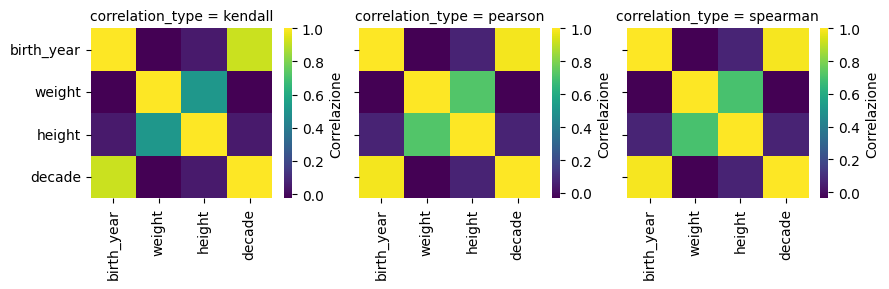

In [81]:
g = sns.FacetGrid(correlations, col="correlation_type")
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data[data.columns[:-1]], 
        cmap="viridis",  
        cbar_kws={'label': 'Correlazione'} 
    )
)

plt.show()

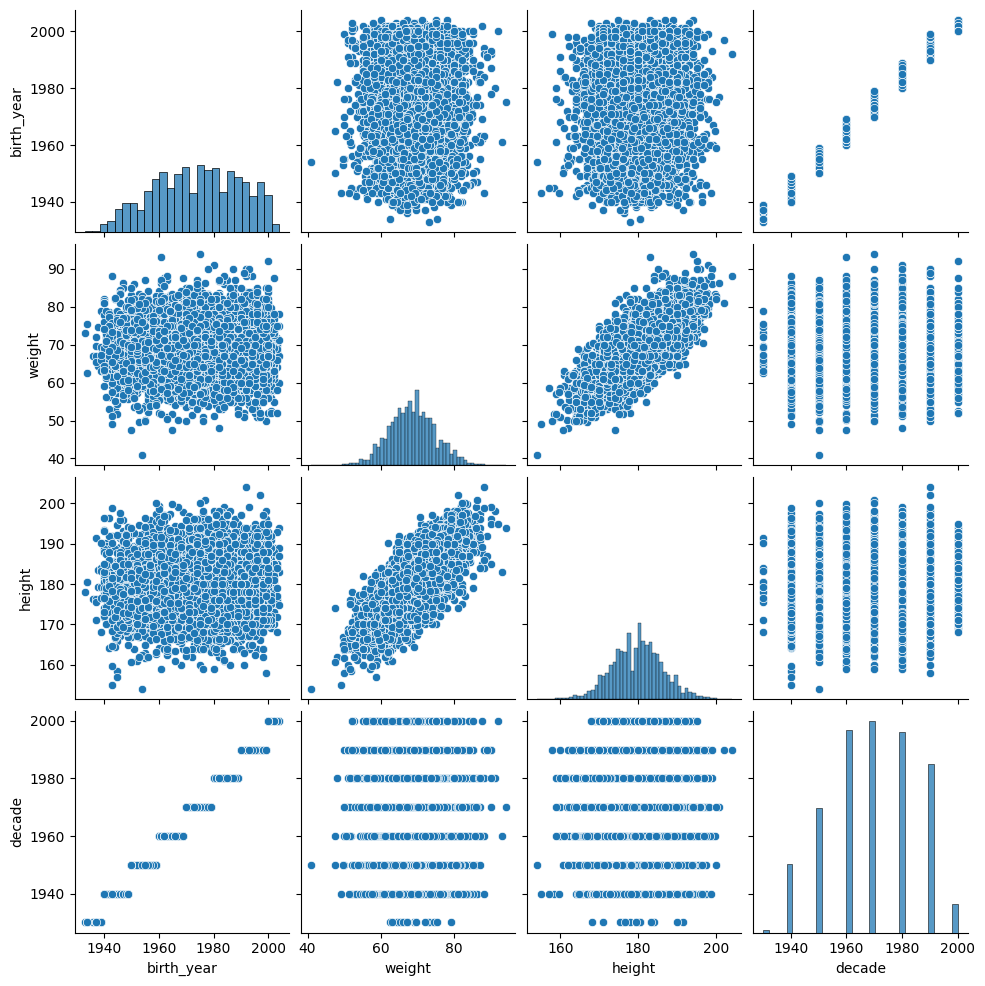

In [82]:
numerical_features = df_cyclists.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(df_cyclists[numerical_features])
plt.show()

## Correlation analysis - Races

In [6]:
df_races = pd.read_csv('dataset/df_races_no_missing.csv')
normalized_dataset, normalization_scalers_dataset = center_and_scale(df_races)
correlation_results = correlations(normalized_dataset) 
correlation_results


points  uci_points    length  climb_total   profile  \
points             1.000000    0.461719  0.282409     0.089549 -0.058310   
uci_points         0.461719    1.000000  0.170172     0.075943  0.016025   
length             0.282409    0.170172  1.000000     0.302671  0.026595   
climb_total        0.089549    0.075943  0.302671     1.000000  0.558803   
profile           -0.058310    0.016025  0.026595     0.558803  1.000000   
startlist_quality  0.387298    0.004395  0.064080     0.016817 -0.058675   
position           0.011489   -0.049392 -0.015390    -0.020512 -0.011840   
cyclist_age       -0.005614   -0.007670 -0.002400     0.005602  0.008431   
delta              0.068458    0.042506  0.029212     0.289280  0.343909   
points             1.000000    0.847795  0.356236     0.135810 -0.069554   
uci_points         0.847795    1.000000  0.357616     0.135479 -0.057936   
length             0.356236    0.357616  1.000000     0.536298  0.091890   
climb_total        0.135810    0.135479  0.536298     1.000000  0.681673   
profile           -0.069554   -0.057936  0.091890     0.681673  1.000000   
startlist_quality  0.163466   -0.069594  0.073954     0.048698 -0.053519   
position          -0.071360   -0.118172 -0.012057    -0.033267 -0.014756   
cyclist_age       -0.014451   -0.012055  0.003464     0.008559  0.013855   
delta              0.005735   -0.001905  0.092842     0.333774  0.324953   
points             1.000000    0.516442  0.365324     0.117711 -0.072015   
uci_points         0.516442    1.000000  0.237367     0.108381  0.023067   
length             0.365324    0.237367  1.000000     0.430720  0.044595   
climb_total        0.117711    0.108381  0.430720     1.000000  0.702442   
profile           -0.072015    0.023067  0.044595     0.702442  1.000000   
startlist_quality  0.498449   -0.008521  0.095436     0.024719 -0.080074   
position           0.015309   -0.070669 -0.023276    -0.030636 -0.016081   
cyclist_age       -0.007371   -0.010553 -0.003423     0.008107  0.011071   
delta              0.091368    0.060476  0.036088     0.421095  0.448396   

                   startlist_quality  position  cyclist_age     delta  \
points                      0.387298  0.011489    -0.005614  0.068458   
uci_points                  0.004395 -0.049392    -0.007670  0.042506   
length                      0.064080 -0.015390    -0.002400  0.029212   
climb_total                 0.016817 -0.020512     0.005602  0.289280   
profile                    -0.058675 -0.011840     0.008431  0.343909   
startlist_quality           1.000000  0.097558     0.033630  0.032324   
position                    0.097558  1.000000     0.006438  0.296539   
cyclist_age                 0.033630  0.006438     1.000000 -0.002708   
delta                       0.032324  0.296539    -0.002708  1.000000   
points                      0.163466 -0.071360    -0.014451  0.005735   
uci_points                 -0.069594 -0.118172    -0.012055 -0.001905   
length                      0.073954 -0.012057     0.003464  0.092842   
climb_total                 0.048698 -0.033267     0.008559  0.333774   
profile                    -0.053519 -0.014756     0.013855  0.324953   
startlist_quality           1.000000  0.147704     0.039560  0.045344   
position                    0.147704  1.000000     0.012205  0.272014   
cyclist_age                 0.039560  0.012205     1.000000  0.000965   
delta                       0.045344  0.272014     0.000965  1.000000   
points                      0.498449  0.015309    -0.007371  0.091368   
uci_points                 -0.008521 -0.070669    -0.010553  0.060476   
length                      0.095436 -0.023276    -0.003423  0.036088   
climb_total                 0.024719 -0.030636     0.008107  0.421095   
profile                    -0.080074 -0.016081     0.011071  0.448396   
startlist_quality           1.000000  0.144786     0.048987  0.047506   
position                    0.144786  1.000000     0.008972  0.4254

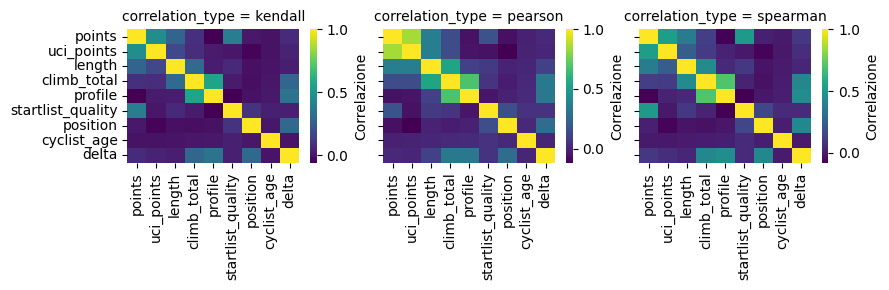

In [7]:
g = sns.FacetGrid(correlation_results, col="correlation_type")
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data[data.columns[:-1]], 
        cmap="viridis",  
        cbar_kws={'label': 'Correlazione'} 
    )
)

plt.show()

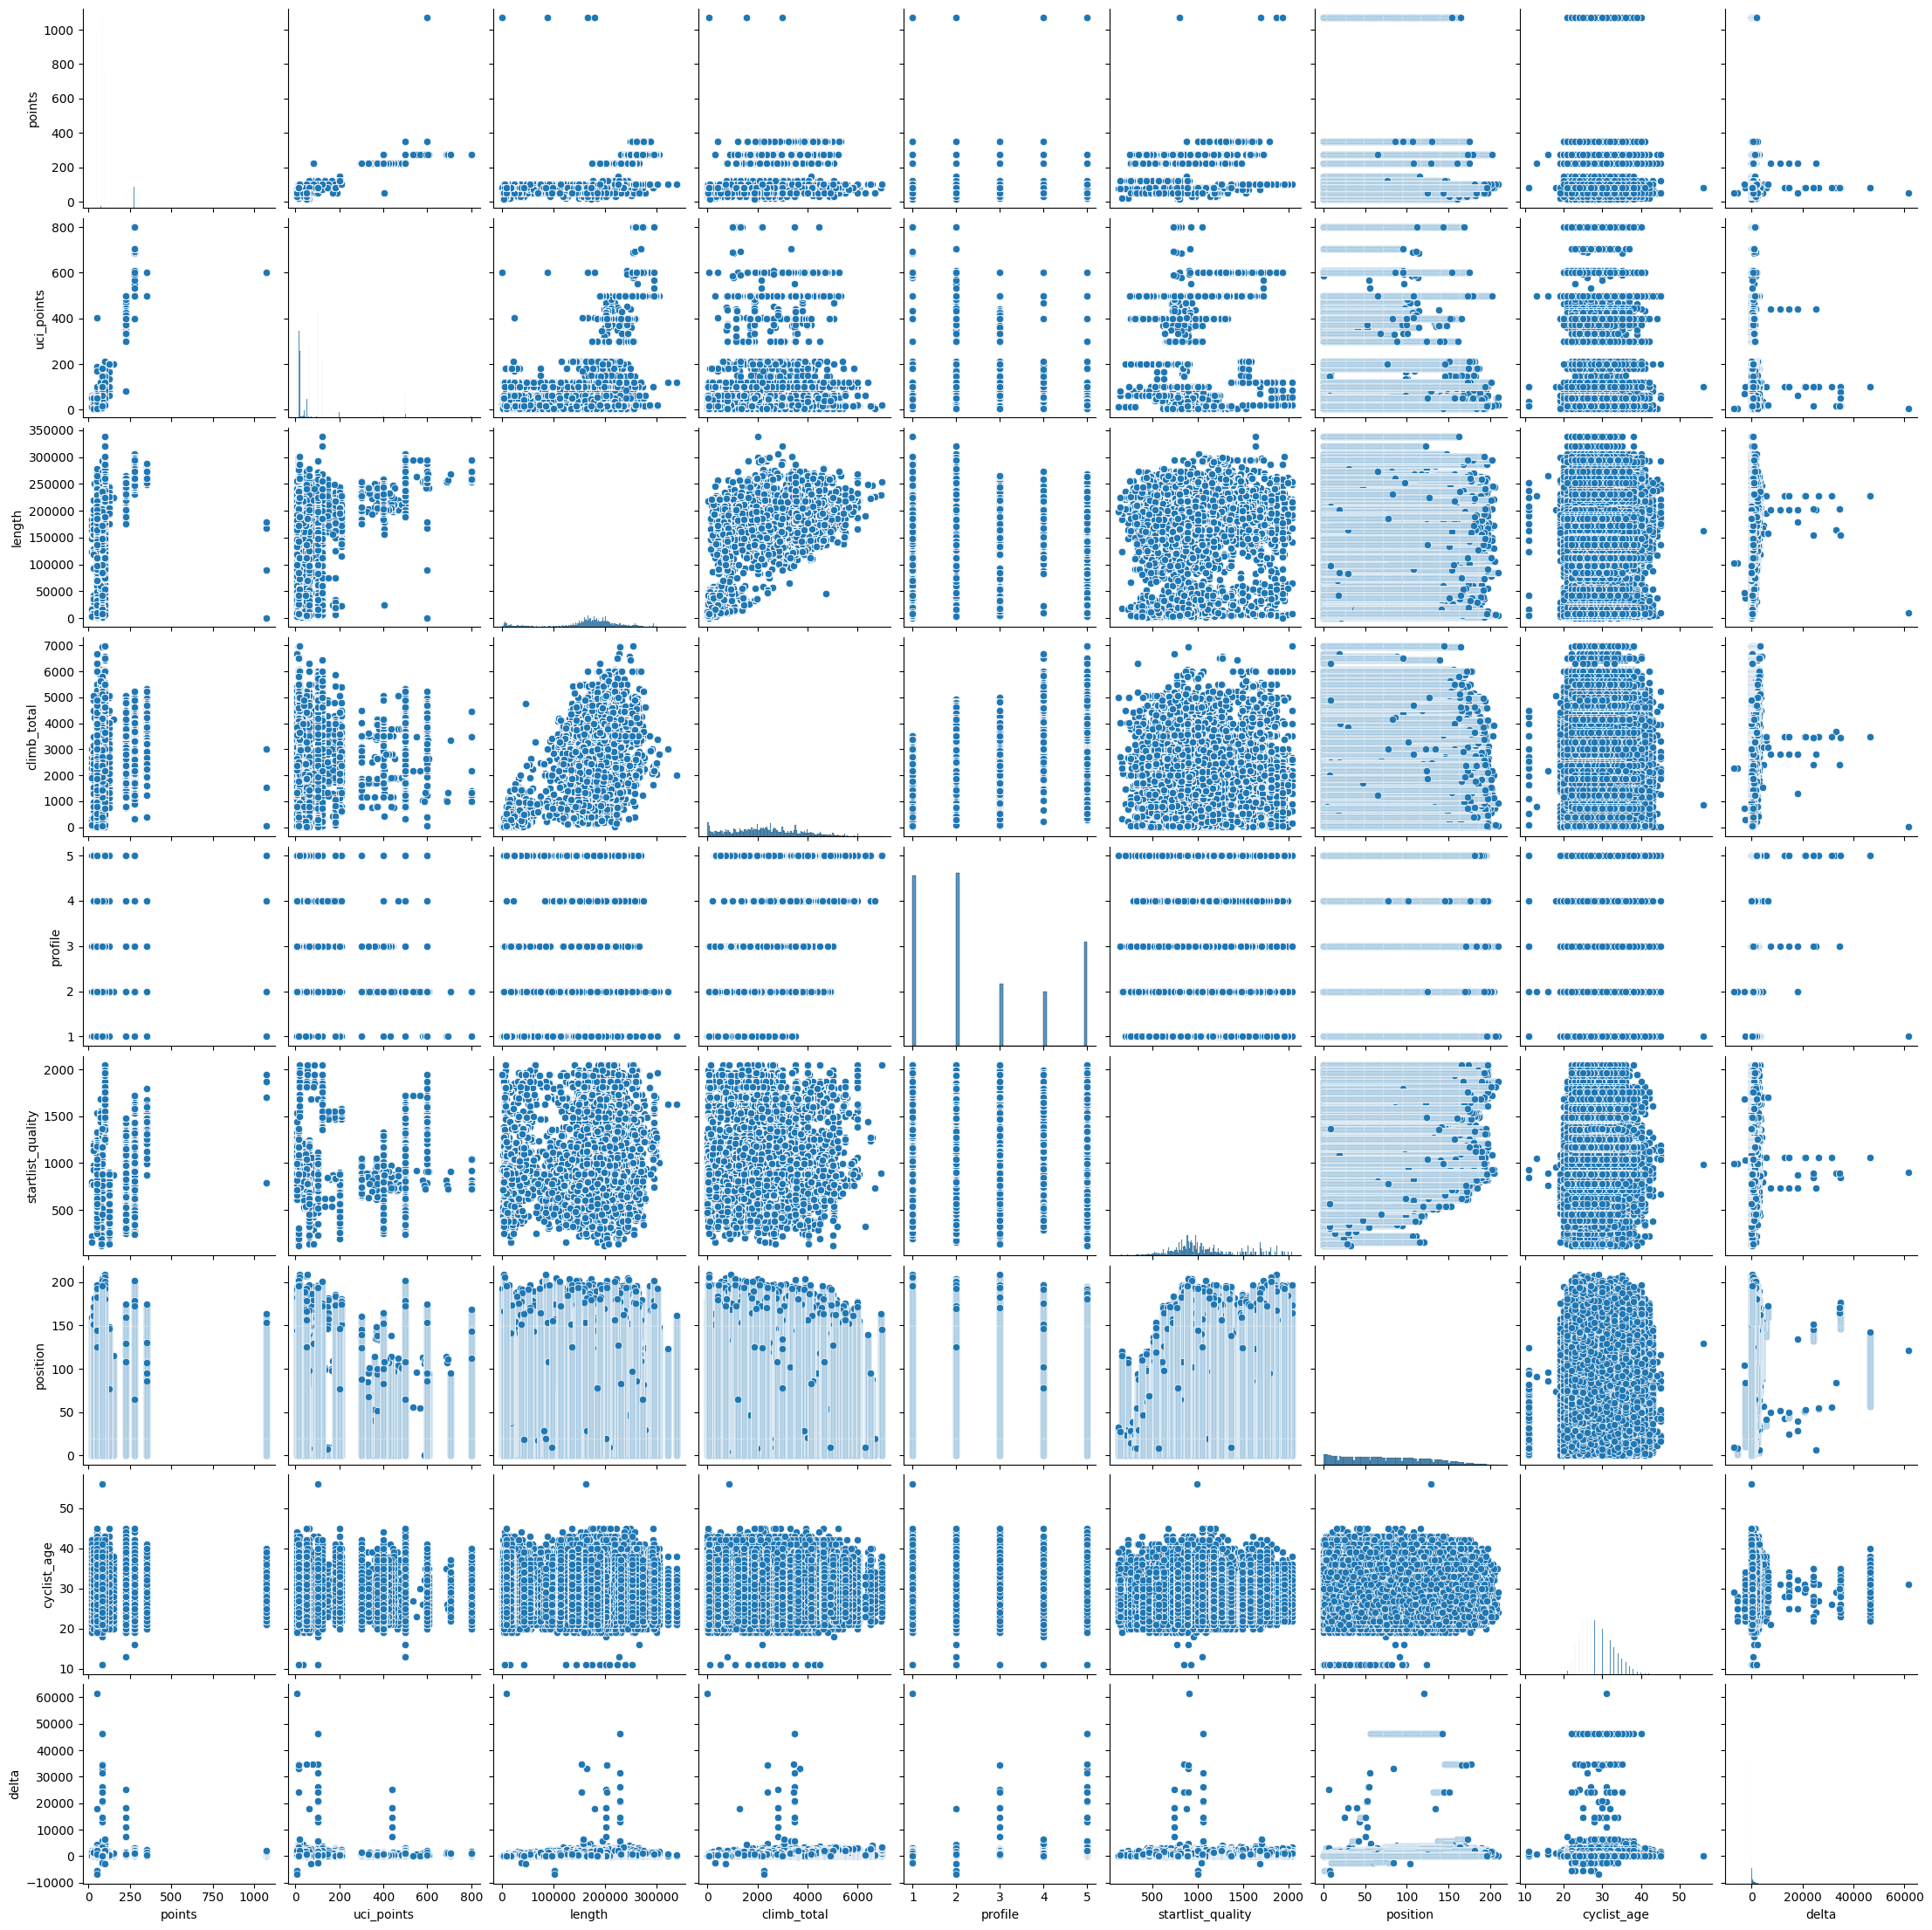

In [8]:
numerical_features = df_races.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(df_races[numerical_features])
plt.show()

## Combination of the two - Correlation Analysis

In [9]:
df_cyclists = pd.read_csv('dataset/df_cyclists_no_missing.csv')
df_races = pd.read_csv('dataset/df_races_no_missing.csv')
df_merged = pd.merge(df_races, df_cyclists, left_on='cyclist', right_on='_url', how='inner')
normalized_dataset, normalization_scalers_dataset = center_and_scale(df_merged)
correlations = correlations(normalized_dataset)
correlations

points  uci_points    length  climb_total   profile  \
points             1.000000    0.461719  0.282409     0.089549 -0.058310   
uci_points         0.461719    1.000000  0.170172     0.075943  0.016025   
length             0.282409    0.170172  1.000000     0.302671  0.026595   
climb_total        0.089549    0.075943  0.302671     1.000000  0.558803   
profile           -0.058310    0.016025  0.026595     0.558803  1.000000   
startlist_quality  0.387298    0.004395  0.064080     0.016817 -0.058675   
position           0.011489   -0.049392 -0.015390    -0.020512 -0.011840   
cyclist_age       -0.005614   -0.007670 -0.002400     0.005602  0.008431   
delta              0.068458    0.042506  0.029212     0.289280  0.343909   
birth_year        -0.189166    0.018312 -0.063061     0.039640  0.111386   
weight             0.044903    0.024741  0.025597    -0.010537 -0.023279   
height             0.010744    0.019298  0.008351     0.000600  0.001084   
points             1.000000    0.847795  0.356236     0.135810 -0.069554   
uci_points         0.847795    1.000000  0.357616     0.135479 -0.057936   
length             0.356236    0.357616  1.000000     0.536298  0.091890   
climb_total        0.135810    0.135479  0.536298     1.000000  0.681673   
profile           -0.069554   -0.057936  0.091890     0.681673  1.000000   
startlist_quality  0.163466   -0.069594  0.073954     0.048698 -0.053519   
position          -0.071360   -0.118172 -0.012057    -0.033267 -0.014756   
cyclist_age       -0.014451   -0.012055  0.003464     0.008559  0.013855   
delta              0.005735   -0.001905  0.092842     0.333774  0.324953   
birth_year        -0.142432   -0.025915 -0.047954     0.032751  0.124963   
weight             0.046784    0.039594  0.026614    -0.012982 -0.028444   
height             0.017830    0.023923  0.010876     0.000155  0.000104   
points             1.000000    0.516442  0.365324     0.117711 -0.072015   
uci_points         0.516442    1.000000  0.237367     0.108381  0.023067   
length             0.365324    0.237367  1.000000     0.430720  0.044595   
climb_total        0.117711    0.108381  0.430720     1.000000  0.702442   
profile           -0.072015    0.023067  0.044595     0.702442  1.000000   
startlist_quality  0.498449   -0.008521  0.095436     0.024719 -0.080074   
position           0.015309   -0.070669 -0.023276    -0.030636 -0.016081   
cyclist_age       -0.007371   -0.010553 -0.003423     0.008107  0.011071   
delta              0.091368    0.060476  0.036088     0.421095  0.448396   
birth_year        -0.245868    0.029352 -0.092648     0.058756  0.149252   
weight             0.059280    0.034970  0.037798    -0.015559 -0.030964   
height             0.014224    0.027214  0.012315     0.000891  0.001439   

                   startlist_quality  position  cyclist_age     delta  \
points                      0.387298  0.011489    -0.005614  0.068458   
uci_points                  0.004395 -0.049392    -0.007670  0.042506   
length                      0.064080 -0.015390    -0.002400  0.029212   
climb_total                 0.016817 -0.020512     0.005602  0.289280   
profile                    -0.058675 -0.011840     0.008431  0.343909   
startlist_quality           1.000000  0.097558     0.033630  0.032324   
position                    0.097558  1.000000     0.006438  0.296539   
cyclist_age                 0.033630  0.006438     1.000000 -0.002708   
delta                       0.032324  0.296539    -0.002708  1.000000   
birth_year                 -0.143491  0.086379    -0.143923  0.080034   
weight                      0.030286  0.065690     0.032225  0.056890   
height                      0.006515  0.056586    -0.006385  0.047366   
points                      0.163466 -0.071360    -0.014451  0.005735   
uci_points                 -0.069594 -0.118172    -0.012055 -0.001905   
length                      0.073954 -0.012057     0.003464  0.092842   
climb_total                 0.048698 -0.

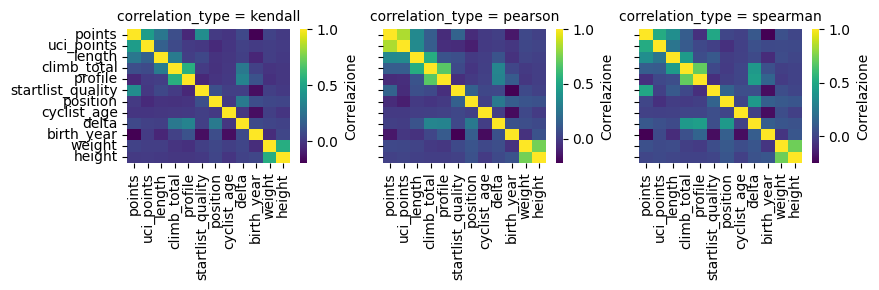

In [10]:
g = sns.FacetGrid(correlations, col="correlation_type")
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data[data.columns[:-1]], 
        cmap="viridis",  
        cbar_kws={'label': 'Correlazione'} 
    )
)

plt.show()

In [ ]:
df_cyclists = pd.read_csv('dataset/df_cyclists_no_missing.csv')
df_races = pd.read_csv('dataset/df_races_no_missing.csv')
df_merged = pd.merge(df_races, df_cyclists, left_on='cyclist', right_on='_url', how='inner')

numerical_features = df_merged.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(df_merged[numerical_features])
plt.show()